In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/My Drive/Colab Notebooks/Club Mahindra DataOlympics

/content/gdrive/My Drive/Colab Notebooks/Club Mahindra DataOlympics


In [3]:
#importing libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib 
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [6]:
test.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [7]:
print(train.shape)
print(test.shape)

(341424, 24)
(146765, 23)


In [8]:
from datetime import date

def days(chkin, chkout):

  ndays = []

  for i in range(len(chkin)):

    date_format = "%d/%m/%Y"
    d1, m1, y1 = int(chkin[i].split('/')[0]), int(chkin[i].split('/')[1]), int(chkin[i].split('/')[2])
    d2, m2, y2 = int(chkout[i].split('/')[0]), int(chkout[i].split('/')[1]), int(chkout[i].split('/')[2])

    date1 = date(y1, m1, d1)
    date2 = date(y2, m2, d2)

    difference = date2 - date1
    
    temp = [int(t) for t in str(difference).split() if t.isdigit()]
    if len(temp) == 0:
      ndays.append(0)
    else:
      ndays.append(temp[0])
  return ndays

In [9]:
train_advance = days(train['booking_date'], train['checkin_date'])
test_advance = days(test['booking_date'], test['checkin_date'])

In [10]:
train_ndays = days(train['checkin_date'], train['checkout_date'])
test_ndays = days(test['checkin_date'], test['checkout_date'])

In [11]:
train.insert(2, "no_of_days_stay", train_ndays)
test.insert(2, "no_of_days_stay", test_ndays)

In [12]:
train.insert(2, "no_of_days_advance", train_advance)
test.insert(2, "no_of_days_advance", test_advance)

In [13]:
train = train.drop(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date', 'memberid'], axis = 1)
test = test.drop(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date', 'memberid'], axis = 1)

In [14]:
train['member_age_buckets'].value_counts()

D    67618
E    66701
F    50967
C    45192
H    38548
G    36082
B    19430
I     8454
A     7054
J     1378
Name: member_age_buckets, dtype: int64

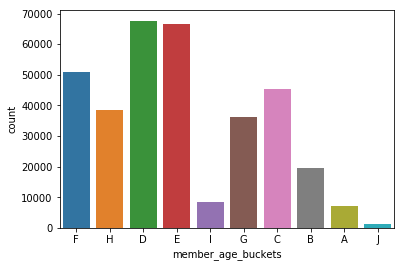

In [15]:
sns.countplot(x="member_age_buckets", data=train),
plt.show()

In [16]:
test['member_age_buckets'].value_counts()

E    28941
D    28334
F    22230
C    19584
H    16115
G    15919
B     8130
I     3601
A     3262
J      649
Name: member_age_buckets, dtype: int64

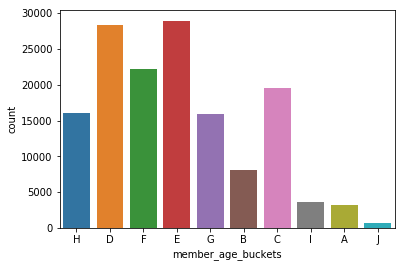

In [17]:
sns.countplot(x="member_age_buckets", data=test),
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['member_age_buckets'] = le.fit_transform(train['member_age_buckets']) 
test['member_age_buckets'] = le.fit_transform(test['member_age_buckets'])

In [19]:
train['member_age_buckets'].value_counts()

3    67618
4    66701
5    50967
2    45192
7    38548
6    36082
1    19430
8     8454
0     7054
9     1378
Name: member_age_buckets, dtype: int64

In [20]:
test['member_age_buckets'].value_counts()

4    28941
3    28334
5    22230
2    19584
7    16115
6    15919
1     8130
8     3601
0     3262
9      649
Name: member_age_buckets, dtype: int64

In [21]:
train['cluster_code'].value_counts()

F    120623
E     59830
D     55883
C     37809
B     37669
A     29610
Name: cluster_code, dtype: int64

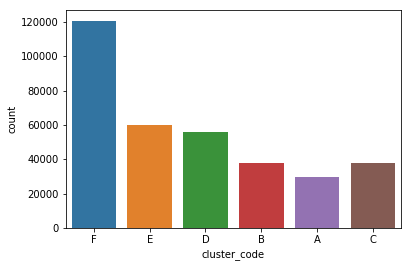

In [22]:
sns.countplot(x="cluster_code", data=train),
plt.show()

In [23]:
test['cluster_code'].value_counts()

F    52147
E    25531
D    24245
B    15957
C    15795
A    13090
Name: cluster_code, dtype: int64

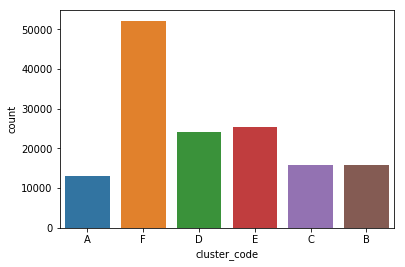

In [24]:
sns.countplot(x="cluster_code", data=test),
plt.show()

In [25]:
train['cluster_code'] = le.fit_transform(train['cluster_code']) 
test['cluster_code'] = le.fit_transform(test['cluster_code'])

In [26]:
train['cluster_code'].value_counts()

5    120623
4     59830
3     55883
2     37809
1     37669
0     29610
Name: cluster_code, dtype: int64

In [27]:
test['cluster_code'].value_counts()

5    52147
4    25531
3    24245
1    15957
2    15795
0    13090
Name: cluster_code, dtype: int64

In [28]:
train['reservationstatusid_code'].value_counts()

A    312481
B     14811
C     14131
D         1
Name: reservationstatusid_code, dtype: int64

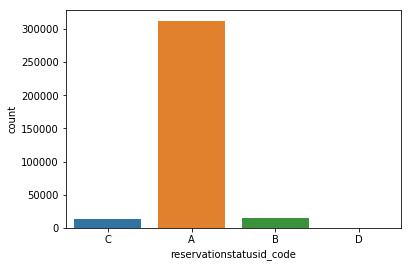

In [29]:
sns.countplot(x="reservationstatusid_code", data=train),
plt.show()

In [30]:
test['reservationstatusid_code'].value_counts()

A    134262
B      6429
C      6074
Name: reservationstatusid_code, dtype: int64

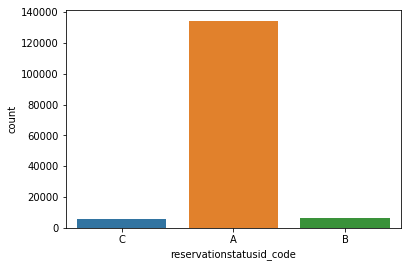

In [31]:
sns.countplot(x="reservationstatusid_code", data=test),
plt.show()

In [32]:
train['reservationstatusid_code'] = le.fit_transform(train['reservationstatusid_code'])
test['reservationstatusid_code'] = le.fit_transform(test['reservationstatusid_code'])

In [33]:
train['reservationstatusid_code'].value_counts()

0    312481
1     14811
2     14131
3         1
Name: reservationstatusid_code, dtype: int64

In [34]:
test['reservationstatusid_code'].value_counts()

0    134262
1      6429
2      6074
Name: reservationstatusid_code, dtype: int64

In [35]:
train['resort_id'].value_counts()

d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35    35331
b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9    28864
9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767    22344
49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8    22005
6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef07cb45ec436263c7d6    19001
6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b    18780
e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b    18271
da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c    15465
624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4    12175
e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683    12074
4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a    12065
ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a    11478
c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4    10621
535fa30d7e25dd8a49f1536779734ec8286108

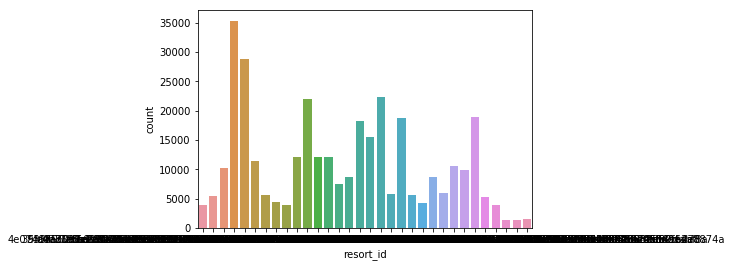

In [36]:
sns.countplot(x="resort_id", data=train),
plt.show()

In [37]:
test['resort_id'].value_counts()

d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35    15397
b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9    12610
49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8     9563
9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767     9274
6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef07cb45ec436263c7d6     8223
6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b     7976
e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b     7909
da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c     6521
624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4     5215
e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683     5189
4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a     5097
ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a     4865
c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4     4535
535fa30d7e25dd8a49f1536779734ec8286108

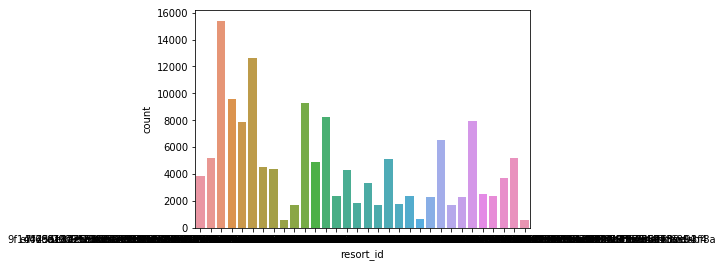

In [38]:
sns.countplot(x="resort_id", data=test),
plt.show()

In [39]:
train['resort_id']=le.fit_transform(train['resort_id'])
test['resort_id']=le.fit_transform(test['resort_id'])

In [40]:
train['resort_id'].value_counts()

25    35331
22    28864
18    22344
5     22005
10    19001
13    18780
27    18271
26    15465
11    12175
28    12074
8     12065
31    11478
24    10621
9     10168
14     9794
20     8683
23     8633
2      7490
16     5917
4      5711
0      5684
12     5527
1      5398
29     5309
21     4462
30     4210
15     3918
7      3879
17     3870
19     1551
6      1421
3      1325
Name: resort_id, dtype: int64

In [41]:
test['resort_id'].value_counts()

25    15397
22    12610
5      9563
18     9274
10     8223
13     7976
27     7909
26     6521
11     5215
28     5189
8      5097
31     4865
24     4535
9      4407
14     4290
20     3863
23     3712
2      3304
16     2504
4      2397
0      2379
29     2371
12     2316
1      2299
30     1858
21     1802
7      1715
17     1696
15     1694
19      625
6       609
3       550
Name: resort_id, dtype: int64

In [42]:
train.head()

,no_of_days_advance,no_of_days_stay,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,0,1,3,1,2,0,46,3,3,3,...,2.0,7.0,3,3,5,1,5,2,7,7.706428
1,78,5,1,1,2,0,46,3,3,4,...,2.0,7.0,5,2,5,1,5,0,1,6.662563
2,4,4,1,1,2,0,47,1,5,4,...,2.0,7.0,1,2,5,1,4,0,9,7.871602
3,40,5,1,1,2,2,46,2,2,3,...,2.0,7.0,2,2,5,1,3,0,25,5.344943
4,103,5,1,1,2,0,46,2,2,4,...,2.0,7.0,2,2,5,1,3,0,25,7.059346


In [43]:
test.head()

,no_of_days_advance,no_of_days_stay,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id
0,0,1,3,2,2,0,45,3,3,4,1,2.0,2.0,3,3,7,1,0,2,20
1,30,4,1,2,4,0,45,1,1,4,8,2.0,2.0,4,2,7,1,5,0,28
2,17,3,3,2,3,0,45,2,2,2,3,4.0,2.0,2,3,7,1,3,0,25
3,83,3,1,2,3,0,45,1,1,2,3,2.0,2.0,6,3,7,1,5,0,5
4,92,4,1,2,4,0,45,1,2,3,8,2.0,2.0,11,2,7,1,5,0,27


In [44]:
train.isnull().sum()             #finding the missing values in train

no_of_days_advance                       0
no_of_days_stay                          0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spent_per_room_night_scaled       0
dtype: int64

In [45]:
test.isnull().sum()             #finding the missing values in test

no_of_days_advance             0
no_of_days_stay                0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code         35
state_code_residence        2260
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
dtype: int64

In [46]:
train['season_holidayed_code'].fillna((train['season_holidayed_code'].mean()), inplace=True)
test['season_holidayed_code'].fillna((test['season_holidayed_code'].mean()), inplace=True)

In [47]:
train['state_code_residence'].fillna((train['state_code_residence'].mean()), inplace=True)
test['state_code_residence'].fillna((test['state_code_residence'].mean()), inplace=True)

In [48]:
train.isnull().sum()

no_of_days_advance                    0
no_of_days_stay                       0
channel_code                          0
main_product_code                     0
numberofadults                        0
numberofchildren                      0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
roomnights                            0
season_holidayed_code                 0
state_code_residence                  0
state_code_resort                     0
total_pax                             0
member_age_buckets                    0
booking_type_code                     0
cluster_code                          0
reservationstatusid_code              0
resort_id                             0
amount_spent_per_room_night_scaled    0
dtype: int64

In [49]:
test.isnull().sum()

no_of_days_advance          0
no_of_days_stay             0
channel_code                0
main_product_code           0
numberofadults              0
numberofchildren            0
persontravellingid          0
resort_region_code          0
resort_type_code            0
room_type_booked_code       0
roomnights                  0
season_holidayed_code       0
state_code_residence        0
state_code_resort           0
total_pax                   0
member_age_buckets          0
booking_type_code           0
cluster_code                0
reservationstatusid_code    0
resort_id                   0
dtype: int64

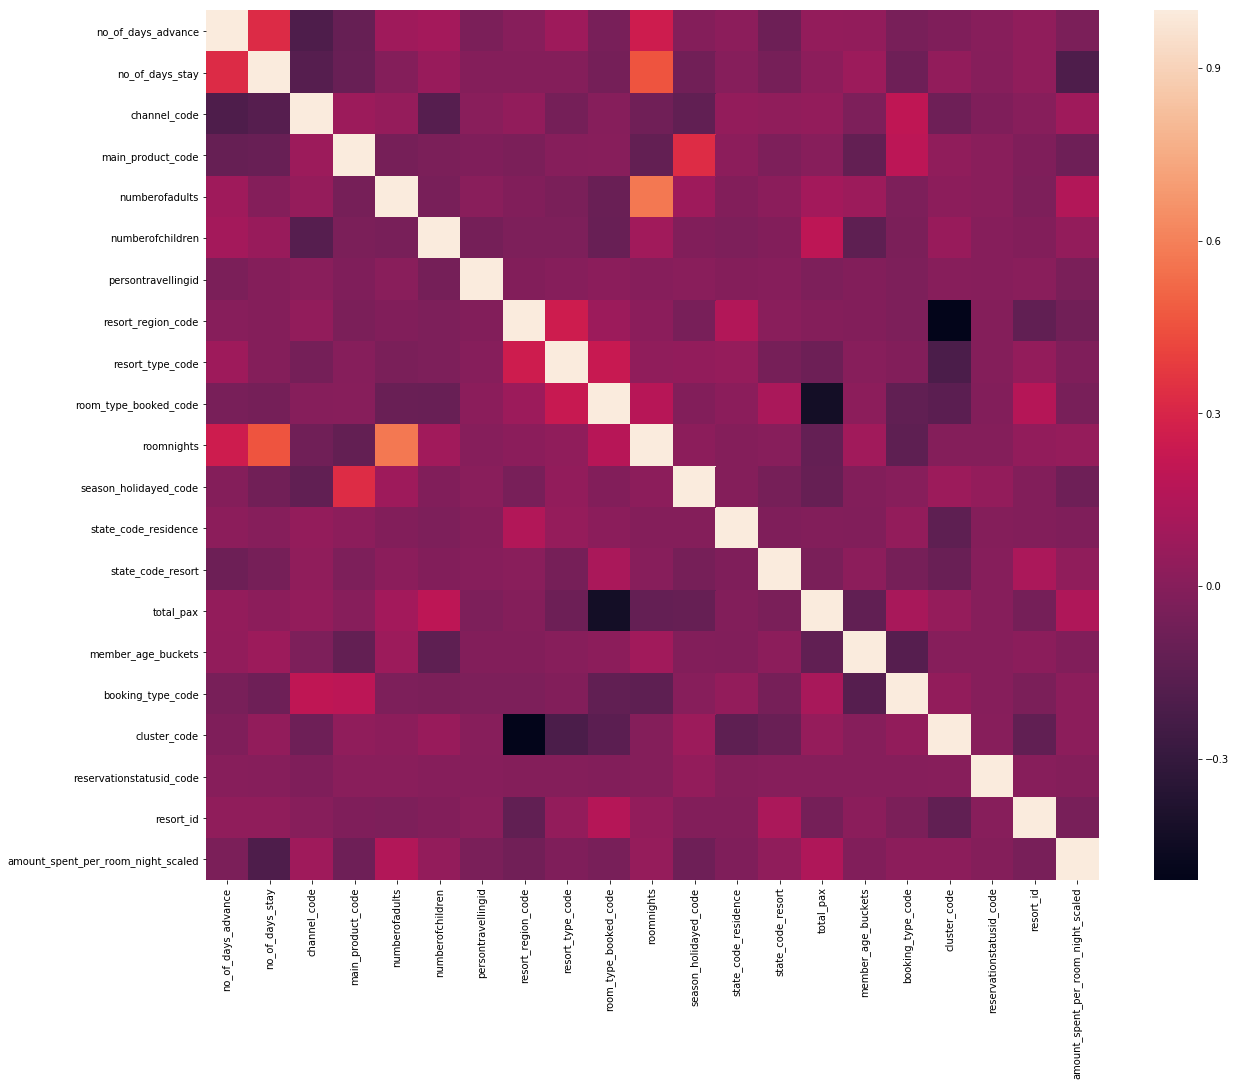

In [50]:
plt.figure(figsize=(20,16))
sns.heatmap(train.corr())

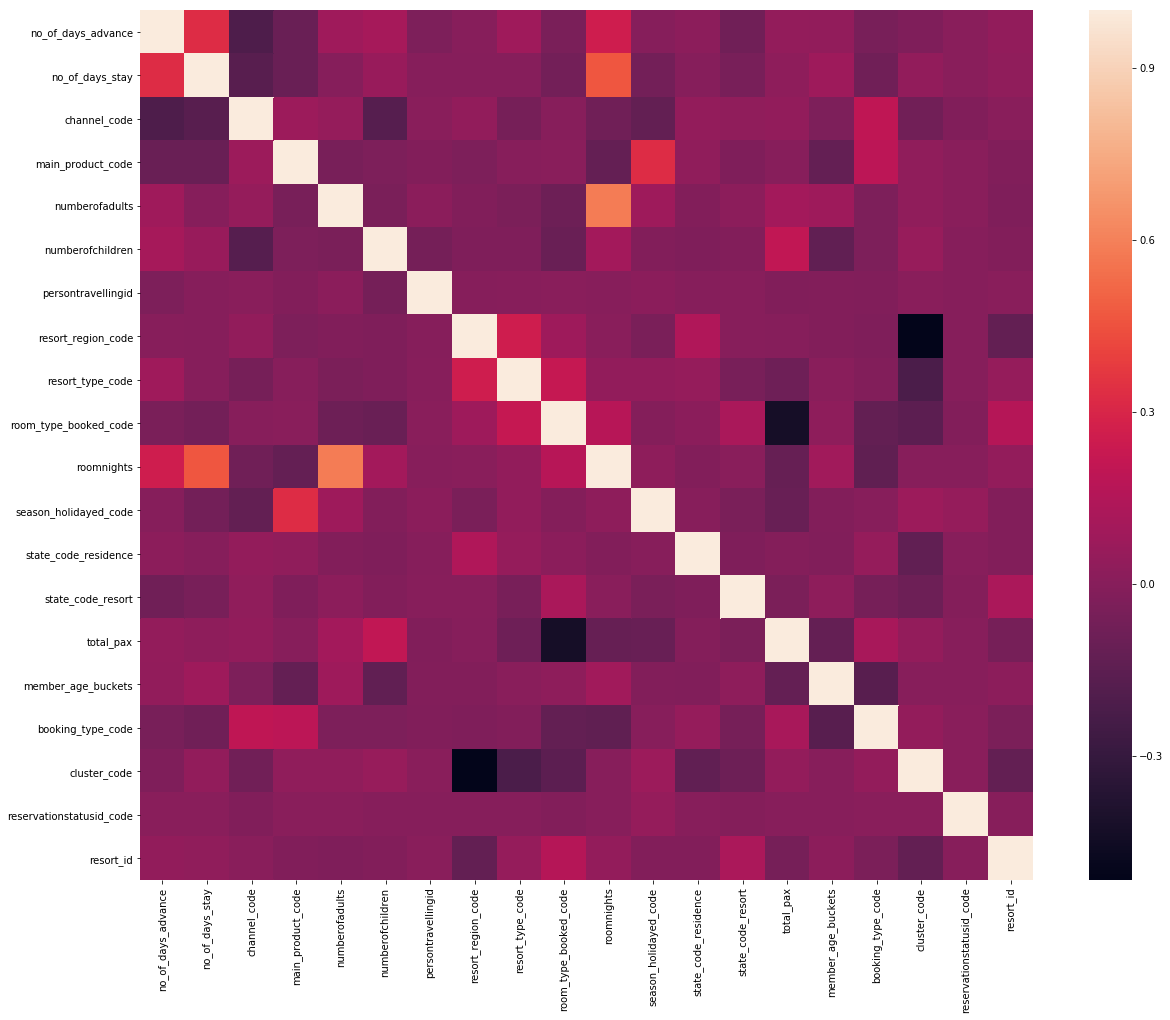

In [51]:
plt.figure(figsize=(20,16))
sns.heatmap(test.corr())

In [52]:
train.describe()

,no_of_days_advance,no_of_days_stay,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,...,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,46.161755,2.466646,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,...,2.673862,7.260708,4.763303,3.193390,4.102433,1.124209,3.290252,0.126166,17.315734,7.720801
std,36.792696,1.093479,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,...,0.885502,4.668368,3.103909,1.167824,1.909182,0.329821,1.684267,0.439366,8.630901,1.090109
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.600397
25%,15.000000,2.000000,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,...,2.000000,4.000000,2.000000,2.000000,3.000000,1.000000,2.000000,0.000000,10.000000,7.187260
50%,33.000000,2.000000,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,...,3.000000,8.000000,5.000000,3.000000,4.000000,1.000000,4.000000,0.000000,18.000000,7.860814
75%,82.000000,3.000000,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,...,3.000000,8.000000,7.000000,4.000000,5.000000,1.000000,5.000000,0.000000,25.000000,8.419144
max,126.000000,26.000000,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,...,4.000000,38.000000,13.000000,24.000000,9.000000,2.000000,5.000000,3.000000,31.000000,10.816652


In [53]:
Y = train.iloc[:, -1]
Y.shape

(341424,)

In [54]:
X = train.drop(['amount_spent_per_room_night_scaled'], axis = 1)
X.shape

(341424, 20)

In [55]:
!pip install catboost

In [59]:
X_test = test

In [60]:
X_test.shape

(146765, 20)

In [61]:
from sklearn.model_selection import train_test_split

# Splitting training data into train and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [62]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_valid = scalar.transform(X_valid)
X_test = scalar.transform(X_test)

In [63]:
#importing library and building model
from catboost import CatBoostRegressor

model=CatBoostRegressor(iterations=15000, depth=5, learning_rate=0.01, loss_function='RMSE')

In [64]:
model.fit(X_train, Y_train,eval_set=(X_valid, Y_valid),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 7.7216861	test: 7.7179565	best: 7.7179565 (0)	total: 118ms	remaining: 29m 24s
1:	learn: 7.6460095	test: 7.6422864	best: 7.6422864 (1)	total: 181ms	remaining: 22m 38s
2:	learn: 7.5711175	test: 7.5674026	best: 7.5674026 (2)	total: 273ms	remaining: 22m 46s
3:	learn: 7.4969004	test: 7.4931833	best: 7.4931833 (3)	total: 351ms	remaining: 21m 57s
4:	learn: 7.4235179	test: 7.4198116	best: 7.4198116 (4)	total: 428ms	remaining: 21m 23s
5:	learn: 7.3508882	test: 7.3471894	best: 7.3471894 (5)	total: 502ms	remaining: 20m 53s
6:	learn: 7.2789901	test: 7.2753031	best: 7.2753031 (6)	total: 588ms	remaining: 21m
7:	learn: 7.2078468	test: 7.2041650	best: 7.2041650 (7)	total: 686ms	remaining: 21m 24s
8:	learn: 7.1374217	test: 7.1337440	best: 7.1337440 (8)	total: 762ms	remaining: 21m 9s
9:	learn: 7.0677138	test: 7.0640480	best: 7.0640480 (9)	total: 841ms	remaining: 21m
10:	learn: 6.9987252	test: 6.9950685	best: 6.9950685 (10)	total: 951ms	remaining: 21m 35s
11:	learn: 6.9304469	test: 6.9267998	be

92:	learn: 3.2175529	test: 3.2146344	best: 3.2146344 (92)	total: 7.24s	remaining: 19m 20s
93:	learn: 3.1887396	test: 3.1858317	best: 3.1858317 (93)	total: 7.33s	remaining: 19m 21s
94:	learn: 3.1603708	test: 3.1574712	best: 3.1574712 (94)	total: 7.43s	remaining: 19m 26s
95:	learn: 3.1322656	test: 3.1293727	best: 3.1293727 (95)	total: 7.54s	remaining: 19m 30s
96:	learn: 3.1044635	test: 3.1015744	best: 3.1015744 (96)	total: 7.6s	remaining: 19m 27s
97:	learn: 3.0771174	test: 3.0742423	best: 3.0742423 (97)	total: 7.66s	remaining: 19m 25s
98:	learn: 3.0498802	test: 3.0470140	best: 3.0470140 (98)	total: 7.72s	remaining: 19m 22s
99:	learn: 3.0230274	test: 3.0201679	best: 3.0201679 (99)	total: 7.8s	remaining: 19m 22s
100:	learn: 2.9965568	test: 2.9937081	best: 2.9937081 (100)	total: 7.86s	remaining: 19m 19s
101:	learn: 2.9704228	test: 2.9675837	best: 2.9675837 (101)	total: 7.92s	remaining: 19m 17s
102:	learn: 2.9444136	test: 2.9415800	best: 2.9415800 (102)	total: 7.98s	remaining: 19m 13s
103:	l

182:	learn: 1.6114834	test: 1.6101732	best: 1.6101732 (182)	total: 15.5s	remaining: 20m 56s
183:	learn: 1.6020461	test: 1.6007665	best: 1.6007665 (183)	total: 15.6s	remaining: 20m 56s
184:	learn: 1.5926322	test: 1.5913896	best: 1.5913896 (184)	total: 15.7s	remaining: 20m 55s
185:	learn: 1.5834118	test: 1.5821950	best: 1.5821950 (185)	total: 15.7s	remaining: 20m 54s
186:	learn: 1.5742745	test: 1.5730816	best: 1.5730816 (186)	total: 15.9s	remaining: 20m 56s
187:	learn: 1.5653685	test: 1.5642029	best: 1.5642029 (187)	total: 15.9s	remaining: 20m 56s
188:	learn: 1.5564840	test: 1.5553516	best: 1.5553516 (188)	total: 16.1s	remaining: 20m 58s
189:	learn: 1.5477021	test: 1.5466030	best: 1.5466030 (189)	total: 16.2s	remaining: 21m
190:	learn: 1.5390073	test: 1.5379546	best: 1.5379546 (190)	total: 16.2s	remaining: 20m 59s
191:	learn: 1.5304138	test: 1.5293958	best: 1.5293958 (191)	total: 16.3s	remaining: 20m 59s
192:	learn: 1.5220295	test: 1.5210346	best: 1.5210346 (192)	total: 16.4s	remaining: 

273:	learn: 1.1332288	test: 1.1348719	best: 1.1348719 (273)	total: 23.7s	remaining: 21m 13s
274:	learn: 1.1309412	test: 1.1326064	best: 1.1326064 (274)	total: 23.8s	remaining: 21m 12s
275:	learn: 1.1287062	test: 1.1303988	best: 1.1303988 (275)	total: 23.8s	remaining: 21m 11s
276:	learn: 1.1264963	test: 1.1282189	best: 1.1282189 (276)	total: 23.9s	remaining: 21m 9s
277:	learn: 1.1243692	test: 1.1261110	best: 1.1261110 (277)	total: 24s	remaining: 21m 10s
278:	learn: 1.1222274	test: 1.1239945	best: 1.1239945 (278)	total: 24.1s	remaining: 21m 10s
279:	learn: 1.1201775	test: 1.1219680	best: 1.1219680 (279)	total: 24.2s	remaining: 21m 10s
280:	learn: 1.1180924	test: 1.1199149	best: 1.1199149 (280)	total: 24.3s	remaining: 21m 11s
281:	learn: 1.1160110	test: 1.1178562	best: 1.1178562 (281)	total: 24.3s	remaining: 21m 10s
282:	learn: 1.1140309	test: 1.1158981	best: 1.1158981 (282)	total: 24.4s	remaining: 21m 9s
283:	learn: 1.1120747	test: 1.1139654	best: 1.1139654 (283)	total: 24.5s	remaining: 

364:	learn: 1.0276948	test: 1.0312700	best: 1.0312700 (364)	total: 31.7s	remaining: 21m 9s
365:	learn: 1.0272433	test: 1.0308277	best: 1.0308277 (365)	total: 31.8s	remaining: 21m 10s
366:	learn: 1.0267843	test: 1.0303770	best: 1.0303770 (366)	total: 31.9s	remaining: 21m 10s
367:	learn: 1.0263079	test: 1.0299183	best: 1.0299183 (367)	total: 31.9s	remaining: 21m 10s
368:	learn: 1.0258531	test: 1.0294779	best: 1.0294779 (368)	total: 32s	remaining: 21m 9s
369:	learn: 1.0254080	test: 1.0290450	best: 1.0290450 (369)	total: 32.1s	remaining: 21m 8s
370:	learn: 1.0249986	test: 1.0286490	best: 1.0286490 (370)	total: 32.1s	remaining: 21m 7s
371:	learn: 1.0245172	test: 1.0281839	best: 1.0281839 (371)	total: 32.2s	remaining: 21m 7s
372:	learn: 1.0240991	test: 1.0277757	best: 1.0277757 (372)	total: 32.3s	remaining: 21m 8s
373:	learn: 1.0236623	test: 1.0273557	best: 1.0273557 (373)	total: 32.4s	remaining: 21m 8s
374:	learn: 1.0232658	test: 1.0269690	best: 1.0269690 (374)	total: 32.5s	remaining: 21m 8

455:	learn: 1.0043231	test: 1.0087395	best: 1.0087395 (455)	total: 40.3s	remaining: 21m 25s
456:	learn: 1.0042118	test: 1.0086348	best: 1.0086348 (456)	total: 40.4s	remaining: 21m 26s
457:	learn: 1.0040917	test: 1.0085175	best: 1.0085175 (457)	total: 40.5s	remaining: 21m 25s
458:	learn: 1.0039741	test: 1.0084054	best: 1.0084054 (458)	total: 40.6s	remaining: 21m 24s
459:	learn: 1.0038625	test: 1.0083025	best: 1.0083025 (459)	total: 40.6s	remaining: 21m 24s
460:	learn: 1.0037535	test: 1.0082024	best: 1.0082024 (460)	total: 40.7s	remaining: 21m 23s
461:	learn: 1.0036400	test: 1.0080963	best: 1.0080963 (461)	total: 40.8s	remaining: 21m 24s
462:	learn: 1.0035343	test: 1.0079964	best: 1.0079964 (462)	total: 40.9s	remaining: 21m 24s
463:	learn: 1.0034390	test: 1.0079029	best: 1.0079029 (463)	total: 41s	remaining: 21m 24s
464:	learn: 1.0033396	test: 1.0078022	best: 1.0078022 (464)	total: 41.1s	remaining: 21m 24s
465:	learn: 1.0032403	test: 1.0077038	best: 1.0077038 (465)	total: 41.1s	remaining

547:	learn: 0.9971789	test: 1.0020134	best: 1.0020134 (547)	total: 48.1s	remaining: 21m 7s
548:	learn: 0.9971363	test: 1.0019738	best: 1.0019738 (548)	total: 48.1s	remaining: 21m 6s
549:	learn: 0.9970610	test: 1.0019058	best: 1.0019058 (549)	total: 48.2s	remaining: 21m 6s
550:	learn: 0.9970183	test: 1.0018621	best: 1.0018621 (550)	total: 48.3s	remaining: 21m 7s
551:	learn: 0.9969766	test: 1.0018191	best: 1.0018191 (551)	total: 48.4s	remaining: 21m 7s
552:	learn: 0.9969305	test: 1.0017785	best: 1.0017785 (552)	total: 48.5s	remaining: 21m 6s
553:	learn: 0.9968875	test: 1.0017371	best: 1.0017371 (553)	total: 48.5s	remaining: 21m 5s
554:	learn: 0.9968402	test: 1.0016914	best: 1.0016914 (554)	total: 48.6s	remaining: 21m 5s
555:	learn: 0.9967949	test: 1.0016479	best: 1.0016479 (555)	total: 48.7s	remaining: 21m 5s
556:	learn: 0.9967512	test: 1.0016071	best: 1.0016071 (556)	total: 48.8s	remaining: 21m 5s
557:	learn: 0.9967069	test: 1.0015631	best: 1.0015631 (557)	total: 48.9s	remaining: 21m 4s

638:	learn: 0.9937706	test: 0.9988554	best: 0.9988554 (638)	total: 56s	remaining: 20m 58s
639:	learn: 0.9937485	test: 0.9988367	best: 0.9988367 (639)	total: 56.1s	remaining: 20m 59s
640:	learn: 0.9937284	test: 0.9988148	best: 0.9988148 (640)	total: 56.2s	remaining: 20m 58s
641:	learn: 0.9936922	test: 0.9987805	best: 0.9987805 (641)	total: 56.3s	remaining: 20m 58s
642:	learn: 0.9936647	test: 0.9987534	best: 0.9987534 (642)	total: 56.4s	remaining: 20m 58s
643:	learn: 0.9936155	test: 0.9987102	best: 0.9987102 (643)	total: 56.4s	remaining: 20m 58s
644:	learn: 0.9935854	test: 0.9986836	best: 0.9986836 (644)	total: 56.5s	remaining: 20m 57s
645:	learn: 0.9935579	test: 0.9986594	best: 0.9986594 (645)	total: 56.6s	remaining: 20m 57s
646:	learn: 0.9935355	test: 0.9986372	best: 0.9986372 (646)	total: 56.7s	remaining: 20m 57s
647:	learn: 0.9935092	test: 0.9986096	best: 0.9986096 (647)	total: 56.8s	remaining: 20m 57s
648:	learn: 0.9934756	test: 0.9985780	best: 0.9985780 (648)	total: 56.9s	remaining

730:	learn: 0.9914927	test: 0.9967724	best: 0.9967724 (730)	total: 1m 3s	remaining: 20m 30s
731:	learn: 0.9914808	test: 0.9967594	best: 0.9967594 (731)	total: 1m 3s	remaining: 20m 30s
732:	learn: 0.9914628	test: 0.9967446	best: 0.9967446 (732)	total: 1m 3s	remaining: 20m 30s
733:	learn: 0.9914440	test: 0.9967258	best: 0.9967258 (733)	total: 1m 3s	remaining: 20m 30s
734:	learn: 0.9914222	test: 0.9967113	best: 0.9967113 (734)	total: 1m 3s	remaining: 20m 29s
735:	learn: 0.9913992	test: 0.9966928	best: 0.9966928 (735)	total: 1m 3s	remaining: 20m 29s
736:	learn: 0.9913845	test: 0.9966757	best: 0.9966757 (736)	total: 1m 3s	remaining: 20m 28s
737:	learn: 0.9913684	test: 0.9966611	best: 0.9966611 (737)	total: 1m 3s	remaining: 20m 29s
738:	learn: 0.9913532	test: 0.9966482	best: 0.9966482 (738)	total: 1m 3s	remaining: 20m 28s
739:	learn: 0.9913354	test: 0.9966304	best: 0.9966304 (739)	total: 1m 3s	remaining: 20m 28s
740:	learn: 0.9913210	test: 0.9966197	best: 0.9966197 (740)	total: 1m 3s	remaini

821:	learn: 0.9899392	test: 0.9953684	best: 0.9953684 (821)	total: 1m 9s	remaining: 20m 5s
822:	learn: 0.9899238	test: 0.9953558	best: 0.9953558 (822)	total: 1m 9s	remaining: 20m 4s
823:	learn: 0.9899115	test: 0.9953467	best: 0.9953467 (823)	total: 1m 9s	remaining: 20m 4s
824:	learn: 0.9898983	test: 0.9953321	best: 0.9953321 (824)	total: 1m 10s	remaining: 20m 3s
825:	learn: 0.9898800	test: 0.9953171	best: 0.9953171 (825)	total: 1m 10s	remaining: 20m 4s
826:	learn: 0.9898607	test: 0.9953023	best: 0.9953023 (826)	total: 1m 10s	remaining: 20m 3s
827:	learn: 0.9898485	test: 0.9952910	best: 0.9952910 (827)	total: 1m 10s	remaining: 20m 3s
828:	learn: 0.9898416	test: 0.9952861	best: 0.9952861 (828)	total: 1m 10s	remaining: 20m 2s
829:	learn: 0.9898286	test: 0.9952746	best: 0.9952746 (829)	total: 1m 10s	remaining: 20m 2s
830:	learn: 0.9897925	test: 0.9952419	best: 0.9952419 (830)	total: 1m 10s	remaining: 20m 2s
831:	learn: 0.9897807	test: 0.9952315	best: 0.9952315 (831)	total: 1m 10s	remaining

913:	learn: 0.9886642	test: 0.9942601	best: 0.9942601 (913)	total: 1m 16s	remaining: 19m 41s
914:	learn: 0.9886491	test: 0.9942433	best: 0.9942433 (914)	total: 1m 16s	remaining: 19m 41s
915:	learn: 0.9886346	test: 0.9942338	best: 0.9942338 (915)	total: 1m 16s	remaining: 19m 40s
916:	learn: 0.9886287	test: 0.9942311	best: 0.9942311 (916)	total: 1m 16s	remaining: 19m 40s
917:	learn: 0.9886025	test: 0.9942055	best: 0.9942055 (917)	total: 1m 16s	remaining: 19m 40s
918:	learn: 0.9885988	test: 0.9942038	best: 0.9942038 (918)	total: 1m 16s	remaining: 19m 39s
919:	learn: 0.9885900	test: 0.9941977	best: 0.9941977 (919)	total: 1m 17s	remaining: 19m 39s
920:	learn: 0.9885826	test: 0.9941938	best: 0.9941938 (920)	total: 1m 17s	remaining: 19m 39s
921:	learn: 0.9885650	test: 0.9941775	best: 0.9941775 (921)	total: 1m 17s	remaining: 19m 39s
922:	learn: 0.9885495	test: 0.9941627	best: 0.9941627 (922)	total: 1m 17s	remaining: 19m 39s
923:	learn: 0.9885434	test: 0.9941570	best: 0.9941570 (923)	total: 1m 

1003:	learn: 0.9876401	test: 0.9934013	best: 0.9934013 (1003)	total: 1m 23s	remaining: 19m 22s
1004:	learn: 0.9876324	test: 0.9933964	best: 0.9933964 (1004)	total: 1m 23s	remaining: 19m 21s
1005:	learn: 0.9876234	test: 0.9933900	best: 0.9933900 (1005)	total: 1m 23s	remaining: 19m 21s
1006:	learn: 0.9876136	test: 0.9933815	best: 0.9933815 (1006)	total: 1m 23s	remaining: 19m 20s
1007:	learn: 0.9876014	test: 0.9933712	best: 0.9933712 (1007)	total: 1m 23s	remaining: 19m 20s
1008:	learn: 0.9875899	test: 0.9933616	best: 0.9933616 (1008)	total: 1m 23s	remaining: 19m 20s
1009:	learn: 0.9875834	test: 0.9933595	best: 0.9933595 (1009)	total: 1m 23s	remaining: 19m 20s
1010:	learn: 0.9875752	test: 0.9933512	best: 0.9933512 (1010)	total: 1m 23s	remaining: 19m 20s
1011:	learn: 0.9875474	test: 0.9933253	best: 0.9933253 (1011)	total: 1m 23s	remaining: 19m 20s
1012:	learn: 0.9875391	test: 0.9933186	best: 0.9933186 (1012)	total: 1m 24s	remaining: 19m 19s
1013:	learn: 0.9875309	test: 0.9933125	best: 0.993

1091:	learn: 0.9867596	test: 0.9926634	best: 0.9926634 (1091)	total: 1m 29s	remaining: 19m 5s
1092:	learn: 0.9867513	test: 0.9926549	best: 0.9926549 (1092)	total: 1m 30s	remaining: 19m 5s
1093:	learn: 0.9867469	test: 0.9926519	best: 0.9926519 (1093)	total: 1m 30s	remaining: 19m 4s
1094:	learn: 0.9867414	test: 0.9926489	best: 0.9926489 (1094)	total: 1m 30s	remaining: 19m 4s
1095:	learn: 0.9867348	test: 0.9926427	best: 0.9926427 (1095)	total: 1m 30s	remaining: 19m 4s
1096:	learn: 0.9867255	test: 0.9926337	best: 0.9926337 (1096)	total: 1m 30s	remaining: 19m 4s
1097:	learn: 0.9867145	test: 0.9926249	best: 0.9926249 (1097)	total: 1m 30s	remaining: 19m 4s
1098:	learn: 0.9867085	test: 0.9926202	best: 0.9926202 (1098)	total: 1m 30s	remaining: 19m 4s
1099:	learn: 0.9866929	test: 0.9926053	best: 0.9926053 (1099)	total: 1m 30s	remaining: 19m 3s
1100:	learn: 0.9866834	test: 0.9925961	best: 0.9925961 (1100)	total: 1m 30s	remaining: 19m 3s
1101:	learn: 0.9866753	test: 0.9925899	best: 0.9925899 (1101

1180:	learn: 0.9860178	test: 0.9920514	best: 0.9920514 (1180)	total: 1m 36s	remaining: 18m 51s
1181:	learn: 0.9860112	test: 0.9920483	best: 0.9920483 (1181)	total: 1m 36s	remaining: 18m 50s
1182:	learn: 0.9860014	test: 0.9920420	best: 0.9920420 (1182)	total: 1m 36s	remaining: 18m 50s
1183:	learn: 0.9859933	test: 0.9920344	best: 0.9920344 (1183)	total: 1m 36s	remaining: 18m 50s
1184:	learn: 0.9859873	test: 0.9920306	best: 0.9920306 (1184)	total: 1m 36s	remaining: 18m 50s
1185:	learn: 0.9859718	test: 0.9920189	best: 0.9920189 (1185)	total: 1m 37s	remaining: 18m 50s
1186:	learn: 0.9859664	test: 0.9920145	best: 0.9920145 (1186)	total: 1m 37s	remaining: 18m 49s
1187:	learn: 0.9859584	test: 0.9920081	best: 0.9920081 (1187)	total: 1m 37s	remaining: 18m 49s
1188:	learn: 0.9859498	test: 0.9919995	best: 0.9919995 (1188)	total: 1m 37s	remaining: 18m 49s
1189:	learn: 0.9859406	test: 0.9919938	best: 0.9919938 (1189)	total: 1m 37s	remaining: 18m 49s
1190:	learn: 0.9859353	test: 0.9919904	best: 0.991

1268:	learn: 0.9853536	test: 0.9915188	best: 0.9915188 (1268)	total: 1m 43s	remaining: 18m 40s
1269:	learn: 0.9853475	test: 0.9915159	best: 0.9915159 (1269)	total: 1m 43s	remaining: 18m 40s
1270:	learn: 0.9853430	test: 0.9915141	best: 0.9915141 (1270)	total: 1m 43s	remaining: 18m 39s
1271:	learn: 0.9853320	test: 0.9915051	best: 0.9915051 (1271)	total: 1m 43s	remaining: 18m 39s
1272:	learn: 0.9853249	test: 0.9915013	best: 0.9915013 (1272)	total: 1m 43s	remaining: 18m 39s
1273:	learn: 0.9853140	test: 0.9914901	best: 0.9914901 (1273)	total: 1m 43s	remaining: 18m 39s
1274:	learn: 0.9853070	test: 0.9914834	best: 0.9914834 (1274)	total: 1m 43s	remaining: 18m 39s
1275:	learn: 0.9852980	test: 0.9914745	best: 0.9914745 (1275)	total: 1m 44s	remaining: 18m 39s
1276:	learn: 0.9852916	test: 0.9914675	best: 0.9914675 (1276)	total: 1m 44s	remaining: 18m 38s
1277:	learn: 0.9852840	test: 0.9914642	best: 0.9914642 (1277)	total: 1m 44s	remaining: 18m 39s
1278:	learn: 0.9852769	test: 0.9914601	best: 0.991

1355:	learn: 0.9847399	test: 0.9910794	best: 0.9910794 (1355)	total: 1m 49s	remaining: 18m 26s
1356:	learn: 0.9847375	test: 0.9910785	best: 0.9910785 (1356)	total: 1m 50s	remaining: 18m 26s
1357:	learn: 0.9847317	test: 0.9910768	best: 0.9910768 (1357)	total: 1m 50s	remaining: 18m 26s
1358:	learn: 0.9847280	test: 0.9910751	best: 0.9910751 (1358)	total: 1m 50s	remaining: 18m 25s
1359:	learn: 0.9847215	test: 0.9910694	best: 0.9910694 (1359)	total: 1m 50s	remaining: 18m 26s
1360:	learn: 0.9847056	test: 0.9910589	best: 0.9910589 (1360)	total: 1m 50s	remaining: 18m 26s
1361:	learn: 0.9846999	test: 0.9910553	best: 0.9910553 (1361)	total: 1m 50s	remaining: 18m 26s
1362:	learn: 0.9846912	test: 0.9910491	best: 0.9910491 (1362)	total: 1m 50s	remaining: 18m 26s
1363:	learn: 0.9846867	test: 0.9910451	best: 0.9910451 (1363)	total: 1m 50s	remaining: 18m 25s
1364:	learn: 0.9846821	test: 0.9910433	best: 0.9910433 (1364)	total: 1m 50s	remaining: 18m 25s
1365:	learn: 0.9846738	test: 0.9910346	best: 0.991

1445:	learn: 0.9842025	test: 0.9907112	best: 0.9907112 (1445)	total: 1m 56s	remaining: 18m 15s
1446:	learn: 0.9841987	test: 0.9907098	best: 0.9907098 (1446)	total: 1m 56s	remaining: 18m 15s
1447:	learn: 0.9841897	test: 0.9907034	best: 0.9907034 (1447)	total: 1m 57s	remaining: 18m 15s
1448:	learn: 0.9841845	test: 0.9907003	best: 0.9907003 (1448)	total: 1m 57s	remaining: 18m 14s
1449:	learn: 0.9841700	test: 0.9906877	best: 0.9906877 (1449)	total: 1m 57s	remaining: 18m 14s
1450:	learn: 0.9841609	test: 0.9906818	best: 0.9906818 (1450)	total: 1m 57s	remaining: 18m 14s
1451:	learn: 0.9841542	test: 0.9906762	best: 0.9906762 (1451)	total: 1m 57s	remaining: 18m 14s
1452:	learn: 0.9841465	test: 0.9906695	best: 0.9906695 (1452)	total: 1m 57s	remaining: 18m 14s
1453:	learn: 0.9841431	test: 0.9906673	best: 0.9906673 (1453)	total: 1m 57s	remaining: 18m 14s
1454:	learn: 0.9841384	test: 0.9906646	best: 0.9906646 (1454)	total: 1m 57s	remaining: 18m 14s
1455:	learn: 0.9841338	test: 0.9906612	best: 0.990

1537:	learn: 0.9837267	test: 0.9903763	best: 0.9903763 (1537)	total: 2m 3s	remaining: 18m 3s
1538:	learn: 0.9837211	test: 0.9903739	best: 0.9903739 (1538)	total: 2m 3s	remaining: 18m 3s
1539:	learn: 0.9837140	test: 0.9903670	best: 0.9903670 (1539)	total: 2m 3s	remaining: 18m 3s
1540:	learn: 0.9837107	test: 0.9903661	best: 0.9903661 (1540)	total: 2m 4s	remaining: 18m 3s
1541:	learn: 0.9837047	test: 0.9903618	best: 0.9903618 (1541)	total: 2m 4s	remaining: 18m 3s
1542:	learn: 0.9837016	test: 0.9903581	best: 0.9903581 (1542)	total: 2m 4s	remaining: 18m 3s
1543:	learn: 0.9836968	test: 0.9903557	best: 0.9903557 (1543)	total: 2m 4s	remaining: 18m 3s
1544:	learn: 0.9836933	test: 0.9903526	best: 0.9903526 (1544)	total: 2m 4s	remaining: 18m 3s
1545:	learn: 0.9836889	test: 0.9903482	best: 0.9903482 (1545)	total: 2m 4s	remaining: 18m 2s
1546:	learn: 0.9836831	test: 0.9903442	best: 0.9903442 (1546)	total: 2m 4s	remaining: 18m 2s
1547:	learn: 0.9836789	test: 0.9903406	best: 0.9903406 (1547)	total: 2

1625:	learn: 0.9832689	test: 0.9900743	best: 0.9900731 (1624)	total: 2m 10s	remaining: 17m 54s
1626:	learn: 0.9832655	test: 0.9900707	best: 0.9900707 (1626)	total: 2m 10s	remaining: 17m 54s
1627:	learn: 0.9832617	test: 0.9900700	best: 0.9900700 (1627)	total: 2m 10s	remaining: 17m 53s
1628:	learn: 0.9832573	test: 0.9900660	best: 0.9900660 (1628)	total: 2m 10s	remaining: 17m 53s
1629:	learn: 0.9832516	test: 0.9900626	best: 0.9900626 (1629)	total: 2m 10s	remaining: 17m 53s
1630:	learn: 0.9832484	test: 0.9900619	best: 0.9900619 (1630)	total: 2m 10s	remaining: 17m 53s
1631:	learn: 0.9832412	test: 0.9900565	best: 0.9900565 (1631)	total: 2m 11s	remaining: 17m 53s
1632:	learn: 0.9832346	test: 0.9900483	best: 0.9900483 (1632)	total: 2m 11s	remaining: 17m 53s
1633:	learn: 0.9832263	test: 0.9900403	best: 0.9900403 (1633)	total: 2m 11s	remaining: 17m 53s
1634:	learn: 0.9832206	test: 0.9900360	best: 0.9900360 (1634)	total: 2m 11s	remaining: 17m 53s
1635:	learn: 0.9832163	test: 0.9900323	best: 0.990

1713:	learn: 0.9828624	test: 0.9898185	best: 0.9898185 (1713)	total: 2m 17s	remaining: 17m 46s
1714:	learn: 0.9828582	test: 0.9898150	best: 0.9898150 (1714)	total: 2m 17s	remaining: 17m 46s
1715:	learn: 0.9828540	test: 0.9898132	best: 0.9898132 (1715)	total: 2m 17s	remaining: 17m 46s
1716:	learn: 0.9828471	test: 0.9898107	best: 0.9898107 (1716)	total: 2m 17s	remaining: 17m 46s
1717:	learn: 0.9828444	test: 0.9898071	best: 0.9898071 (1717)	total: 2m 17s	remaining: 17m 46s
1718:	learn: 0.9828419	test: 0.9898055	best: 0.9898055 (1718)	total: 2m 18s	remaining: 17m 46s
1719:	learn: 0.9828396	test: 0.9898031	best: 0.9898031 (1719)	total: 2m 18s	remaining: 17m 46s
1720:	learn: 0.9828348	test: 0.9898005	best: 0.9898005 (1720)	total: 2m 18s	remaining: 17m 46s
1721:	learn: 0.9828294	test: 0.9897963	best: 0.9897963 (1721)	total: 2m 18s	remaining: 17m 45s
1722:	learn: 0.9828258	test: 0.9897954	best: 0.9897954 (1722)	total: 2m 18s	remaining: 17m 45s
1723:	learn: 0.9828220	test: 0.9897930	best: 0.989

1800:	learn: 0.9824992	test: 0.9896082	best: 0.9896082 (1800)	total: 2m 24s	remaining: 17m 39s
1801:	learn: 0.9824927	test: 0.9896034	best: 0.9896034 (1801)	total: 2m 24s	remaining: 17m 39s
1802:	learn: 0.9824883	test: 0.9896028	best: 0.9896028 (1802)	total: 2m 24s	remaining: 17m 38s
1803:	learn: 0.9824822	test: 0.9895983	best: 0.9895983 (1803)	total: 2m 24s	remaining: 17m 38s
1804:	learn: 0.9824784	test: 0.9895961	best: 0.9895961 (1804)	total: 2m 24s	remaining: 17m 38s
1805:	learn: 0.9824734	test: 0.9895918	best: 0.9895918 (1805)	total: 2m 24s	remaining: 17m 38s
1806:	learn: 0.9824705	test: 0.9895910	best: 0.9895910 (1806)	total: 2m 25s	remaining: 17m 38s
1807:	learn: 0.9824652	test: 0.9895866	best: 0.9895866 (1807)	total: 2m 25s	remaining: 17m 38s
1808:	learn: 0.9824598	test: 0.9895820	best: 0.9895820 (1808)	total: 2m 25s	remaining: 17m 38s
1809:	learn: 0.9824549	test: 0.9895806	best: 0.9895806 (1809)	total: 2m 25s	remaining: 17m 38s
1810:	learn: 0.9824457	test: 0.9895715	best: 0.989

1888:	learn: 0.9821202	test: 0.9893818	best: 0.9893818 (1888)	total: 2m 31s	remaining: 17m 29s
1889:	learn: 0.9821177	test: 0.9893821	best: 0.9893818 (1888)	total: 2m 31s	remaining: 17m 29s
1890:	learn: 0.9821150	test: 0.9893810	best: 0.9893810 (1890)	total: 2m 31s	remaining: 17m 29s
1891:	learn: 0.9821094	test: 0.9893774	best: 0.9893774 (1891)	total: 2m 31s	remaining: 17m 29s
1892:	learn: 0.9821060	test: 0.9893765	best: 0.9893765 (1892)	total: 2m 31s	remaining: 17m 29s
1893:	learn: 0.9821027	test: 0.9893722	best: 0.9893722 (1893)	total: 2m 31s	remaining: 17m 28s
1894:	learn: 0.9820983	test: 0.9893710	best: 0.9893710 (1894)	total: 2m 31s	remaining: 17m 28s
1895:	learn: 0.9820959	test: 0.9893693	best: 0.9893693 (1895)	total: 2m 31s	remaining: 17m 28s
1896:	learn: 0.9820934	test: 0.9893673	best: 0.9893673 (1896)	total: 2m 31s	remaining: 17m 28s
1897:	learn: 0.9820878	test: 0.9893626	best: 0.9893626 (1897)	total: 2m 31s	remaining: 17m 28s
1898:	learn: 0.9820853	test: 0.9893608	best: 0.989

1977:	learn: 0.9817682	test: 0.9891635	best: 0.9891633 (1976)	total: 2m 37s	remaining: 17m 20s
1978:	learn: 0.9817646	test: 0.9891621	best: 0.9891621 (1978)	total: 2m 38s	remaining: 17m 19s
1979:	learn: 0.9817607	test: 0.9891598	best: 0.9891598 (1979)	total: 2m 38s	remaining: 17m 19s
1980:	learn: 0.9817580	test: 0.9891582	best: 0.9891582 (1980)	total: 2m 38s	remaining: 17m 19s
1981:	learn: 0.9817545	test: 0.9891563	best: 0.9891563 (1981)	total: 2m 38s	remaining: 17m 20s
1982:	learn: 0.9817497	test: 0.9891525	best: 0.9891525 (1982)	total: 2m 38s	remaining: 17m 20s
1983:	learn: 0.9817453	test: 0.9891496	best: 0.9891496 (1983)	total: 2m 38s	remaining: 17m 20s
1984:	learn: 0.9817415	test: 0.9891460	best: 0.9891460 (1984)	total: 2m 38s	remaining: 17m 19s
1985:	learn: 0.9817393	test: 0.9891459	best: 0.9891459 (1985)	total: 2m 38s	remaining: 17m 19s
1986:	learn: 0.9817361	test: 0.9891440	best: 0.9891440 (1986)	total: 2m 38s	remaining: 17m 19s
1987:	learn: 0.9817305	test: 0.9891382	best: 0.989

2065:	learn: 0.9814444	test: 0.9889673	best: 0.9889673 (2065)	total: 2m 44s	remaining: 17m 12s
2066:	learn: 0.9814405	test: 0.9889631	best: 0.9889631 (2066)	total: 2m 44s	remaining: 17m 12s
2067:	learn: 0.9814376	test: 0.9889630	best: 0.9889630 (2067)	total: 2m 45s	remaining: 17m 11s
2068:	learn: 0.9814337	test: 0.9889609	best: 0.9889609 (2068)	total: 2m 45s	remaining: 17m 11s
2069:	learn: 0.9814294	test: 0.9889576	best: 0.9889576 (2069)	total: 2m 45s	remaining: 17m 11s
2070:	learn: 0.9814260	test: 0.9889556	best: 0.9889556 (2070)	total: 2m 45s	remaining: 17m 11s
2071:	learn: 0.9814197	test: 0.9889503	best: 0.9889503 (2071)	total: 2m 45s	remaining: 17m 11s
2072:	learn: 0.9814174	test: 0.9889488	best: 0.9889488 (2072)	total: 2m 45s	remaining: 17m 12s
2073:	learn: 0.9814143	test: 0.9889483	best: 0.9889483 (2073)	total: 2m 45s	remaining: 17m 11s
2074:	learn: 0.9814097	test: 0.9889453	best: 0.9889453 (2074)	total: 2m 45s	remaining: 17m 11s
2075:	learn: 0.9814051	test: 0.9889400	best: 0.988

2154:	learn: 0.9811204	test: 0.9887822	best: 0.9887822 (2154)	total: 2m 51s	remaining: 17m 4s
2155:	learn: 0.9811185	test: 0.9887821	best: 0.9887821 (2155)	total: 2m 52s	remaining: 17m 4s
2156:	learn: 0.9811135	test: 0.9887776	best: 0.9887776 (2156)	total: 2m 52s	remaining: 17m 4s
2157:	learn: 0.9811097	test: 0.9887741	best: 0.9887741 (2157)	total: 2m 52s	remaining: 17m 4s
2158:	learn: 0.9811052	test: 0.9887717	best: 0.9887717 (2158)	total: 2m 52s	remaining: 17m 4s
2159:	learn: 0.9811034	test: 0.9887705	best: 0.9887705 (2159)	total: 2m 52s	remaining: 17m 4s
2160:	learn: 0.9810990	test: 0.9887692	best: 0.9887692 (2160)	total: 2m 52s	remaining: 17m 4s
2161:	learn: 0.9810961	test: 0.9887684	best: 0.9887684 (2161)	total: 2m 52s	remaining: 17m 4s
2162:	learn: 0.9810923	test: 0.9887688	best: 0.9887684 (2161)	total: 2m 52s	remaining: 17m 4s
2163:	learn: 0.9810907	test: 0.9887678	best: 0.9887678 (2163)	total: 2m 52s	remaining: 17m 4s
2164:	learn: 0.9810879	test: 0.9887661	best: 0.9887661 (2164

2243:	learn: 0.9808216	test: 0.9886321	best: 0.9886321 (2243)	total: 2m 59s	remaining: 16m 57s
2244:	learn: 0.9808196	test: 0.9886300	best: 0.9886300 (2244)	total: 2m 59s	remaining: 16m 57s
2245:	learn: 0.9808166	test: 0.9886272	best: 0.9886272 (2245)	total: 2m 59s	remaining: 16m 57s
2246:	learn: 0.9808149	test: 0.9886255	best: 0.9886255 (2246)	total: 2m 59s	remaining: 16m 57s
2247:	learn: 0.9808117	test: 0.9886248	best: 0.9886248 (2247)	total: 2m 59s	remaining: 16m 57s
2248:	learn: 0.9808062	test: 0.9886208	best: 0.9886208 (2248)	total: 2m 59s	remaining: 16m 57s
2249:	learn: 0.9808032	test: 0.9886200	best: 0.9886200 (2249)	total: 2m 59s	remaining: 16m 57s
2250:	learn: 0.9808000	test: 0.9886183	best: 0.9886183 (2250)	total: 2m 59s	remaining: 16m 56s
2251:	learn: 0.9807972	test: 0.9886194	best: 0.9886183 (2250)	total: 2m 59s	remaining: 16m 56s
2252:	learn: 0.9807942	test: 0.9886173	best: 0.9886173 (2252)	total: 2m 59s	remaining: 16m 56s
2253:	learn: 0.9807919	test: 0.9886163	best: 0.988

2331:	learn: 0.9805422	test: 0.9884740	best: 0.9884739 (2330)	total: 3m 7s	remaining: 16m 56s
2332:	learn: 0.9805402	test: 0.9884721	best: 0.9884721 (2332)	total: 3m 7s	remaining: 16m 56s
2333:	learn: 0.9805379	test: 0.9884717	best: 0.9884717 (2333)	total: 3m 7s	remaining: 16m 56s
2334:	learn: 0.9805360	test: 0.9884706	best: 0.9884706 (2334)	total: 3m 7s	remaining: 16m 56s
2335:	learn: 0.9805337	test: 0.9884697	best: 0.9884697 (2335)	total: 3m 7s	remaining: 16m 56s
2336:	learn: 0.9805300	test: 0.9884678	best: 0.9884678 (2336)	total: 3m 7s	remaining: 16m 56s
2337:	learn: 0.9805265	test: 0.9884668	best: 0.9884668 (2337)	total: 3m 7s	remaining: 16m 56s
2338:	learn: 0.9805235	test: 0.9884640	best: 0.9884640 (2338)	total: 3m 7s	remaining: 16m 56s
2339:	learn: 0.9805203	test: 0.9884623	best: 0.9884623 (2339)	total: 3m 7s	remaining: 16m 56s
2340:	learn: 0.9805180	test: 0.9884602	best: 0.9884602 (2340)	total: 3m 7s	remaining: 16m 56s
2341:	learn: 0.9805160	test: 0.9884582	best: 0.9884582 (2341

2419:	learn: 0.9802890	test: 0.9883402	best: 0.9883402 (2419)	total: 3m 14s	remaining: 16m 52s
2420:	learn: 0.9802865	test: 0.9883401	best: 0.9883401 (2420)	total: 3m 14s	remaining: 16m 52s
2421:	learn: 0.9802840	test: 0.9883400	best: 0.9883400 (2421)	total: 3m 14s	remaining: 16m 52s
2422:	learn: 0.9802797	test: 0.9883397	best: 0.9883397 (2422)	total: 3m 15s	remaining: 16m 52s
2423:	learn: 0.9802739	test: 0.9883352	best: 0.9883352 (2423)	total: 3m 15s	remaining: 16m 52s
2424:	learn: 0.9802698	test: 0.9883335	best: 0.9883335 (2424)	total: 3m 15s	remaining: 16m 52s
2425:	learn: 0.9802668	test: 0.9883326	best: 0.9883326 (2425)	total: 3m 15s	remaining: 16m 52s
2426:	learn: 0.9802597	test: 0.9883277	best: 0.9883277 (2426)	total: 3m 15s	remaining: 16m 51s
2427:	learn: 0.9802558	test: 0.9883252	best: 0.9883252 (2427)	total: 3m 15s	remaining: 16m 51s
2428:	learn: 0.9802518	test: 0.9883224	best: 0.9883224 (2428)	total: 3m 15s	remaining: 16m 51s
2429:	learn: 0.9802505	test: 0.9883221	best: 0.988

2507:	learn: 0.9800266	test: 0.9881978	best: 0.9881978 (2507)	total: 3m 21s	remaining: 16m 46s
2508:	learn: 0.9800206	test: 0.9881930	best: 0.9881930 (2508)	total: 3m 22s	remaining: 16m 46s
2509:	learn: 0.9800165	test: 0.9881914	best: 0.9881914 (2509)	total: 3m 22s	remaining: 16m 45s
2510:	learn: 0.9800139	test: 0.9881926	best: 0.9881914 (2509)	total: 3m 22s	remaining: 16m 46s
2511:	learn: 0.9800119	test: 0.9881922	best: 0.9881914 (2509)	total: 3m 22s	remaining: 16m 46s
2512:	learn: 0.9800091	test: 0.9881918	best: 0.9881914 (2509)	total: 3m 22s	remaining: 16m 46s
2513:	learn: 0.9800049	test: 0.9881902	best: 0.9881902 (2513)	total: 3m 22s	remaining: 16m 45s
2514:	learn: 0.9800036	test: 0.9881901	best: 0.9881901 (2514)	total: 3m 22s	remaining: 16m 45s
2515:	learn: 0.9800012	test: 0.9881894	best: 0.9881894 (2515)	total: 3m 22s	remaining: 16m 45s
2516:	learn: 0.9799987	test: 0.9881871	best: 0.9881871 (2516)	total: 3m 22s	remaining: 16m 45s
2517:	learn: 0.9799975	test: 0.9881871	best: 0.988

2595:	learn: 0.9797573	test: 0.9880600	best: 0.9880600 (2595)	total: 3m 31s	remaining: 16m 51s
2596:	learn: 0.9797557	test: 0.9880594	best: 0.9880594 (2596)	total: 3m 31s	remaining: 16m 50s
2597:	learn: 0.9797520	test: 0.9880564	best: 0.9880564 (2597)	total: 3m 31s	remaining: 16m 50s
2598:	learn: 0.9797502	test: 0.9880551	best: 0.9880551 (2598)	total: 3m 31s	remaining: 16m 50s
2599:	learn: 0.9797474	test: 0.9880535	best: 0.9880535 (2599)	total: 3m 31s	remaining: 16m 50s
2600:	learn: 0.9797447	test: 0.9880516	best: 0.9880516 (2600)	total: 3m 31s	remaining: 16m 50s
2601:	learn: 0.9797418	test: 0.9880524	best: 0.9880516 (2600)	total: 3m 32s	remaining: 16m 50s
2602:	learn: 0.9797376	test: 0.9880504	best: 0.9880504 (2602)	total: 3m 32s	remaining: 16m 50s
2603:	learn: 0.9797347	test: 0.9880483	best: 0.9880483 (2603)	total: 3m 32s	remaining: 16m 50s
2604:	learn: 0.9797318	test: 0.9880485	best: 0.9880483 (2603)	total: 3m 32s	remaining: 16m 50s
2605:	learn: 0.9797288	test: 0.9880466	best: 0.988

2682:	learn: 0.9795260	test: 0.9879533	best: 0.9879533 (2682)	total: 3m 39s	remaining: 16m 46s
2683:	learn: 0.9795248	test: 0.9879528	best: 0.9879528 (2683)	total: 3m 39s	remaining: 16m 46s
2684:	learn: 0.9795217	test: 0.9879533	best: 0.9879528 (2683)	total: 3m 39s	remaining: 16m 46s
2685:	learn: 0.9795190	test: 0.9879519	best: 0.9879519 (2685)	total: 3m 39s	remaining: 16m 46s
2686:	learn: 0.9795128	test: 0.9879469	best: 0.9879469 (2686)	total: 3m 39s	remaining: 16m 46s
2687:	learn: 0.9795106	test: 0.9879465	best: 0.9879465 (2687)	total: 3m 39s	remaining: 16m 46s
2688:	learn: 0.9795065	test: 0.9879446	best: 0.9879446 (2688)	total: 3m 39s	remaining: 16m 46s
2689:	learn: 0.9795031	test: 0.9879436	best: 0.9879436 (2689)	total: 3m 39s	remaining: 16m 46s
2690:	learn: 0.9795013	test: 0.9879421	best: 0.9879421 (2690)	total: 3m 39s	remaining: 16m 45s
2691:	learn: 0.9795001	test: 0.9879414	best: 0.9879414 (2691)	total: 3m 39s	remaining: 16m 45s
2692:	learn: 0.9794962	test: 0.9879374	best: 0.987

2771:	learn: 0.9792871	test: 0.9878424	best: 0.9878424 (2771)	total: 3m 46s	remaining: 16m 39s
2772:	learn: 0.9792865	test: 0.9878422	best: 0.9878422 (2772)	total: 3m 46s	remaining: 16m 39s
2773:	learn: 0.9792837	test: 0.9878420	best: 0.9878420 (2773)	total: 3m 46s	remaining: 16m 39s
2774:	learn: 0.9792810	test: 0.9878401	best: 0.9878401 (2774)	total: 3m 46s	remaining: 16m 39s
2775:	learn: 0.9792785	test: 0.9878387	best: 0.9878387 (2775)	total: 3m 46s	remaining: 16m 39s
2776:	learn: 0.9792754	test: 0.9878357	best: 0.9878357 (2776)	total: 3m 47s	remaining: 16m 39s
2777:	learn: 0.9792730	test: 0.9878355	best: 0.9878355 (2777)	total: 3m 47s	remaining: 16m 39s
2778:	learn: 0.9792678	test: 0.9878313	best: 0.9878313 (2778)	total: 3m 47s	remaining: 16m 38s
2779:	learn: 0.9792651	test: 0.9878304	best: 0.9878304 (2779)	total: 3m 47s	remaining: 16m 38s
2780:	learn: 0.9792642	test: 0.9878306	best: 0.9878304 (2779)	total: 3m 47s	remaining: 16m 38s
2781:	learn: 0.9792623	test: 0.9878289	best: 0.987

2858:	learn: 0.9790559	test: 0.9877329	best: 0.9877327 (2857)	total: 3m 53s	remaining: 16m 32s
2859:	learn: 0.9790535	test: 0.9877305	best: 0.9877305 (2859)	total: 3m 53s	remaining: 16m 32s
2860:	learn: 0.9790516	test: 0.9877285	best: 0.9877285 (2860)	total: 3m 53s	remaining: 16m 32s
2861:	learn: 0.9790483	test: 0.9877248	best: 0.9877248 (2861)	total: 3m 53s	remaining: 16m 32s
2862:	learn: 0.9790473	test: 0.9877248	best: 0.9877248 (2862)	total: 3m 54s	remaining: 16m 32s
2863:	learn: 0.9790450	test: 0.9877239	best: 0.9877239 (2863)	total: 3m 54s	remaining: 16m 32s
2864:	learn: 0.9790430	test: 0.9877243	best: 0.9877239 (2863)	total: 3m 54s	remaining: 16m 32s
2865:	learn: 0.9790408	test: 0.9877233	best: 0.9877233 (2865)	total: 3m 54s	remaining: 16m 32s
2866:	learn: 0.9790392	test: 0.9877227	best: 0.9877227 (2866)	total: 3m 54s	remaining: 16m 32s
2867:	learn: 0.9790362	test: 0.9877211	best: 0.9877211 (2867)	total: 3m 54s	remaining: 16m 31s
2868:	learn: 0.9790336	test: 0.9877191	best: 0.987

2947:	learn: 0.9788424	test: 0.9876295	best: 0.9876294 (2946)	total: 4m 1s	remaining: 16m 25s
2948:	learn: 0.9788403	test: 0.9876289	best: 0.9876289 (2948)	total: 4m 1s	remaining: 16m 25s
2949:	learn: 0.9788384	test: 0.9876278	best: 0.9876278 (2949)	total: 4m 1s	remaining: 16m 25s
2950:	learn: 0.9788374	test: 0.9876281	best: 0.9876278 (2949)	total: 4m 1s	remaining: 16m 25s
2951:	learn: 0.9788349	test: 0.9876278	best: 0.9876278 (2951)	total: 4m 1s	remaining: 16m 25s
2952:	learn: 0.9788333	test: 0.9876269	best: 0.9876269 (2952)	total: 4m 1s	remaining: 16m 24s
2953:	learn: 0.9788315	test: 0.9876266	best: 0.9876266 (2953)	total: 4m 1s	remaining: 16m 24s
2954:	learn: 0.9788299	test: 0.9876262	best: 0.9876262 (2954)	total: 4m 1s	remaining: 16m 24s
2955:	learn: 0.9788277	test: 0.9876251	best: 0.9876251 (2955)	total: 4m 1s	remaining: 16m 25s
2956:	learn: 0.9788243	test: 0.9876232	best: 0.9876232 (2956)	total: 4m 1s	remaining: 16m 25s
2957:	learn: 0.9788225	test: 0.9876231	best: 0.9876231 (2957

3036:	learn: 0.9786411	test: 0.9875529	best: 0.9875529 (3036)	total: 4m 8s	remaining: 16m 18s
3037:	learn: 0.9786378	test: 0.9875514	best: 0.9875514 (3037)	total: 4m 8s	remaining: 16m 18s
3038:	learn: 0.9786360	test: 0.9875516	best: 0.9875514 (3037)	total: 4m 8s	remaining: 16m 18s
3039:	learn: 0.9786339	test: 0.9875513	best: 0.9875513 (3039)	total: 4m 8s	remaining: 16m 18s
3040:	learn: 0.9786320	test: 0.9875513	best: 0.9875513 (3040)	total: 4m 8s	remaining: 16m 18s
3041:	learn: 0.9786280	test: 0.9875477	best: 0.9875477 (3041)	total: 4m 8s	remaining: 16m 18s
3042:	learn: 0.9786271	test: 0.9875477	best: 0.9875477 (3042)	total: 4m 8s	remaining: 16m 18s
3043:	learn: 0.9786254	test: 0.9875473	best: 0.9875473 (3043)	total: 4m 9s	remaining: 16m 18s
3044:	learn: 0.9786232	test: 0.9875457	best: 0.9875457 (3044)	total: 4m 9s	remaining: 16m 17s
3045:	learn: 0.9786196	test: 0.9875424	best: 0.9875424 (3045)	total: 4m 9s	remaining: 16m 18s
3046:	learn: 0.9786169	test: 0.9875392	best: 0.9875392 (3046

3124:	learn: 0.9784395	test: 0.9874600	best: 0.9874593 (3123)	total: 4m 16s	remaining: 16m 15s
3125:	learn: 0.9784381	test: 0.9874594	best: 0.9874593 (3123)	total: 4m 16s	remaining: 16m 15s
3126:	learn: 0.9784361	test: 0.9874575	best: 0.9874575 (3126)	total: 4m 16s	remaining: 16m 15s
3127:	learn: 0.9784338	test: 0.9874571	best: 0.9874571 (3127)	total: 4m 16s	remaining: 16m 15s
3128:	learn: 0.9784316	test: 0.9874562	best: 0.9874562 (3128)	total: 4m 17s	remaining: 16m 15s
3129:	learn: 0.9784278	test: 0.9874525	best: 0.9874525 (3129)	total: 4m 17s	remaining: 16m 15s
3130:	learn: 0.9784256	test: 0.9874526	best: 0.9874525 (3129)	total: 4m 17s	remaining: 16m 15s
3131:	learn: 0.9784226	test: 0.9874517	best: 0.9874517 (3131)	total: 4m 17s	remaining: 16m 15s
3132:	learn: 0.9784214	test: 0.9874511	best: 0.9874511 (3132)	total: 4m 17s	remaining: 16m 15s
3133:	learn: 0.9784206	test: 0.9874510	best: 0.9874510 (3133)	total: 4m 17s	remaining: 16m 15s
3134:	learn: 0.9784184	test: 0.9874504	best: 0.987

3212:	learn: 0.9782367	test: 0.9873690	best: 0.9873690 (3212)	total: 4m 24s	remaining: 16m 9s
3213:	learn: 0.9782336	test: 0.9873683	best: 0.9873683 (3213)	total: 4m 24s	remaining: 16m 9s
3214:	learn: 0.9782304	test: 0.9873683	best: 0.9873683 (3213)	total: 4m 24s	remaining: 16m 8s
3215:	learn: 0.9782286	test: 0.9873659	best: 0.9873659 (3215)	total: 4m 24s	remaining: 16m 8s
3216:	learn: 0.9782269	test: 0.9873660	best: 0.9873659 (3215)	total: 4m 24s	remaining: 16m 8s
3217:	learn: 0.9782257	test: 0.9873660	best: 0.9873659 (3215)	total: 4m 24s	remaining: 16m 8s
3218:	learn: 0.9782237	test: 0.9873661	best: 0.9873659 (3215)	total: 4m 24s	remaining: 16m 8s
3219:	learn: 0.9782210	test: 0.9873658	best: 0.9873658 (3219)	total: 4m 24s	remaining: 16m 8s
3220:	learn: 0.9782184	test: 0.9873645	best: 0.9873645 (3220)	total: 4m 24s	remaining: 16m 8s
3221:	learn: 0.9782152	test: 0.9873629	best: 0.9873629 (3221)	total: 4m 24s	remaining: 16m 7s
3222:	learn: 0.9782144	test: 0.9873629	best: 0.9873629 (3221

3301:	learn: 0.9780488	test: 0.9872997	best: 0.9872997 (3299)	total: 4m 31s	remaining: 16m 2s
3302:	learn: 0.9780473	test: 0.9872979	best: 0.9872979 (3302)	total: 4m 31s	remaining: 16m 2s
3303:	learn: 0.9780462	test: 0.9872979	best: 0.9872979 (3302)	total: 4m 31s	remaining: 16m 2s
3304:	learn: 0.9780430	test: 0.9872954	best: 0.9872954 (3304)	total: 4m 31s	remaining: 16m 1s
3305:	learn: 0.9780409	test: 0.9872938	best: 0.9872938 (3305)	total: 4m 31s	remaining: 16m 1s
3306:	learn: 0.9780389	test: 0.9872943	best: 0.9872938 (3305)	total: 4m 31s	remaining: 16m 1s
3307:	learn: 0.9780355	test: 0.9872926	best: 0.9872926 (3307)	total: 4m 32s	remaining: 16m 1s
3308:	learn: 0.9780331	test: 0.9872914	best: 0.9872914 (3308)	total: 4m 32s	remaining: 16m 1s
3309:	learn: 0.9780307	test: 0.9872907	best: 0.9872907 (3309)	total: 4m 32s	remaining: 16m 1s
3310:	learn: 0.9780284	test: 0.9872898	best: 0.9872898 (3310)	total: 4m 32s	remaining: 16m 1s
3311:	learn: 0.9780268	test: 0.9872889	best: 0.9872889 (3311

3389:	learn: 0.9778559	test: 0.9872216	best: 0.9872216 (3389)	total: 4m 39s	remaining: 15m 55s
3390:	learn: 0.9778541	test: 0.9872212	best: 0.9872212 (3390)	total: 4m 39s	remaining: 15m 55s
3391:	learn: 0.9778526	test: 0.9872216	best: 0.9872212 (3390)	total: 4m 39s	remaining: 15m 55s
3392:	learn: 0.9778496	test: 0.9872215	best: 0.9872212 (3390)	total: 4m 39s	remaining: 15m 55s
3393:	learn: 0.9778484	test: 0.9872223	best: 0.9872212 (3390)	total: 4m 39s	remaining: 15m 55s
3394:	learn: 0.9778456	test: 0.9872210	best: 0.9872210 (3394)	total: 4m 39s	remaining: 15m 55s
3395:	learn: 0.9778439	test: 0.9872192	best: 0.9872192 (3395)	total: 4m 39s	remaining: 15m 55s
3396:	learn: 0.9778420	test: 0.9872190	best: 0.9872190 (3396)	total: 4m 39s	remaining: 15m 55s
3397:	learn: 0.9778403	test: 0.9872190	best: 0.9872190 (3396)	total: 4m 39s	remaining: 15m 55s
3398:	learn: 0.9778367	test: 0.9872199	best: 0.9872190 (3396)	total: 4m 39s	remaining: 15m 55s
3399:	learn: 0.9778351	test: 0.9872181	best: 0.987

3478:	learn: 0.9776644	test: 0.9871498	best: 0.9871498 (3478)	total: 4m 46s	remaining: 15m 49s
3479:	learn: 0.9776624	test: 0.9871485	best: 0.9871485 (3479)	total: 4m 46s	remaining: 15m 49s
3480:	learn: 0.9776603	test: 0.9871489	best: 0.9871485 (3479)	total: 4m 46s	remaining: 15m 49s
3481:	learn: 0.9776582	test: 0.9871473	best: 0.9871473 (3481)	total: 4m 46s	remaining: 15m 49s
3482:	learn: 0.9776554	test: 0.9871461	best: 0.9871461 (3482)	total: 4m 46s	remaining: 15m 48s
3483:	learn: 0.9776537	test: 0.9871460	best: 0.9871460 (3483)	total: 4m 47s	remaining: 15m 48s
3484:	learn: 0.9776524	test: 0.9871462	best: 0.9871460 (3483)	total: 4m 47s	remaining: 15m 48s
3485:	learn: 0.9776494	test: 0.9871445	best: 0.9871445 (3485)	total: 4m 47s	remaining: 15m 48s
3486:	learn: 0.9776474	test: 0.9871423	best: 0.9871423 (3486)	total: 4m 47s	remaining: 15m 49s
3487:	learn: 0.9776457	test: 0.9871417	best: 0.9871417 (3487)	total: 4m 47s	remaining: 15m 49s
3488:	learn: 0.9776439	test: 0.9871409	best: 0.987

3565:	learn: 0.9774836	test: 0.9870858	best: 0.9870842 (3563)	total: 4m 54s	remaining: 15m 43s
3566:	learn: 0.9774824	test: 0.9870866	best: 0.9870842 (3563)	total: 4m 54s	remaining: 15m 43s
3567:	learn: 0.9774808	test: 0.9870866	best: 0.9870842 (3563)	total: 4m 54s	remaining: 15m 43s
3568:	learn: 0.9774798	test: 0.9870860	best: 0.9870842 (3563)	total: 4m 54s	remaining: 15m 42s
3569:	learn: 0.9774772	test: 0.9870837	best: 0.9870837 (3569)	total: 4m 54s	remaining: 15m 42s
3570:	learn: 0.9774754	test: 0.9870829	best: 0.9870829 (3570)	total: 4m 54s	remaining: 15m 42s
3571:	learn: 0.9774715	test: 0.9870803	best: 0.9870803 (3571)	total: 4m 54s	remaining: 15m 42s
3572:	learn: 0.9774690	test: 0.9870804	best: 0.9870803 (3571)	total: 4m 54s	remaining: 15m 42s
3573:	learn: 0.9774687	test: 0.9870803	best: 0.9870803 (3573)	total: 4m 54s	remaining: 15m 42s
3574:	learn: 0.9774662	test: 0.9870796	best: 0.9870796 (3574)	total: 4m 54s	remaining: 15m 42s
3575:	learn: 0.9774652	test: 0.9870793	best: 0.987

3653:	learn: 0.9773178	test: 0.9870312	best: 0.9870312 (3653)	total: 5m 1s	remaining: 15m 36s
3654:	learn: 0.9773159	test: 0.9870308	best: 0.9870308 (3654)	total: 5m 1s	remaining: 15m 35s
3655:	learn: 0.9773122	test: 0.9870294	best: 0.9870294 (3655)	total: 5m 1s	remaining: 15m 35s
3656:	learn: 0.9773108	test: 0.9870294	best: 0.9870294 (3656)	total: 5m 1s	remaining: 15m 35s
3657:	learn: 0.9773065	test: 0.9870260	best: 0.9870260 (3657)	total: 5m 1s	remaining: 15m 35s
3658:	learn: 0.9773052	test: 0.9870251	best: 0.9870251 (3658)	total: 5m 1s	remaining: 15m 35s
3659:	learn: 0.9773029	test: 0.9870242	best: 0.9870242 (3659)	total: 5m 2s	remaining: 15m 35s
3660:	learn: 0.9773016	test: 0.9870240	best: 0.9870240 (3660)	total: 5m 2s	remaining: 15m 35s
3661:	learn: 0.9773008	test: 0.9870239	best: 0.9870239 (3661)	total: 5m 2s	remaining: 15m 35s
3662:	learn: 0.9772986	test: 0.9870225	best: 0.9870225 (3662)	total: 5m 2s	remaining: 15m 35s
3663:	learn: 0.9772945	test: 0.9870188	best: 0.9870188 (3663

3743:	learn: 0.9771476	test: 0.9869793	best: 0.9869793 (3743)	total: 5m 9s	remaining: 15m 29s
3744:	learn: 0.9771464	test: 0.9869781	best: 0.9869781 (3744)	total: 5m 9s	remaining: 15m 29s
3745:	learn: 0.9771427	test: 0.9869758	best: 0.9869758 (3745)	total: 5m 9s	remaining: 15m 29s
3746:	learn: 0.9771410	test: 0.9869750	best: 0.9869750 (3746)	total: 5m 9s	remaining: 15m 29s
3747:	learn: 0.9771402	test: 0.9869747	best: 0.9869747 (3747)	total: 5m 9s	remaining: 15m 29s
3748:	learn: 0.9771357	test: 0.9869719	best: 0.9869719 (3748)	total: 5m 9s	remaining: 15m 29s
3749:	learn: 0.9771331	test: 0.9869688	best: 0.9869688 (3749)	total: 5m 9s	remaining: 15m 28s
3750:	learn: 0.9771313	test: 0.9869679	best: 0.9869679 (3750)	total: 5m 9s	remaining: 15m 29s
3751:	learn: 0.9771295	test: 0.9869680	best: 0.9869679 (3750)	total: 5m 10s	remaining: 15m 29s
3752:	learn: 0.9771265	test: 0.9869670	best: 0.9869670 (3752)	total: 5m 10s	remaining: 15m 29s
3753:	learn: 0.9771254	test: 0.9869679	best: 0.9869670 (37

3831:	learn: 0.9769742	test: 0.9869125	best: 0.9869125 (3831)	total: 5m 16s	remaining: 15m 23s
3832:	learn: 0.9769724	test: 0.9869130	best: 0.9869125 (3831)	total: 5m 17s	remaining: 15m 23s
3833:	learn: 0.9769703	test: 0.9869125	best: 0.9869125 (3831)	total: 5m 17s	remaining: 15m 23s
3834:	learn: 0.9769675	test: 0.9869115	best: 0.9869115 (3834)	total: 5m 17s	remaining: 15m 23s
3835:	learn: 0.9769660	test: 0.9869114	best: 0.9869114 (3835)	total: 5m 17s	remaining: 15m 23s
3836:	learn: 0.9769648	test: 0.9869108	best: 0.9869108 (3836)	total: 5m 17s	remaining: 15m 23s
3837:	learn: 0.9769623	test: 0.9869101	best: 0.9869101 (3837)	total: 5m 17s	remaining: 15m 22s
3838:	learn: 0.9769598	test: 0.9869081	best: 0.9869081 (3838)	total: 5m 17s	remaining: 15m 22s
3839:	learn: 0.9769574	test: 0.9869081	best: 0.9869081 (3839)	total: 5m 17s	remaining: 15m 22s
3840:	learn: 0.9769558	test: 0.9869079	best: 0.9869079 (3840)	total: 5m 17s	remaining: 15m 22s
3841:	learn: 0.9769536	test: 0.9869076	best: 0.986

3919:	learn: 0.9768043	test: 0.9868454	best: 0.9868454 (3919)	total: 5m 24s	remaining: 15m 17s
3920:	learn: 0.9768028	test: 0.9868451	best: 0.9868451 (3920)	total: 5m 24s	remaining: 15m 17s
3921:	learn: 0.9768013	test: 0.9868440	best: 0.9868440 (3921)	total: 5m 24s	remaining: 15m 17s
3922:	learn: 0.9767997	test: 0.9868444	best: 0.9868440 (3921)	total: 5m 25s	remaining: 15m 17s
3923:	learn: 0.9767986	test: 0.9868441	best: 0.9868440 (3921)	total: 5m 25s	remaining: 15m 17s
3924:	learn: 0.9767976	test: 0.9868439	best: 0.9868439 (3924)	total: 5m 25s	remaining: 15m 17s
3925:	learn: 0.9767951	test: 0.9868425	best: 0.9868425 (3925)	total: 5m 25s	remaining: 15m 17s
3926:	learn: 0.9767933	test: 0.9868412	best: 0.9868412 (3926)	total: 5m 25s	remaining: 15m 17s
3927:	learn: 0.9767915	test: 0.9868410	best: 0.9868410 (3927)	total: 5m 25s	remaining: 15m 17s
3928:	learn: 0.9767899	test: 0.9868405	best: 0.9868405 (3928)	total: 5m 25s	remaining: 15m 16s
3929:	learn: 0.9767879	test: 0.9868409	best: 0.986

4007:	learn: 0.9766454	test: 0.9867972	best: 0.9867972 (4007)	total: 5m 32s	remaining: 15m 11s
4008:	learn: 0.9766426	test: 0.9867950	best: 0.9867950 (4008)	total: 5m 32s	remaining: 15m 11s
4009:	learn: 0.9766411	test: 0.9867957	best: 0.9867950 (4008)	total: 5m 32s	remaining: 15m 11s
4010:	learn: 0.9766408	test: 0.9867955	best: 0.9867950 (4008)	total: 5m 32s	remaining: 15m 10s
4011:	learn: 0.9766397	test: 0.9867955	best: 0.9867950 (4008)	total: 5m 32s	remaining: 15m 10s
4012:	learn: 0.9766375	test: 0.9867951	best: 0.9867950 (4008)	total: 5m 32s	remaining: 15m 10s
4013:	learn: 0.9766357	test: 0.9867952	best: 0.9867950 (4008)	total: 5m 32s	remaining: 15m 10s
4014:	learn: 0.9766343	test: 0.9867948	best: 0.9867948 (4014)	total: 5m 32s	remaining: 15m 10s
4015:	learn: 0.9766317	test: 0.9867931	best: 0.9867931 (4015)	total: 5m 33s	remaining: 15m 10s
4016:	learn: 0.9766288	test: 0.9867908	best: 0.9867908 (4016)	total: 5m 33s	remaining: 15m 10s
4017:	learn: 0.9766272	test: 0.9867913	best: 0.986

4095:	learn: 0.9764810	test: 0.9867657	best: 0.9867655 (4089)	total: 5m 40s	remaining: 15m 5s
4096:	learn: 0.9764801	test: 0.9867659	best: 0.9867655 (4089)	total: 5m 40s	remaining: 15m 5s
4097:	learn: 0.9764779	test: 0.9867657	best: 0.9867655 (4089)	total: 5m 40s	remaining: 15m 5s
4098:	learn: 0.9764751	test: 0.9867637	best: 0.9867637 (4098)	total: 5m 40s	remaining: 15m 5s
4099:	learn: 0.9764740	test: 0.9867637	best: 0.9867637 (4098)	total: 5m 40s	remaining: 15m 4s
4100:	learn: 0.9764722	test: 0.9867622	best: 0.9867622 (4100)	total: 5m 40s	remaining: 15m 4s
4101:	learn: 0.9764708	test: 0.9867611	best: 0.9867611 (4101)	total: 5m 40s	remaining: 15m 4s
4102:	learn: 0.9764699	test: 0.9867608	best: 0.9867608 (4102)	total: 5m 40s	remaining: 15m 4s
4103:	learn: 0.9764678	test: 0.9867592	best: 0.9867592 (4103)	total: 5m 40s	remaining: 15m 4s
4104:	learn: 0.9764659	test: 0.9867583	best: 0.9867583 (4104)	total: 5m 40s	remaining: 15m 4s
4105:	learn: 0.9764648	test: 0.9867579	best: 0.9867579 (4105

4183:	learn: 0.9763189	test: 0.9867120	best: 0.9867120 (4183)	total: 5m 47s	remaining: 14m 58s
4184:	learn: 0.9763170	test: 0.9867113	best: 0.9867113 (4184)	total: 5m 47s	remaining: 14m 58s
4185:	learn: 0.9763164	test: 0.9867105	best: 0.9867105 (4185)	total: 5m 47s	remaining: 14m 58s
4186:	learn: 0.9763150	test: 0.9867111	best: 0.9867105 (4185)	total: 5m 47s	remaining: 14m 58s
4187:	learn: 0.9763138	test: 0.9867107	best: 0.9867105 (4185)	total: 5m 48s	remaining: 14m 58s
4188:	learn: 0.9763120	test: 0.9867103	best: 0.9867103 (4188)	total: 5m 48s	remaining: 14m 58s
4189:	learn: 0.9763086	test: 0.9867083	best: 0.9867083 (4189)	total: 5m 48s	remaining: 14m 58s
4190:	learn: 0.9763073	test: 0.9867091	best: 0.9867083 (4189)	total: 5m 48s	remaining: 14m 58s
4191:	learn: 0.9763059	test: 0.9867083	best: 0.9867083 (4191)	total: 5m 48s	remaining: 14m 58s
4192:	learn: 0.9763050	test: 0.9867084	best: 0.9867083 (4191)	total: 5m 48s	remaining: 14m 58s
4193:	learn: 0.9763033	test: 0.9867078	best: 0.986

4273:	learn: 0.9761683	test: 0.9866732	best: 0.9866730 (4272)	total: 5m 55s	remaining: 14m 52s
4274:	learn: 0.9761671	test: 0.9866732	best: 0.9866730 (4272)	total: 5m 55s	remaining: 14m 52s
4275:	learn: 0.9761637	test: 0.9866719	best: 0.9866719 (4275)	total: 5m 55s	remaining: 14m 52s
4276:	learn: 0.9761615	test: 0.9866724	best: 0.9866719 (4275)	total: 5m 55s	remaining: 14m 51s
4277:	learn: 0.9761588	test: 0.9866699	best: 0.9866699 (4277)	total: 5m 55s	remaining: 14m 51s
4278:	learn: 0.9761570	test: 0.9866690	best: 0.9866690 (4278)	total: 5m 55s	remaining: 14m 51s
4279:	learn: 0.9761547	test: 0.9866696	best: 0.9866690 (4278)	total: 5m 55s	remaining: 14m 51s
4280:	learn: 0.9761515	test: 0.9866696	best: 0.9866690 (4278)	total: 5m 56s	remaining: 14m 51s
4281:	learn: 0.9761485	test: 0.9866689	best: 0.9866689 (4281)	total: 5m 56s	remaining: 14m 51s
4282:	learn: 0.9761466	test: 0.9866673	best: 0.9866673 (4282)	total: 5m 56s	remaining: 14m 51s
4283:	learn: 0.9761458	test: 0.9866669	best: 0.986

4360:	learn: 0.9760110	test: 0.9866241	best: 0.9866241 (4360)	total: 6m 3s	remaining: 14m 46s
4361:	learn: 0.9760095	test: 0.9866251	best: 0.9866241 (4360)	total: 6m 3s	remaining: 14m 46s
4362:	learn: 0.9760080	test: 0.9866253	best: 0.9866241 (4360)	total: 6m 3s	remaining: 14m 46s
4363:	learn: 0.9760067	test: 0.9866253	best: 0.9866241 (4360)	total: 6m 3s	remaining: 14m 46s
4364:	learn: 0.9760050	test: 0.9866249	best: 0.9866241 (4360)	total: 6m 3s	remaining: 14m 46s
4365:	learn: 0.9760040	test: 0.9866243	best: 0.9866241 (4360)	total: 6m 3s	remaining: 14m 46s
4366:	learn: 0.9760016	test: 0.9866227	best: 0.9866227 (4366)	total: 6m 3s	remaining: 14m 46s
4367:	learn: 0.9760001	test: 0.9866233	best: 0.9866227 (4366)	total: 6m 3s	remaining: 14m 45s
4368:	learn: 0.9759983	test: 0.9866223	best: 0.9866223 (4368)	total: 6m 4s	remaining: 14m 45s
4369:	learn: 0.9759963	test: 0.9866221	best: 0.9866221 (4369)	total: 6m 4s	remaining: 14m 45s
4370:	learn: 0.9759949	test: 0.9866215	best: 0.9866215 (4370

4448:	learn: 0.9758648	test: 0.9865912	best: 0.9865903 (4444)	total: 6m 11s	remaining: 14m 40s
4449:	learn: 0.9758628	test: 0.9865894	best: 0.9865894 (4449)	total: 6m 11s	remaining: 14m 40s
4450:	learn: 0.9758619	test: 0.9865895	best: 0.9865894 (4449)	total: 6m 11s	remaining: 14m 40s
4451:	learn: 0.9758604	test: 0.9865882	best: 0.9865882 (4451)	total: 6m 11s	remaining: 14m 40s
4452:	learn: 0.9758581	test: 0.9865876	best: 0.9865876 (4452)	total: 6m 11s	remaining: 14m 40s
4453:	learn: 0.9758563	test: 0.9865865	best: 0.9865865 (4453)	total: 6m 11s	remaining: 14m 40s
4454:	learn: 0.9758550	test: 0.9865863	best: 0.9865863 (4454)	total: 6m 12s	remaining: 14m 40s
4455:	learn: 0.9758538	test: 0.9865865	best: 0.9865863 (4454)	total: 6m 12s	remaining: 14m 40s
4456:	learn: 0.9758525	test: 0.9865863	best: 0.9865863 (4456)	total: 6m 12s	remaining: 14m 40s
4457:	learn: 0.9758501	test: 0.9865855	best: 0.9865855 (4457)	total: 6m 12s	remaining: 14m 40s
4458:	learn: 0.9758485	test: 0.9865852	best: 0.986

4535:	learn: 0.9757274	test: 0.9865531	best: 0.9865522 (4530)	total: 6m 19s	remaining: 14m 35s
4536:	learn: 0.9757272	test: 0.9865530	best: 0.9865522 (4530)	total: 6m 19s	remaining: 14m 34s
4537:	learn: 0.9757253	test: 0.9865532	best: 0.9865522 (4530)	total: 6m 19s	remaining: 14m 34s
4538:	learn: 0.9757232	test: 0.9865531	best: 0.9865522 (4530)	total: 6m 19s	remaining: 14m 34s
4539:	learn: 0.9757206	test: 0.9865529	best: 0.9865522 (4530)	total: 6m 19s	remaining: 14m 34s
4540:	learn: 0.9757195	test: 0.9865523	best: 0.9865522 (4530)	total: 6m 19s	remaining: 14m 34s
4541:	learn: 0.9757175	test: 0.9865505	best: 0.9865505 (4541)	total: 6m 19s	remaining: 14m 34s
4542:	learn: 0.9757164	test: 0.9865504	best: 0.9865504 (4542)	total: 6m 19s	remaining: 14m 34s
4543:	learn: 0.9757154	test: 0.9865505	best: 0.9865504 (4542)	total: 6m 19s	remaining: 14m 34s
4544:	learn: 0.9757124	test: 0.9865489	best: 0.9865489 (4544)	total: 6m 19s	remaining: 14m 34s
4545:	learn: 0.9757102	test: 0.9865480	best: 0.986

4624:	learn: 0.9755781	test: 0.9865122	best: 0.9865122 (4624)	total: 6m 27s	remaining: 14m 28s
4625:	learn: 0.9755754	test: 0.9865093	best: 0.9865093 (4625)	total: 6m 27s	remaining: 14m 28s
4626:	learn: 0.9755734	test: 0.9865096	best: 0.9865093 (4625)	total: 6m 27s	remaining: 14m 28s
4627:	learn: 0.9755722	test: 0.9865097	best: 0.9865093 (4625)	total: 6m 27s	remaining: 14m 28s
4628:	learn: 0.9755706	test: 0.9865092	best: 0.9865092 (4628)	total: 6m 27s	remaining: 14m 28s
4629:	learn: 0.9755697	test: 0.9865097	best: 0.9865092 (4628)	total: 6m 27s	remaining: 14m 28s
4630:	learn: 0.9755688	test: 0.9865101	best: 0.9865092 (4628)	total: 6m 27s	remaining: 14m 28s
4631:	learn: 0.9755667	test: 0.9865097	best: 0.9865092 (4628)	total: 6m 27s	remaining: 14m 28s
4632:	learn: 0.9755656	test: 0.9865095	best: 0.9865092 (4628)	total: 6m 28s	remaining: 14m 28s
4633:	learn: 0.9755635	test: 0.9865097	best: 0.9865092 (4628)	total: 6m 28s	remaining: 14m 28s
4634:	learn: 0.9755617	test: 0.9865098	best: 0.986

4712:	learn: 0.9754353	test: 0.9864678	best: 0.9864678 (4712)	total: 6m 35s	remaining: 14m 22s
4713:	learn: 0.9754337	test: 0.9864667	best: 0.9864667 (4713)	total: 6m 35s	remaining: 14m 22s
4714:	learn: 0.9754328	test: 0.9864668	best: 0.9864667 (4713)	total: 6m 35s	remaining: 14m 22s
4715:	learn: 0.9754296	test: 0.9864657	best: 0.9864657 (4715)	total: 6m 35s	remaining: 14m 22s
4716:	learn: 0.9754269	test: 0.9864640	best: 0.9864640 (4716)	total: 6m 35s	remaining: 14m 22s
4717:	learn: 0.9754258	test: 0.9864633	best: 0.9864633 (4717)	total: 6m 35s	remaining: 14m 22s
4718:	learn: 0.9754256	test: 0.9864637	best: 0.9864633 (4717)	total: 6m 35s	remaining: 14m 22s
4719:	learn: 0.9754238	test: 0.9864630	best: 0.9864630 (4719)	total: 6m 35s	remaining: 14m 22s
4720:	learn: 0.9754221	test: 0.9864626	best: 0.9864626 (4720)	total: 6m 36s	remaining: 14m 22s
4721:	learn: 0.9754209	test: 0.9864624	best: 0.9864624 (4721)	total: 6m 36s	remaining: 14m 22s
4722:	learn: 0.9754192	test: 0.9864612	best: 0.986

4799:	learn: 0.9752976	test: 0.9864241	best: 0.9864239 (4797)	total: 6m 43s	remaining: 14m 16s
4800:	learn: 0.9752947	test: 0.9864228	best: 0.9864228 (4800)	total: 6m 43s	remaining: 14m 16s
4801:	learn: 0.9752934	test: 0.9864233	best: 0.9864228 (4800)	total: 6m 43s	remaining: 14m 16s
4802:	learn: 0.9752919	test: 0.9864220	best: 0.9864220 (4802)	total: 6m 43s	remaining: 14m 16s
4803:	learn: 0.9752901	test: 0.9864212	best: 0.9864212 (4803)	total: 6m 43s	remaining: 14m 16s
4804:	learn: 0.9752877	test: 0.9864209	best: 0.9864209 (4804)	total: 6m 43s	remaining: 14m 16s
4805:	learn: 0.9752867	test: 0.9864208	best: 0.9864208 (4805)	total: 6m 43s	remaining: 14m 16s
4806:	learn: 0.9752860	test: 0.9864208	best: 0.9864208 (4805)	total: 6m 43s	remaining: 14m 16s
4807:	learn: 0.9752841	test: 0.9864203	best: 0.9864203 (4807)	total: 6m 43s	remaining: 14m 16s
4808:	learn: 0.9752829	test: 0.9864197	best: 0.9864197 (4808)	total: 6m 44s	remaining: 14m 16s
4809:	learn: 0.9752819	test: 0.9864204	best: 0.986

4886:	learn: 0.9751613	test: 0.9863949	best: 0.9863945 (4885)	total: 6m 51s	remaining: 14m 10s
4887:	learn: 0.9751599	test: 0.9863951	best: 0.9863945 (4885)	total: 6m 51s	remaining: 14m 10s
4888:	learn: 0.9751578	test: 0.9863956	best: 0.9863945 (4885)	total: 6m 51s	remaining: 14m 10s
4889:	learn: 0.9751561	test: 0.9863949	best: 0.9863945 (4885)	total: 6m 51s	remaining: 14m 10s
4890:	learn: 0.9751537	test: 0.9863933	best: 0.9863933 (4890)	total: 6m 51s	remaining: 14m 10s
4891:	learn: 0.9751512	test: 0.9863920	best: 0.9863920 (4891)	total: 6m 51s	remaining: 14m 10s
4892:	learn: 0.9751505	test: 0.9863925	best: 0.9863920 (4891)	total: 6m 51s	remaining: 14m 10s
4893:	learn: 0.9751493	test: 0.9863916	best: 0.9863916 (4893)	total: 6m 51s	remaining: 14m 10s
4894:	learn: 0.9751471	test: 0.9863901	best: 0.9863901 (4894)	total: 6m 51s	remaining: 14m 10s
4895:	learn: 0.9751464	test: 0.9863909	best: 0.9863901 (4894)	total: 6m 52s	remaining: 14m 10s
4896:	learn: 0.9751458	test: 0.9863902	best: 0.986

4974:	learn: 0.9750278	test: 0.9863712	best: 0.9863686 (4964)	total: 6m 59s	remaining: 14m 5s
4975:	learn: 0.9750260	test: 0.9863726	best: 0.9863686 (4964)	total: 6m 59s	remaining: 14m 5s
4976:	learn: 0.9750252	test: 0.9863722	best: 0.9863686 (4964)	total: 6m 59s	remaining: 14m 5s
4977:	learn: 0.9750246	test: 0.9863722	best: 0.9863686 (4964)	total: 6m 59s	remaining: 14m 5s
4978:	learn: 0.9750236	test: 0.9863732	best: 0.9863686 (4964)	total: 6m 59s	remaining: 14m 5s
4979:	learn: 0.9750200	test: 0.9863716	best: 0.9863686 (4964)	total: 6m 59s	remaining: 14m 4s
4980:	learn: 0.9750186	test: 0.9863703	best: 0.9863686 (4964)	total: 6m 59s	remaining: 14m 4s
4981:	learn: 0.9750166	test: 0.9863701	best: 0.9863686 (4964)	total: 7m	remaining: 14m 4s
4982:	learn: 0.9750148	test: 0.9863705	best: 0.9863686 (4964)	total: 7m	remaining: 14m 4s
4983:	learn: 0.9750130	test: 0.9863698	best: 0.9863686 (4964)	total: 7m	remaining: 14m 4s
4984:	learn: 0.9750118	test: 0.9863699	best: 0.9863686 (4964)	total: 7m	

5064:	learn: 0.9748872	test: 0.9863476	best: 0.9863466 (5058)	total: 7m 7s	remaining: 13m 58s
5065:	learn: 0.9748851	test: 0.9863476	best: 0.9863466 (5058)	total: 7m 7s	remaining: 13m 58s
5066:	learn: 0.9748835	test: 0.9863473	best: 0.9863466 (5058)	total: 7m 7s	remaining: 13m 58s
5067:	learn: 0.9748829	test: 0.9863468	best: 0.9863466 (5058)	total: 7m 7s	remaining: 13m 58s
5068:	learn: 0.9748814	test: 0.9863464	best: 0.9863464 (5068)	total: 7m 8s	remaining: 13m 58s
5069:	learn: 0.9748795	test: 0.9863458	best: 0.9863458 (5069)	total: 7m 8s	remaining: 13m 58s
5070:	learn: 0.9748781	test: 0.9863465	best: 0.9863458 (5069)	total: 7m 8s	remaining: 13m 58s
5071:	learn: 0.9748767	test: 0.9863455	best: 0.9863455 (5071)	total: 7m 8s	remaining: 13m 58s
5072:	learn: 0.9748757	test: 0.9863450	best: 0.9863450 (5072)	total: 7m 8s	remaining: 13m 58s
5073:	learn: 0.9748737	test: 0.9863444	best: 0.9863444 (5073)	total: 7m 8s	remaining: 13m 58s
5074:	learn: 0.9748728	test: 0.9863440	best: 0.9863440 (5074

5151:	learn: 0.9747569	test: 0.9863189	best: 0.9863189 (5151)	total: 7m 15s	remaining: 13m 53s
5152:	learn: 0.9747559	test: 0.9863184	best: 0.9863184 (5152)	total: 7m 15s	remaining: 13m 52s
5153:	learn: 0.9747541	test: 0.9863176	best: 0.9863176 (5153)	total: 7m 15s	remaining: 13m 52s
5154:	learn: 0.9747526	test: 0.9863187	best: 0.9863176 (5153)	total: 7m 15s	remaining: 13m 52s
5155:	learn: 0.9747505	test: 0.9863177	best: 0.9863176 (5153)	total: 7m 16s	remaining: 13m 52s
5156:	learn: 0.9747486	test: 0.9863161	best: 0.9863161 (5156)	total: 7m 16s	remaining: 13m 52s
5157:	learn: 0.9747469	test: 0.9863154	best: 0.9863154 (5157)	total: 7m 16s	remaining: 13m 52s
5158:	learn: 0.9747455	test: 0.9863144	best: 0.9863144 (5158)	total: 7m 16s	remaining: 13m 52s
5159:	learn: 0.9747446	test: 0.9863133	best: 0.9863133 (5159)	total: 7m 16s	remaining: 13m 52s
5160:	learn: 0.9747424	test: 0.9863123	best: 0.9863123 (5160)	total: 7m 16s	remaining: 13m 52s
5161:	learn: 0.9747411	test: 0.9863124	best: 0.986

5240:	learn: 0.9746293	test: 0.9862834	best: 0.9862827 (5236)	total: 7m 23s	remaining: 13m 46s
5241:	learn: 0.9746287	test: 0.9862834	best: 0.9862827 (5236)	total: 7m 24s	remaining: 13m 46s
5242:	learn: 0.9746275	test: 0.9862830	best: 0.9862827 (5236)	total: 7m 24s	remaining: 13m 46s
5243:	learn: 0.9746254	test: 0.9862820	best: 0.9862820 (5243)	total: 7m 24s	remaining: 13m 46s
5244:	learn: 0.9746241	test: 0.9862812	best: 0.9862812 (5244)	total: 7m 24s	remaining: 13m 46s
5245:	learn: 0.9746235	test: 0.9862816	best: 0.9862812 (5244)	total: 7m 24s	remaining: 13m 46s
5246:	learn: 0.9746224	test: 0.9862803	best: 0.9862803 (5246)	total: 7m 24s	remaining: 13m 46s
5247:	learn: 0.9746209	test: 0.9862795	best: 0.9862795 (5247)	total: 7m 24s	remaining: 13m 46s
5248:	learn: 0.9746188	test: 0.9862797	best: 0.9862795 (5247)	total: 7m 24s	remaining: 13m 46s
5249:	learn: 0.9746179	test: 0.9862797	best: 0.9862795 (5247)	total: 7m 24s	remaining: 13m 46s
5250:	learn: 0.9746171	test: 0.9862798	best: 0.986

5330:	learn: 0.9744968	test: 0.9862552	best: 0.9862552 (5330)	total: 7m 32s	remaining: 13m 40s
5331:	learn: 0.9744957	test: 0.9862551	best: 0.9862551 (5331)	total: 7m 32s	remaining: 13m 40s
5332:	learn: 0.9744946	test: 0.9862553	best: 0.9862551 (5331)	total: 7m 32s	remaining: 13m 40s
5333:	learn: 0.9744919	test: 0.9862556	best: 0.9862551 (5331)	total: 7m 32s	remaining: 13m 40s
5334:	learn: 0.9744897	test: 0.9862555	best: 0.9862551 (5331)	total: 7m 32s	remaining: 13m 40s
5335:	learn: 0.9744884	test: 0.9862550	best: 0.9862550 (5335)	total: 7m 32s	remaining: 13m 40s
5336:	learn: 0.9744867	test: 0.9862551	best: 0.9862550 (5335)	total: 7m 33s	remaining: 13m 40s
5337:	learn: 0.9744849	test: 0.9862539	best: 0.9862539 (5337)	total: 7m 33s	remaining: 13m 40s
5338:	learn: 0.9744840	test: 0.9862533	best: 0.9862533 (5338)	total: 7m 33s	remaining: 13m 40s
5339:	learn: 0.9744827	test: 0.9862531	best: 0.9862531 (5339)	total: 7m 33s	remaining: 13m 40s
5340:	learn: 0.9744816	test: 0.9862525	best: 0.986

5417:	learn: 0.9743686	test: 0.9862246	best: 0.9862237 (5413)	total: 7m 40s	remaining: 13m 35s
5418:	learn: 0.9743653	test: 0.9862238	best: 0.9862237 (5413)	total: 7m 40s	remaining: 13m 35s
5419:	learn: 0.9743636	test: 0.9862226	best: 0.9862226 (5419)	total: 7m 41s	remaining: 13m 35s
5420:	learn: 0.9743626	test: 0.9862217	best: 0.9862217 (5420)	total: 7m 41s	remaining: 13m 34s
5421:	learn: 0.9743614	test: 0.9862222	best: 0.9862217 (5420)	total: 7m 41s	remaining: 13m 34s
5422:	learn: 0.9743595	test: 0.9862210	best: 0.9862210 (5422)	total: 7m 41s	remaining: 13m 34s
5423:	learn: 0.9743586	test: 0.9862214	best: 0.9862210 (5422)	total: 7m 41s	remaining: 13m 34s
5424:	learn: 0.9743574	test: 0.9862210	best: 0.9862210 (5424)	total: 7m 41s	remaining: 13m 34s
5425:	learn: 0.9743557	test: 0.9862203	best: 0.9862203 (5425)	total: 7m 41s	remaining: 13m 34s
5426:	learn: 0.9743550	test: 0.9862199	best: 0.9862199 (5426)	total: 7m 41s	remaining: 13m 34s
5427:	learn: 0.9743539	test: 0.9862197	best: 0.986

5506:	learn: 0.9742448	test: 0.9861980	best: 0.9861980 (5506)	total: 7m 48s	remaining: 13m 28s
5507:	learn: 0.9742430	test: 0.9861985	best: 0.9861980 (5506)	total: 7m 49s	remaining: 13m 28s
5508:	learn: 0.9742415	test: 0.9861981	best: 0.9861980 (5506)	total: 7m 49s	remaining: 13m 28s
5509:	learn: 0.9742405	test: 0.9861981	best: 0.9861980 (5506)	total: 7m 49s	remaining: 13m 28s
5510:	learn: 0.9742385	test: 0.9861974	best: 0.9861974 (5510)	total: 7m 49s	remaining: 13m 28s
5511:	learn: 0.9742374	test: 0.9861976	best: 0.9861974 (5510)	total: 7m 49s	remaining: 13m 28s
5512:	learn: 0.9742362	test: 0.9861979	best: 0.9861974 (5510)	total: 7m 49s	remaining: 13m 28s
5513:	learn: 0.9742344	test: 0.9861977	best: 0.9861974 (5510)	total: 7m 49s	remaining: 13m 28s
5514:	learn: 0.9742332	test: 0.9861970	best: 0.9861970 (5514)	total: 7m 49s	remaining: 13m 28s
5515:	learn: 0.9742312	test: 0.9861949	best: 0.9861949 (5515)	total: 7m 49s	remaining: 13m 27s
5516:	learn: 0.9742297	test: 0.9861956	best: 0.986

5593:	learn: 0.9741162	test: 0.9861701	best: 0.9861676 (5583)	total: 7m 57s	remaining: 13m 22s
5594:	learn: 0.9741145	test: 0.9861703	best: 0.9861676 (5583)	total: 7m 57s	remaining: 13m 22s
5595:	learn: 0.9741132	test: 0.9861692	best: 0.9861676 (5583)	total: 7m 57s	remaining: 13m 22s
5596:	learn: 0.9741124	test: 0.9861696	best: 0.9861676 (5583)	total: 7m 57s	remaining: 13m 22s
5597:	learn: 0.9741118	test: 0.9861688	best: 0.9861676 (5583)	total: 7m 57s	remaining: 13m 22s
5598:	learn: 0.9741101	test: 0.9861674	best: 0.9861674 (5598)	total: 7m 57s	remaining: 13m 22s
5599:	learn: 0.9741077	test: 0.9861675	best: 0.9861674 (5598)	total: 7m 57s	remaining: 13m 21s
5600:	learn: 0.9741055	test: 0.9861677	best: 0.9861674 (5598)	total: 7m 57s	remaining: 13m 21s
5601:	learn: 0.9741046	test: 0.9861678	best: 0.9861674 (5598)	total: 7m 57s	remaining: 13m 21s
5602:	learn: 0.9741042	test: 0.9861693	best: 0.9861674 (5598)	total: 7m 58s	remaining: 13m 21s
5603:	learn: 0.9741029	test: 0.9861686	best: 0.986

5681:	learn: 0.9739841	test: 0.9861398	best: 0.9861389 (5680)	total: 8m 5s	remaining: 13m 16s
5682:	learn: 0.9739829	test: 0.9861404	best: 0.9861389 (5680)	total: 8m 5s	remaining: 13m 16s
5683:	learn: 0.9739814	test: 0.9861405	best: 0.9861389 (5680)	total: 8m 5s	remaining: 13m 16s
5684:	learn: 0.9739797	test: 0.9861402	best: 0.9861389 (5680)	total: 8m 5s	remaining: 13m 16s
5685:	learn: 0.9739771	test: 0.9861385	best: 0.9861385 (5685)	total: 8m 6s	remaining: 13m 16s
5686:	learn: 0.9739760	test: 0.9861377	best: 0.9861377 (5686)	total: 8m 6s	remaining: 13m 16s
5687:	learn: 0.9739740	test: 0.9861384	best: 0.9861377 (5686)	total: 8m 6s	remaining: 13m 16s
5688:	learn: 0.9739724	test: 0.9861376	best: 0.9861376 (5688)	total: 8m 6s	remaining: 13m 16s
5689:	learn: 0.9739713	test: 0.9861378	best: 0.9861376 (5688)	total: 8m 6s	remaining: 13m 16s
5690:	learn: 0.9739704	test: 0.9861375	best: 0.9861375 (5690)	total: 8m 6s	remaining: 13m 16s
5691:	learn: 0.9739688	test: 0.9861363	best: 0.9861363 (5691

5769:	learn: 0.9738572	test: 0.9861180	best: 0.9861175 (5768)	total: 8m 14s	remaining: 13m 10s
5770:	learn: 0.9738559	test: 0.9861179	best: 0.9861175 (5768)	total: 8m 14s	remaining: 13m 10s
5771:	learn: 0.9738548	test: 0.9861182	best: 0.9861175 (5768)	total: 8m 14s	remaining: 13m 10s
5772:	learn: 0.9738544	test: 0.9861182	best: 0.9861175 (5768)	total: 8m 14s	remaining: 13m 10s
5773:	learn: 0.9738533	test: 0.9861174	best: 0.9861174 (5773)	total: 8m 14s	remaining: 13m 10s
5774:	learn: 0.9738521	test: 0.9861171	best: 0.9861171 (5774)	total: 8m 14s	remaining: 13m 10s
5775:	learn: 0.9738510	test: 0.9861162	best: 0.9861162 (5775)	total: 8m 14s	remaining: 13m 9s
5776:	learn: 0.9738497	test: 0.9861159	best: 0.9861159 (5776)	total: 8m 14s	remaining: 13m 9s
5777:	learn: 0.9738471	test: 0.9861147	best: 0.9861147 (5777)	total: 8m 14s	remaining: 13m 9s
5778:	learn: 0.9738459	test: 0.9861137	best: 0.9861137 (5778)	total: 8m 14s	remaining: 13m 9s
5779:	learn: 0.9738446	test: 0.9861142	best: 0.9861137

5858:	learn: 0.9737425	test: 0.9861024	best: 0.9860999 (5850)	total: 8m 22s	remaining: 13m 3s
5859:	learn: 0.9737394	test: 0.9861002	best: 0.9860999 (5850)	total: 8m 22s	remaining: 13m 3s
5860:	learn: 0.9737375	test: 0.9861006	best: 0.9860999 (5850)	total: 8m 22s	remaining: 13m 3s
5861:	learn: 0.9737358	test: 0.9861010	best: 0.9860999 (5850)	total: 8m 22s	remaining: 13m 3s
5862:	learn: 0.9737342	test: 0.9861013	best: 0.9860999 (5850)	total: 8m 22s	remaining: 13m 3s
5863:	learn: 0.9737322	test: 0.9861007	best: 0.9860999 (5850)	total: 8m 22s	remaining: 13m 3s
5864:	learn: 0.9737318	test: 0.9861007	best: 0.9860999 (5850)	total: 8m 23s	remaining: 13m 3s
5865:	learn: 0.9737305	test: 0.9861018	best: 0.9860999 (5850)	total: 8m 23s	remaining: 13m 3s
5866:	learn: 0.9737284	test: 0.9861012	best: 0.9860999 (5850)	total: 8m 23s	remaining: 13m 3s
5867:	learn: 0.9737272	test: 0.9861006	best: 0.9860999 (5850)	total: 8m 23s	remaining: 13m 3s
5868:	learn: 0.9737262	test: 0.9861000	best: 0.9860999 (5850

5946:	learn: 0.9736194	test: 0.9860795	best: 0.9860794 (5919)	total: 8m 30s	remaining: 12m 57s
5947:	learn: 0.9736177	test: 0.9860778	best: 0.9860778 (5947)	total: 8m 31s	remaining: 12m 57s
5948:	learn: 0.9736157	test: 0.9860766	best: 0.9860766 (5948)	total: 8m 31s	remaining: 12m 57s
5949:	learn: 0.9736128	test: 0.9860768	best: 0.9860766 (5948)	total: 8m 31s	remaining: 12m 57s
5950:	learn: 0.9736112	test: 0.9860757	best: 0.9860757 (5950)	total: 8m 31s	remaining: 12m 57s
5951:	learn: 0.9736092	test: 0.9860754	best: 0.9860754 (5951)	total: 8m 31s	remaining: 12m 57s
5952:	learn: 0.9736080	test: 0.9860747	best: 0.9860747 (5952)	total: 8m 31s	remaining: 12m 57s
5953:	learn: 0.9736061	test: 0.9860737	best: 0.9860737 (5953)	total: 8m 31s	remaining: 12m 57s
5954:	learn: 0.9736039	test: 0.9860735	best: 0.9860735 (5954)	total: 8m 31s	remaining: 12m 57s
5955:	learn: 0.9736025	test: 0.9860740	best: 0.9860735 (5954)	total: 8m 31s	remaining: 12m 56s
5956:	learn: 0.9736010	test: 0.9860729	best: 0.986

6034:	learn: 0.9734965	test: 0.9860679	best: 0.9860679 (6034)	total: 8m 39s	remaining: 12m 51s
6035:	learn: 0.9734957	test: 0.9860675	best: 0.9860675 (6035)	total: 8m 39s	remaining: 12m 51s
6036:	learn: 0.9734945	test: 0.9860664	best: 0.9860664 (6036)	total: 8m 39s	remaining: 12m 51s
6037:	learn: 0.9734930	test: 0.9860651	best: 0.9860651 (6037)	total: 8m 39s	remaining: 12m 50s
6038:	learn: 0.9734914	test: 0.9860649	best: 0.9860649 (6038)	total: 8m 39s	remaining: 12m 50s
6039:	learn: 0.9734898	test: 0.9860646	best: 0.9860646 (6039)	total: 8m 39s	remaining: 12m 50s
6040:	learn: 0.9734880	test: 0.9860657	best: 0.9860646 (6039)	total: 8m 39s	remaining: 12m 50s
6041:	learn: 0.9734871	test: 0.9860656	best: 0.9860646 (6039)	total: 8m 39s	remaining: 12m 50s
6042:	learn: 0.9734856	test: 0.9860636	best: 0.9860636 (6042)	total: 8m 40s	remaining: 12m 50s
6043:	learn: 0.9734834	test: 0.9860636	best: 0.9860636 (6042)	total: 8m 40s	remaining: 12m 50s
6044:	learn: 0.9734823	test: 0.9860628	best: 0.986

6121:	learn: 0.9733789	test: 0.9860492	best: 0.9860482 (6120)	total: 8m 47s	remaining: 12m 45s
6122:	learn: 0.9733769	test: 0.9860490	best: 0.9860482 (6120)	total: 8m 47s	remaining: 12m 45s
6123:	learn: 0.9733752	test: 0.9860488	best: 0.9860482 (6120)	total: 8m 47s	remaining: 12m 45s
6124:	learn: 0.9733749	test: 0.9860487	best: 0.9860482 (6120)	total: 8m 47s	remaining: 12m 44s
6125:	learn: 0.9733729	test: 0.9860471	best: 0.9860471 (6125)	total: 8m 48s	remaining: 12m 44s
6126:	learn: 0.9733722	test: 0.9860472	best: 0.9860471 (6125)	total: 8m 48s	remaining: 12m 44s
6127:	learn: 0.9733704	test: 0.9860451	best: 0.9860451 (6127)	total: 8m 48s	remaining: 12m 44s
6128:	learn: 0.9733686	test: 0.9860445	best: 0.9860445 (6128)	total: 8m 48s	remaining: 12m 44s
6129:	learn: 0.9733671	test: 0.9860428	best: 0.9860428 (6129)	total: 8m 48s	remaining: 12m 44s
6130:	learn: 0.9733668	test: 0.9860428	best: 0.9860428 (6130)	total: 8m 48s	remaining: 12m 44s
6131:	learn: 0.9733661	test: 0.9860423	best: 0.986

6208:	learn: 0.9732695	test: 0.9860205	best: 0.9860205 (6208)	total: 8m 56s	remaining: 12m 38s
6209:	learn: 0.9732686	test: 0.9860204	best: 0.9860204 (6209)	total: 8m 56s	remaining: 12m 38s
6210:	learn: 0.9732679	test: 0.9860201	best: 0.9860201 (6210)	total: 8m 56s	remaining: 12m 38s
6211:	learn: 0.9732658	test: 0.9860197	best: 0.9860197 (6211)	total: 8m 56s	remaining: 12m 38s
6212:	learn: 0.9732625	test: 0.9860187	best: 0.9860187 (6212)	total: 8m 56s	remaining: 12m 38s
6213:	learn: 0.9732609	test: 0.9860183	best: 0.9860183 (6213)	total: 8m 56s	remaining: 12m 38s
6214:	learn: 0.9732597	test: 0.9860171	best: 0.9860171 (6214)	total: 8m 56s	remaining: 12m 38s
6215:	learn: 0.9732581	test: 0.9860169	best: 0.9860169 (6215)	total: 8m 56s	remaining: 12m 38s
6216:	learn: 0.9732573	test: 0.9860160	best: 0.9860160 (6216)	total: 8m 56s	remaining: 12m 38s
6217:	learn: 0.9732567	test: 0.9860163	best: 0.9860160 (6216)	total: 8m 56s	remaining: 12m 38s
6218:	learn: 0.9732550	test: 0.9860168	best: 0.986

6297:	learn: 0.9731614	test: 0.9860036	best: 0.9860035 (6296)	total: 9m 5s	remaining: 12m 33s
6298:	learn: 0.9731592	test: 0.9860030	best: 0.9860030 (6298)	total: 9m 5s	remaining: 12m 33s
6299:	learn: 0.9731576	test: 0.9860032	best: 0.9860030 (6298)	total: 9m 5s	remaining: 12m 33s
6300:	learn: 0.9731566	test: 0.9860030	best: 0.9860030 (6300)	total: 9m 5s	remaining: 12m 33s
6301:	learn: 0.9731547	test: 0.9860029	best: 0.9860029 (6301)	total: 9m 5s	remaining: 12m 33s
6302:	learn: 0.9731533	test: 0.9860029	best: 0.9860029 (6302)	total: 9m 5s	remaining: 12m 32s
6303:	learn: 0.9731520	test: 0.9860043	best: 0.9860029 (6302)	total: 9m 5s	remaining: 12m 32s
6304:	learn: 0.9731510	test: 0.9860037	best: 0.9860029 (6302)	total: 9m 5s	remaining: 12m 32s
6305:	learn: 0.9731500	test: 0.9860033	best: 0.9860029 (6302)	total: 9m 5s	remaining: 12m 32s
6306:	learn: 0.9731484	test: 0.9860021	best: 0.9860021 (6306)	total: 9m 5s	remaining: 12m 32s
6307:	learn: 0.9731476	test: 0.9860022	best: 0.9860021 (6306

6386:	learn: 0.9730479	test: 0.9859841	best: 0.9859823 (6380)	total: 9m 14s	remaining: 12m 27s
6387:	learn: 0.9730471	test: 0.9859845	best: 0.9859823 (6380)	total: 9m 14s	remaining: 12m 27s
6388:	learn: 0.9730460	test: 0.9859841	best: 0.9859823 (6380)	total: 9m 14s	remaining: 12m 27s
6389:	learn: 0.9730445	test: 0.9859838	best: 0.9859823 (6380)	total: 9m 14s	remaining: 12m 27s
6390:	learn: 0.9730439	test: 0.9859834	best: 0.9859823 (6380)	total: 9m 14s	remaining: 12m 27s
6391:	learn: 0.9730426	test: 0.9859832	best: 0.9859823 (6380)	total: 9m 14s	remaining: 12m 27s
6392:	learn: 0.9730415	test: 0.9859827	best: 0.9859823 (6380)	total: 9m 14s	remaining: 12m 27s
6393:	learn: 0.9730403	test: 0.9859827	best: 0.9859823 (6380)	total: 9m 15s	remaining: 12m 27s
6394:	learn: 0.9730394	test: 0.9859828	best: 0.9859823 (6380)	total: 9m 15s	remaining: 12m 26s
6395:	learn: 0.9730386	test: 0.9859826	best: 0.9859823 (6380)	total: 9m 15s	remaining: 12m 26s
6396:	learn: 0.9730381	test: 0.9859820	best: 0.985

6474:	learn: 0.9729395	test: 0.9859757	best: 0.9859737 (6428)	total: 9m 21s	remaining: 12m 19s
6475:	learn: 0.9729379	test: 0.9859756	best: 0.9859737 (6428)	total: 9m 22s	remaining: 12m 19s
6476:	learn: 0.9729365	test: 0.9859747	best: 0.9859737 (6428)	total: 9m 22s	remaining: 12m 19s
6477:	learn: 0.9729353	test: 0.9859754	best: 0.9859737 (6428)	total: 9m 22s	remaining: 12m 19s
6478:	learn: 0.9729336	test: 0.9859749	best: 0.9859737 (6428)	total: 9m 22s	remaining: 12m 19s
6479:	learn: 0.9729325	test: 0.9859749	best: 0.9859737 (6428)	total: 9m 22s	remaining: 12m 19s
6480:	learn: 0.9729310	test: 0.9859745	best: 0.9859737 (6428)	total: 9m 22s	remaining: 12m 19s
6481:	learn: 0.9729297	test: 0.9859733	best: 0.9859733 (6481)	total: 9m 22s	remaining: 12m 19s
6482:	learn: 0.9729274	test: 0.9859743	best: 0.9859733 (6481)	total: 9m 22s	remaining: 12m 19s
6483:	learn: 0.9729264	test: 0.9859735	best: 0.9859733 (6481)	total: 9m 22s	remaining: 12m 19s
6484:	learn: 0.9729239	test: 0.9859738	best: 0.985

6562:	learn: 0.9728223	test: 0.9859573	best: 0.9859564 (6559)	total: 9m 30s	remaining: 12m 13s
6563:	learn: 0.9728203	test: 0.9859561	best: 0.9859561 (6563)	total: 9m 30s	remaining: 12m 13s
6564:	learn: 0.9728194	test: 0.9859563	best: 0.9859561 (6563)	total: 9m 30s	remaining: 12m 13s
6565:	learn: 0.9728176	test: 0.9859553	best: 0.9859553 (6565)	total: 9m 30s	remaining: 12m 12s
6566:	learn: 0.9728160	test: 0.9859546	best: 0.9859546 (6566)	total: 9m 30s	remaining: 12m 12s
6567:	learn: 0.9728148	test: 0.9859541	best: 0.9859541 (6567)	total: 9m 30s	remaining: 12m 12s
6568:	learn: 0.9728140	test: 0.9859534	best: 0.9859534 (6568)	total: 9m 30s	remaining: 12m 12s
6569:	learn: 0.9728131	test: 0.9859538	best: 0.9859534 (6568)	total: 9m 30s	remaining: 12m 12s
6570:	learn: 0.9728116	test: 0.9859550	best: 0.9859534 (6568)	total: 9m 30s	remaining: 12m 12s
6571:	learn: 0.9728108	test: 0.9859546	best: 0.9859534 (6568)	total: 9m 30s	remaining: 12m 12s
6572:	learn: 0.9728091	test: 0.9859545	best: 0.985

6651:	learn: 0.9727027	test: 0.9859294	best: 0.9859291 (6650)	total: 9m 38s	remaining: 12m 5s
6652:	learn: 0.9727021	test: 0.9859292	best: 0.9859291 (6650)	total: 9m 38s	remaining: 12m 5s
6653:	learn: 0.9727012	test: 0.9859292	best: 0.9859291 (6650)	total: 9m 38s	remaining: 12m 5s
6654:	learn: 0.9727005	test: 0.9859296	best: 0.9859291 (6650)	total: 9m 38s	remaining: 12m 5s
6655:	learn: 0.9726991	test: 0.9859290	best: 0.9859290 (6655)	total: 9m 38s	remaining: 12m 5s
6656:	learn: 0.9726979	test: 0.9859275	best: 0.9859275 (6656)	total: 9m 38s	remaining: 12m 5s
6657:	learn: 0.9726959	test: 0.9859270	best: 0.9859270 (6657)	total: 9m 38s	remaining: 12m 5s
6658:	learn: 0.9726943	test: 0.9859269	best: 0.9859269 (6658)	total: 9m 38s	remaining: 12m 4s
6659:	learn: 0.9726922	test: 0.9859261	best: 0.9859261 (6659)	total: 9m 38s	remaining: 12m 4s
6660:	learn: 0.9726915	test: 0.9859259	best: 0.9859259 (6660)	total: 9m 38s	remaining: 12m 4s
6661:	learn: 0.9726899	test: 0.9859261	best: 0.9859259 (6660

6739:	learn: 0.9725871	test: 0.9859230	best: 0.9859180 (6701)	total: 9m 46s	remaining: 11m 58s
6740:	learn: 0.9725859	test: 0.9859210	best: 0.9859180 (6701)	total: 9m 46s	remaining: 11m 58s
6741:	learn: 0.9725847	test: 0.9859208	best: 0.9859180 (6701)	total: 9m 46s	remaining: 11m 58s
6742:	learn: 0.9725838	test: 0.9859210	best: 0.9859180 (6701)	total: 9m 46s	remaining: 11m 58s
6743:	learn: 0.9725825	test: 0.9859215	best: 0.9859180 (6701)	total: 9m 46s	remaining: 11m 57s
6744:	learn: 0.9725815	test: 0.9859225	best: 0.9859180 (6701)	total: 9m 46s	remaining: 11m 57s
6745:	learn: 0.9725805	test: 0.9859221	best: 0.9859180 (6701)	total: 9m 46s	remaining: 11m 57s
6746:	learn: 0.9725802	test: 0.9859225	best: 0.9859180 (6701)	total: 9m 46s	remaining: 11m 57s
6747:	learn: 0.9725794	test: 0.9859227	best: 0.9859180 (6701)	total: 9m 46s	remaining: 11m 57s
6748:	learn: 0.9725773	test: 0.9859219	best: 0.9859180 (6701)	total: 9m 46s	remaining: 11m 57s
6749:	learn: 0.9725757	test: 0.9859218	best: 0.985

6827:	learn: 0.9724795	test: 0.9859088	best: 0.9859088 (6827)	total: 9m 54s	remaining: 11m 51s
6828:	learn: 0.9724790	test: 0.9859087	best: 0.9859087 (6828)	total: 9m 54s	remaining: 11m 51s
6829:	learn: 0.9724770	test: 0.9859089	best: 0.9859087 (6828)	total: 9m 54s	remaining: 11m 51s
6830:	learn: 0.9724747	test: 0.9859108	best: 0.9859087 (6828)	total: 9m 54s	remaining: 11m 51s
6831:	learn: 0.9724730	test: 0.9859111	best: 0.9859087 (6828)	total: 9m 54s	remaining: 11m 50s
6832:	learn: 0.9724716	test: 0.9859112	best: 0.9859087 (6828)	total: 9m 54s	remaining: 11m 50s
6833:	learn: 0.9724705	test: 0.9859110	best: 0.9859087 (6828)	total: 9m 54s	remaining: 11m 50s
6834:	learn: 0.9724687	test: 0.9859103	best: 0.9859087 (6828)	total: 9m 54s	remaining: 11m 50s
6835:	learn: 0.9724680	test: 0.9859100	best: 0.9859087 (6828)	total: 9m 55s	remaining: 11m 50s
6836:	learn: 0.9724668	test: 0.9859108	best: 0.9859087 (6828)	total: 9m 55s	remaining: 11m 50s
6837:	learn: 0.9724658	test: 0.9859101	best: 0.985

6915:	learn: 0.9723708	test: 0.9858920	best: 0.9858920 (6915)	total: 10m 2s	remaining: 11m 44s
6916:	learn: 0.9723707	test: 0.9858919	best: 0.9858919 (6916)	total: 10m 2s	remaining: 11m 44s
6917:	learn: 0.9723682	test: 0.9858923	best: 0.9858919 (6916)	total: 10m 2s	remaining: 11m 43s
6918:	learn: 0.9723666	test: 0.9858923	best: 0.9858919 (6916)	total: 10m 2s	remaining: 11m 43s
6919:	learn: 0.9723652	test: 0.9858930	best: 0.9858919 (6916)	total: 10m 2s	remaining: 11m 43s
6920:	learn: 0.9723642	test: 0.9858934	best: 0.9858919 (6916)	total: 10m 2s	remaining: 11m 43s
6921:	learn: 0.9723633	test: 0.9858935	best: 0.9858919 (6916)	total: 10m 2s	remaining: 11m 43s
6922:	learn: 0.9723625	test: 0.9858936	best: 0.9858919 (6916)	total: 10m 2s	remaining: 11m 43s
6923:	learn: 0.9723607	test: 0.9858930	best: 0.9858919 (6916)	total: 10m 2s	remaining: 11m 43s
6924:	learn: 0.9723596	test: 0.9858932	best: 0.9858919 (6916)	total: 10m 2s	remaining: 11m 43s
6925:	learn: 0.9723585	test: 0.9858929	best: 0.985

7003:	learn: 0.9722537	test: 0.9858820	best: 0.9858815 (6997)	total: 10m 10s	remaining: 11m 36s
7004:	learn: 0.9722520	test: 0.9858832	best: 0.9858815 (6997)	total: 10m 10s	remaining: 11m 36s
7005:	learn: 0.9722500	test: 0.9858827	best: 0.9858815 (6997)	total: 10m 10s	remaining: 11m 36s
7006:	learn: 0.9722486	test: 0.9858827	best: 0.9858815 (6997)	total: 10m 10s	remaining: 11m 36s
7007:	learn: 0.9722482	test: 0.9858830	best: 0.9858815 (6997)	total: 10m 10s	remaining: 11m 36s
7008:	learn: 0.9722468	test: 0.9858827	best: 0.9858815 (6997)	total: 10m 10s	remaining: 11m 36s
7009:	learn: 0.9722442	test: 0.9858808	best: 0.9858808 (7009)	total: 10m 10s	remaining: 11m 36s
7010:	learn: 0.9722435	test: 0.9858807	best: 0.9858807 (7010)	total: 10m 10s	remaining: 11m 36s
7011:	learn: 0.9722425	test: 0.9858804	best: 0.9858804 (7011)	total: 10m 11s	remaining: 11m 36s
7012:	learn: 0.9722418	test: 0.9858814	best: 0.9858804 (7011)	total: 10m 11s	remaining: 11m 36s
7013:	learn: 0.9722403	test: 0.9858815	b

7091:	learn: 0.9721513	test: 0.9858758	best: 0.9858758 (7091)	total: 10m 18s	remaining: 11m 29s
7092:	learn: 0.9721496	test: 0.9858749	best: 0.9858749 (7092)	total: 10m 18s	remaining: 11m 29s
7093:	learn: 0.9721486	test: 0.9858745	best: 0.9858745 (7093)	total: 10m 18s	remaining: 11m 29s
7094:	learn: 0.9721466	test: 0.9858758	best: 0.9858745 (7093)	total: 10m 18s	remaining: 11m 29s
7095:	learn: 0.9721459	test: 0.9858762	best: 0.9858745 (7093)	total: 10m 18s	remaining: 11m 29s
7096:	learn: 0.9721439	test: 0.9858756	best: 0.9858745 (7093)	total: 10m 18s	remaining: 11m 29s
7097:	learn: 0.9721424	test: 0.9858764	best: 0.9858745 (7093)	total: 10m 18s	remaining: 11m 29s
7098:	learn: 0.9721414	test: 0.9858772	best: 0.9858745 (7093)	total: 10m 19s	remaining: 11m 28s
7099:	learn: 0.9721406	test: 0.9858766	best: 0.9858745 (7093)	total: 10m 19s	remaining: 11m 28s
7100:	learn: 0.9721401	test: 0.9858765	best: 0.9858745 (7093)	total: 10m 19s	remaining: 11m 28s
7101:	learn: 0.9721393	test: 0.9858761	b

7178:	learn: 0.9720448	test: 0.9858604	best: 0.9858602 (7176)	total: 10m 26s	remaining: 11m 22s
7179:	learn: 0.9720422	test: 0.9858597	best: 0.9858597 (7179)	total: 10m 26s	remaining: 11m 22s
7180:	learn: 0.9720413	test: 0.9858603	best: 0.9858597 (7179)	total: 10m 26s	remaining: 11m 22s
7181:	learn: 0.9720403	test: 0.9858603	best: 0.9858597 (7179)	total: 10m 26s	remaining: 11m 22s
7182:	learn: 0.9720392	test: 0.9858607	best: 0.9858597 (7179)	total: 10m 26s	remaining: 11m 22s
7183:	learn: 0.9720378	test: 0.9858602	best: 0.9858597 (7179)	total: 10m 26s	remaining: 11m 22s
7184:	learn: 0.9720373	test: 0.9858604	best: 0.9858597 (7179)	total: 10m 26s	remaining: 11m 21s
7185:	learn: 0.9720369	test: 0.9858604	best: 0.9858597 (7179)	total: 10m 26s	remaining: 11m 21s
7186:	learn: 0.9720364	test: 0.9858611	best: 0.9858597 (7179)	total: 10m 27s	remaining: 11m 21s
7187:	learn: 0.9720346	test: 0.9858595	best: 0.9858595 (7187)	total: 10m 27s	remaining: 11m 21s
7188:	learn: 0.9720337	test: 0.9858587	b

7265:	learn: 0.9719408	test: 0.9858458	best: 0.9858448 (7259)	total: 10m 34s	remaining: 11m 15s
7266:	learn: 0.9719402	test: 0.9858460	best: 0.9858448 (7259)	total: 10m 34s	remaining: 11m 15s
7267:	learn: 0.9719393	test: 0.9858462	best: 0.9858448 (7259)	total: 10m 34s	remaining: 11m 15s
7268:	learn: 0.9719384	test: 0.9858465	best: 0.9858448 (7259)	total: 10m 34s	remaining: 11m 15s
7269:	learn: 0.9719370	test: 0.9858459	best: 0.9858448 (7259)	total: 10m 34s	remaining: 11m 15s
7270:	learn: 0.9719362	test: 0.9858457	best: 0.9858448 (7259)	total: 10m 34s	remaining: 11m 14s
7271:	learn: 0.9719339	test: 0.9858460	best: 0.9858448 (7259)	total: 10m 34s	remaining: 11m 14s
7272:	learn: 0.9719318	test: 0.9858451	best: 0.9858448 (7259)	total: 10m 35s	remaining: 11m 14s
7273:	learn: 0.9719312	test: 0.9858453	best: 0.9858448 (7259)	total: 10m 35s	remaining: 11m 14s
7274:	learn: 0.9719307	test: 0.9858450	best: 0.9858448 (7259)	total: 10m 35s	remaining: 11m 14s
7275:	learn: 0.9719295	test: 0.9858447	b

7351:	learn: 0.9718421	test: 0.9858358	best: 0.9858356 (7347)	total: 10m 42s	remaining: 11m 8s
7352:	learn: 0.9718401	test: 0.9858349	best: 0.9858349 (7352)	total: 10m 42s	remaining: 11m 8s
7353:	learn: 0.9718389	test: 0.9858345	best: 0.9858345 (7353)	total: 10m 42s	remaining: 11m 8s
7354:	learn: 0.9718370	test: 0.9858334	best: 0.9858334 (7354)	total: 10m 42s	remaining: 11m 7s
7355:	learn: 0.9718345	test: 0.9858314	best: 0.9858314 (7355)	total: 10m 42s	remaining: 11m 7s
7356:	learn: 0.9718332	test: 0.9858315	best: 0.9858314 (7355)	total: 10m 42s	remaining: 11m 7s
7357:	learn: 0.9718315	test: 0.9858319	best: 0.9858314 (7355)	total: 10m 42s	remaining: 11m 7s
7358:	learn: 0.9718308	test: 0.9858316	best: 0.9858314 (7355)	total: 10m 42s	remaining: 11m 7s
7359:	learn: 0.9718306	test: 0.9858316	best: 0.9858314 (7355)	total: 10m 42s	remaining: 11m 7s
7360:	learn: 0.9718294	test: 0.9858319	best: 0.9858314 (7355)	total: 10m 43s	remaining: 11m 7s
7361:	learn: 0.9718290	test: 0.9858315	best: 0.985

7438:	learn: 0.9717324	test: 0.9858189	best: 0.9858177 (7436)	total: 10m 50s	remaining: 11m 1s
7439:	learn: 0.9717319	test: 0.9858188	best: 0.9858177 (7436)	total: 10m 50s	remaining: 11m 1s
7440:	learn: 0.9717312	test: 0.9858191	best: 0.9858177 (7436)	total: 10m 50s	remaining: 11m 1s
7441:	learn: 0.9717300	test: 0.9858185	best: 0.9858177 (7436)	total: 10m 50s	remaining: 11m 1s
7442:	learn: 0.9717283	test: 0.9858177	best: 0.9858177 (7442)	total: 10m 50s	remaining: 11m
7443:	learn: 0.9717271	test: 0.9858173	best: 0.9858173 (7443)	total: 10m 50s	remaining: 11m
7444:	learn: 0.9717262	test: 0.9858172	best: 0.9858172 (7444)	total: 10m 51s	remaining: 11m
7445:	learn: 0.9717250	test: 0.9858165	best: 0.9858165 (7445)	total: 10m 51s	remaining: 11m
7446:	learn: 0.9717233	test: 0.9858160	best: 0.9858160 (7446)	total: 10m 51s	remaining: 11m
7447:	learn: 0.9717225	test: 0.9858163	best: 0.9858160 (7446)	total: 10m 51s	remaining: 11m
7448:	learn: 0.9717215	test: 0.9858164	best: 0.9858160 (7446)	total:

7524:	learn: 0.9716317	test: 0.9858127	best: 0.9858127 (7524)	total: 10m 58s	remaining: 10m 54s
7525:	learn: 0.9716307	test: 0.9858142	best: 0.9858127 (7524)	total: 10m 58s	remaining: 10m 54s
7526:	learn: 0.9716294	test: 0.9858165	best: 0.9858127 (7524)	total: 10m 58s	remaining: 10m 54s
7527:	learn: 0.9716290	test: 0.9858163	best: 0.9858127 (7524)	total: 10m 59s	remaining: 10m 54s
7528:	learn: 0.9716275	test: 0.9858177	best: 0.9858127 (7524)	total: 10m 59s	remaining: 10m 54s
7529:	learn: 0.9716256	test: 0.9858176	best: 0.9858127 (7524)	total: 10m 59s	remaining: 10m 53s
7530:	learn: 0.9716248	test: 0.9858167	best: 0.9858127 (7524)	total: 10m 59s	remaining: 10m 53s
7531:	learn: 0.9716239	test: 0.9858169	best: 0.9858127 (7524)	total: 10m 59s	remaining: 10m 53s
7532:	learn: 0.9716223	test: 0.9858169	best: 0.9858127 (7524)	total: 10m 59s	remaining: 10m 53s
7533:	learn: 0.9716217	test: 0.9858173	best: 0.9858127 (7524)	total: 10m 59s	remaining: 10m 53s
7534:	learn: 0.9716212	test: 0.9858176	b

7612:	learn: 0.9715297	test: 0.9858146	best: 0.9858127 (7524)	total: 11m 7s	remaining: 10m 47s
7613:	learn: 0.9715286	test: 0.9858144	best: 0.9858127 (7524)	total: 11m 7s	remaining: 10m 47s
7614:	learn: 0.9715278	test: 0.9858140	best: 0.9858127 (7524)	total: 11m 7s	remaining: 10m 47s
7615:	learn: 0.9715261	test: 0.9858150	best: 0.9858127 (7524)	total: 11m 7s	remaining: 10m 47s
7616:	learn: 0.9715246	test: 0.9858146	best: 0.9858127 (7524)	total: 11m 7s	remaining: 10m 47s
7617:	learn: 0.9715245	test: 0.9858147	best: 0.9858127 (7524)	total: 11m 7s	remaining: 10m 46s
7618:	learn: 0.9715241	test: 0.9858143	best: 0.9858127 (7524)	total: 11m 7s	remaining: 10m 46s
7619:	learn: 0.9715234	test: 0.9858148	best: 0.9858127 (7524)	total: 11m 7s	remaining: 10m 46s
7620:	learn: 0.9715230	test: 0.9858144	best: 0.9858127 (7524)	total: 11m 7s	remaining: 10m 46s
7621:	learn: 0.9715216	test: 0.9858137	best: 0.9858127 (7524)	total: 11m 7s	remaining: 10m 46s
7622:	learn: 0.9715210	test: 0.9858135	best: 0.985

7699:	learn: 0.9714311	test: 0.9858073	best: 0.9858073 (7699)	total: 11m 15s	remaining: 10m 40s
7700:	learn: 0.9714305	test: 0.9858071	best: 0.9858071 (7700)	total: 11m 15s	remaining: 10m 40s
7701:	learn: 0.9714296	test: 0.9858075	best: 0.9858071 (7700)	total: 11m 15s	remaining: 10m 40s
7702:	learn: 0.9714281	test: 0.9858067	best: 0.9858067 (7702)	total: 11m 15s	remaining: 10m 39s
7703:	learn: 0.9714266	test: 0.9858069	best: 0.9858067 (7702)	total: 11m 15s	remaining: 10m 39s
7704:	learn: 0.9714254	test: 0.9858080	best: 0.9858067 (7702)	total: 11m 15s	remaining: 10m 39s
7705:	learn: 0.9714242	test: 0.9858081	best: 0.9858067 (7702)	total: 11m 15s	remaining: 10m 39s
7706:	learn: 0.9714231	test: 0.9858082	best: 0.9858067 (7702)	total: 11m 15s	remaining: 10m 39s
7707:	learn: 0.9714222	test: 0.9858083	best: 0.9858067 (7702)	total: 11m 16s	remaining: 10m 39s
7708:	learn: 0.9714212	test: 0.9858082	best: 0.9858067 (7702)	total: 11m 16s	remaining: 10m 39s
7709:	learn: 0.9714208	test: 0.9858079	b

7786:	learn: 0.9713295	test: 0.9857930	best: 0.9857922 (7774)	total: 11m 23s	remaining: 10m 33s
7787:	learn: 0.9713274	test: 0.9857931	best: 0.9857922 (7774)	total: 11m 23s	remaining: 10m 33s
7788:	learn: 0.9713252	test: 0.9857927	best: 0.9857922 (7774)	total: 11m 24s	remaining: 10m 33s
7789:	learn: 0.9713249	test: 0.9857922	best: 0.9857922 (7789)	total: 11m 24s	remaining: 10m 33s
7790:	learn: 0.9713240	test: 0.9857917	best: 0.9857917 (7790)	total: 11m 24s	remaining: 10m 33s
7791:	learn: 0.9713232	test: 0.9857907	best: 0.9857907 (7791)	total: 11m 24s	remaining: 10m 32s
7792:	learn: 0.9713223	test: 0.9857904	best: 0.9857904 (7792)	total: 11m 24s	remaining: 10m 32s
7793:	learn: 0.9713203	test: 0.9857903	best: 0.9857903 (7793)	total: 11m 24s	remaining: 10m 32s
7794:	learn: 0.9713195	test: 0.9857906	best: 0.9857903 (7793)	total: 11m 24s	remaining: 10m 32s
7795:	learn: 0.9713188	test: 0.9857910	best: 0.9857903 (7793)	total: 11m 24s	remaining: 10m 32s
7796:	learn: 0.9713181	test: 0.9857914	b

7872:	learn: 0.9712333	test: 0.9857926	best: 0.9857903 (7793)	total: 11m 31s	remaining: 10m 26s
7873:	learn: 0.9712330	test: 0.9857923	best: 0.9857903 (7793)	total: 11m 31s	remaining: 10m 26s
7874:	learn: 0.9712316	test: 0.9857916	best: 0.9857903 (7793)	total: 11m 31s	remaining: 10m 26s
7875:	learn: 0.9712311	test: 0.9857911	best: 0.9857903 (7793)	total: 11m 32s	remaining: 10m 25s
7876:	learn: 0.9712301	test: 0.9857902	best: 0.9857902 (7876)	total: 11m 32s	remaining: 10m 25s
7877:	learn: 0.9712295	test: 0.9857902	best: 0.9857902 (7876)	total: 11m 32s	remaining: 10m 25s
7878:	learn: 0.9712277	test: 0.9857895	best: 0.9857895 (7878)	total: 11m 32s	remaining: 10m 25s
7879:	learn: 0.9712265	test: 0.9857905	best: 0.9857895 (7878)	total: 11m 32s	remaining: 10m 25s
7880:	learn: 0.9712251	test: 0.9857905	best: 0.9857895 (7878)	total: 11m 32s	remaining: 10m 25s
7881:	learn: 0.9712234	test: 0.9857896	best: 0.9857895 (7878)	total: 11m 32s	remaining: 10m 25s
7882:	learn: 0.9712222	test: 0.9857887	b

7960:	learn: 0.9711338	test: 0.9857733	best: 0.9857733 (7960)	total: 11m 40s	remaining: 10m 19s
7961:	learn: 0.9711327	test: 0.9857728	best: 0.9857728 (7961)	total: 11m 40s	remaining: 10m 18s
7962:	learn: 0.9711313	test: 0.9857716	best: 0.9857716 (7962)	total: 11m 40s	remaining: 10m 18s
7963:	learn: 0.9711297	test: 0.9857723	best: 0.9857716 (7962)	total: 11m 40s	remaining: 10m 18s
7964:	learn: 0.9711293	test: 0.9857723	best: 0.9857716 (7962)	total: 11m 40s	remaining: 10m 18s
7965:	learn: 0.9711285	test: 0.9857730	best: 0.9857716 (7962)	total: 11m 40s	remaining: 10m 18s
7966:	learn: 0.9711282	test: 0.9857733	best: 0.9857716 (7962)	total: 11m 40s	remaining: 10m 18s
7967:	learn: 0.9711275	test: 0.9857730	best: 0.9857716 (7962)	total: 11m 40s	remaining: 10m 18s
7968:	learn: 0.9711265	test: 0.9857730	best: 0.9857716 (7962)	total: 11m 41s	remaining: 10m 18s
7969:	learn: 0.9711253	test: 0.9857736	best: 0.9857716 (7962)	total: 11m 41s	remaining: 10m 18s
7970:	learn: 0.9711239	test: 0.9857734	b

8047:	learn: 0.9710361	test: 0.9857734	best: 0.9857716 (7962)	total: 11m 48s	remaining: 10m 12s
8048:	learn: 0.9710349	test: 0.9857730	best: 0.9857716 (7962)	total: 11m 48s	remaining: 10m 12s
8049:	learn: 0.9710336	test: 0.9857734	best: 0.9857716 (7962)	total: 11m 48s	remaining: 10m 11s
8050:	learn: 0.9710323	test: 0.9857736	best: 0.9857716 (7962)	total: 11m 49s	remaining: 10m 12s
8051:	learn: 0.9710317	test: 0.9857734	best: 0.9857716 (7962)	total: 11m 49s	remaining: 10m 12s
8052:	learn: 0.9710304	test: 0.9857734	best: 0.9857716 (7962)	total: 11m 49s	remaining: 10m 11s
8053:	learn: 0.9710295	test: 0.9857737	best: 0.9857716 (7962)	total: 11m 49s	remaining: 10m 11s
8054:	learn: 0.9710288	test: 0.9857739	best: 0.9857716 (7962)	total: 11m 49s	remaining: 10m 11s
8055:	learn: 0.9710282	test: 0.9857736	best: 0.9857716 (7962)	total: 11m 49s	remaining: 10m 11s
8056:	learn: 0.9710272	test: 0.9857732	best: 0.9857716 (7962)	total: 11m 49s	remaining: 10m 11s
8057:	learn: 0.9710254	test: 0.9857709	b

8135:	learn: 0.9709440	test: 0.9857694	best: 0.9857678 (8117)	total: 11m 57s	remaining: 10m 5s
8136:	learn: 0.9709424	test: 0.9857696	best: 0.9857678 (8117)	total: 11m 57s	remaining: 10m 5s
8137:	learn: 0.9709405	test: 0.9857691	best: 0.9857678 (8117)	total: 11m 57s	remaining: 10m 4s
8138:	learn: 0.9709399	test: 0.9857692	best: 0.9857678 (8117)	total: 11m 57s	remaining: 10m 5s
8139:	learn: 0.9709388	test: 0.9857688	best: 0.9857678 (8117)	total: 11m 57s	remaining: 10m 4s
8140:	learn: 0.9709377	test: 0.9857688	best: 0.9857678 (8117)	total: 11m 58s	remaining: 10m 4s
8141:	learn: 0.9709366	test: 0.9857691	best: 0.9857678 (8117)	total: 11m 58s	remaining: 10m 4s
8142:	learn: 0.9709358	test: 0.9857684	best: 0.9857678 (8117)	total: 11m 58s	remaining: 10m 4s
8143:	learn: 0.9709335	test: 0.9857674	best: 0.9857674 (8143)	total: 11m 58s	remaining: 10m 4s
8144:	learn: 0.9709325	test: 0.9857673	best: 0.9857673 (8144)	total: 11m 58s	remaining: 10m 4s
8145:	learn: 0.9709313	test: 0.9857671	best: 0.985

8224:	learn: 0.9708493	test: 0.9857658	best: 0.9857584 (8176)	total: 12m 5s	remaining: 9m 57s
8225:	learn: 0.9708484	test: 0.9857661	best: 0.9857584 (8176)	total: 12m 5s	remaining: 9m 57s
8226:	learn: 0.9708474	test: 0.9857661	best: 0.9857584 (8176)	total: 12m 5s	remaining: 9m 57s
8227:	learn: 0.9708466	test: 0.9857663	best: 0.9857584 (8176)	total: 12m 6s	remaining: 9m 57s
8228:	learn: 0.9708450	test: 0.9857662	best: 0.9857584 (8176)	total: 12m 6s	remaining: 9m 57s
8229:	learn: 0.9708439	test: 0.9857673	best: 0.9857584 (8176)	total: 12m 6s	remaining: 9m 57s
8230:	learn: 0.9708423	test: 0.9857661	best: 0.9857584 (8176)	total: 12m 6s	remaining: 9m 57s
8231:	learn: 0.9708408	test: 0.9857662	best: 0.9857584 (8176)	total: 12m 6s	remaining: 9m 57s
8232:	learn: 0.9708390	test: 0.9857678	best: 0.9857584 (8176)	total: 12m 6s	remaining: 9m 57s
8233:	learn: 0.9708379	test: 0.9857675	best: 0.9857584 (8176)	total: 12m 6s	remaining: 9m 57s
8234:	learn: 0.9708367	test: 0.9857678	best: 0.9857584 (8176

8311:	learn: 0.9707476	test: 0.9857504	best: 0.9857504 (8311)	total: 12m 14s	remaining: 9m 50s
8312:	learn: 0.9707470	test: 0.9857503	best: 0.9857503 (8312)	total: 12m 14s	remaining: 9m 50s
8313:	learn: 0.9707461	test: 0.9857504	best: 0.9857503 (8312)	total: 12m 14s	remaining: 9m 50s
8314:	learn: 0.9707451	test: 0.9857510	best: 0.9857503 (8312)	total: 12m 14s	remaining: 9m 50s
8315:	learn: 0.9707434	test: 0.9857514	best: 0.9857503 (8312)	total: 12m 14s	remaining: 9m 50s
8316:	learn: 0.9707423	test: 0.9857515	best: 0.9857503 (8312)	total: 12m 14s	remaining: 9m 50s
8317:	learn: 0.9707410	test: 0.9857512	best: 0.9857503 (8312)	total: 12m 14s	remaining: 9m 50s
8318:	learn: 0.9707406	test: 0.9857511	best: 0.9857503 (8312)	total: 12m 14s	remaining: 9m 50s
8319:	learn: 0.9707394	test: 0.9857511	best: 0.9857503 (8312)	total: 12m 15s	remaining: 9m 50s
8320:	learn: 0.9707370	test: 0.9857517	best: 0.9857503 (8312)	total: 12m 15s	remaining: 9m 50s
8321:	learn: 0.9707352	test: 0.9857515	best: 0.985

8398:	learn: 0.9706491	test: 0.9857384	best: 0.9857371 (8383)	total: 12m 22s	remaining: 9m 43s
8399:	learn: 0.9706487	test: 0.9857385	best: 0.9857371 (8383)	total: 12m 22s	remaining: 9m 43s
8400:	learn: 0.9706469	test: 0.9857372	best: 0.9857371 (8383)	total: 12m 22s	remaining: 9m 43s
8401:	learn: 0.9706461	test: 0.9857373	best: 0.9857371 (8383)	total: 12m 22s	remaining: 9m 43s
8402:	learn: 0.9706450	test: 0.9857379	best: 0.9857371 (8383)	total: 12m 22s	remaining: 9m 43s
8403:	learn: 0.9706438	test: 0.9857375	best: 0.9857371 (8383)	total: 12m 22s	remaining: 9m 43s
8404:	learn: 0.9706433	test: 0.9857371	best: 0.9857371 (8404)	total: 12m 22s	remaining: 9m 42s
8405:	learn: 0.9706425	test: 0.9857374	best: 0.9857371 (8404)	total: 12m 23s	remaining: 9m 42s
8406:	learn: 0.9706419	test: 0.9857373	best: 0.9857371 (8404)	total: 12m 23s	remaining: 9m 42s
8407:	learn: 0.9706412	test: 0.9857378	best: 0.9857371 (8404)	total: 12m 23s	remaining: 9m 42s
8408:	learn: 0.9706394	test: 0.9857374	best: 0.985

8487:	learn: 0.9705487	test: 0.9857369	best: 0.9857361 (8482)	total: 12m 31s	remaining: 9m 36s
8488:	learn: 0.9705473	test: 0.9857365	best: 0.9857361 (8482)	total: 12m 31s	remaining: 9m 36s
8489:	learn: 0.9705467	test: 0.9857352	best: 0.9857352 (8489)	total: 12m 31s	remaining: 9m 36s
8490:	learn: 0.9705453	test: 0.9857344	best: 0.9857344 (8490)	total: 12m 31s	remaining: 9m 36s
8491:	learn: 0.9705439	test: 0.9857350	best: 0.9857344 (8490)	total: 12m 31s	remaining: 9m 35s
8492:	learn: 0.9705427	test: 0.9857344	best: 0.9857344 (8490)	total: 12m 31s	remaining: 9m 35s
8493:	learn: 0.9705412	test: 0.9857339	best: 0.9857339 (8493)	total: 12m 31s	remaining: 9m 35s
8494:	learn: 0.9705405	test: 0.9857338	best: 0.9857338 (8494)	total: 12m 31s	remaining: 9m 35s
8495:	learn: 0.9705402	test: 0.9857338	best: 0.9857338 (8494)	total: 12m 32s	remaining: 9m 35s
8496:	learn: 0.9705392	test: 0.9857335	best: 0.9857335 (8496)	total: 12m 32s	remaining: 9m 35s
8497:	learn: 0.9705377	test: 0.9857330	best: 0.985

8574:	learn: 0.9704466	test: 0.9857212	best: 0.9857207 (8572)	total: 12m 39s	remaining: 9m 29s
8575:	learn: 0.9704448	test: 0.9857190	best: 0.9857190 (8575)	total: 12m 40s	remaining: 9m 29s
8576:	learn: 0.9704425	test: 0.9857192	best: 0.9857190 (8575)	total: 12m 40s	remaining: 9m 29s
8577:	learn: 0.9704411	test: 0.9857182	best: 0.9857182 (8577)	total: 12m 40s	remaining: 9m 29s
8578:	learn: 0.9704389	test: 0.9857184	best: 0.9857182 (8577)	total: 12m 40s	remaining: 9m 28s
8579:	learn: 0.9704379	test: 0.9857181	best: 0.9857181 (8579)	total: 12m 40s	remaining: 9m 28s
8580:	learn: 0.9704375	test: 0.9857180	best: 0.9857180 (8580)	total: 12m 40s	remaining: 9m 28s
8581:	learn: 0.9704351	test: 0.9857172	best: 0.9857172 (8581)	total: 12m 40s	remaining: 9m 28s
8582:	learn: 0.9704347	test: 0.9857173	best: 0.9857172 (8581)	total: 12m 40s	remaining: 9m 28s
8583:	learn: 0.9704334	test: 0.9857175	best: 0.9857172 (8581)	total: 12m 40s	remaining: 9m 28s
8584:	learn: 0.9704324	test: 0.9857165	best: 0.985

8661:	learn: 0.9703498	test: 0.9857031	best: 0.9857023 (8660)	total: 12m 48s	remaining: 9m 22s
8662:	learn: 0.9703479	test: 0.9857034	best: 0.9857023 (8660)	total: 12m 48s	remaining: 9m 22s
8663:	learn: 0.9703470	test: 0.9857028	best: 0.9857023 (8660)	total: 12m 48s	remaining: 9m 22s
8664:	learn: 0.9703458	test: 0.9857020	best: 0.9857020 (8664)	total: 12m 48s	remaining: 9m 22s
8665:	learn: 0.9703450	test: 0.9857020	best: 0.9857020 (8664)	total: 12m 48s	remaining: 9m 22s
8666:	learn: 0.9703438	test: 0.9857017	best: 0.9857017 (8666)	total: 12m 49s	remaining: 9m 21s
8667:	learn: 0.9703419	test: 0.9857011	best: 0.9857011 (8667)	total: 12m 49s	remaining: 9m 21s
8668:	learn: 0.9703403	test: 0.9857004	best: 0.9857004 (8668)	total: 12m 49s	remaining: 9m 21s
8669:	learn: 0.9703391	test: 0.9857001	best: 0.9857001 (8669)	total: 12m 49s	remaining: 9m 21s
8670:	learn: 0.9703381	test: 0.9856993	best: 0.9856993 (8670)	total: 12m 49s	remaining: 9m 21s
8671:	learn: 0.9703372	test: 0.9856994	best: 0.985

8749:	learn: 0.9702507	test: 0.9856956	best: 0.9856949 (8747)	total: 12m 56s	remaining: 9m 14s
8750:	learn: 0.9702492	test: 0.9856954	best: 0.9856949 (8747)	total: 12m 57s	remaining: 9m 14s
8751:	learn: 0.9702485	test: 0.9856944	best: 0.9856944 (8751)	total: 12m 57s	remaining: 9m 14s
8752:	learn: 0.9702480	test: 0.9856947	best: 0.9856944 (8751)	total: 12m 57s	remaining: 9m 14s
8753:	learn: 0.9702476	test: 0.9856952	best: 0.9856944 (8751)	total: 12m 57s	remaining: 9m 14s
8754:	learn: 0.9702465	test: 0.9856945	best: 0.9856944 (8751)	total: 12m 57s	remaining: 9m 14s
8755:	learn: 0.9702453	test: 0.9856943	best: 0.9856943 (8755)	total: 12m 57s	remaining: 9m 14s
8756:	learn: 0.9702447	test: 0.9856949	best: 0.9856943 (8755)	total: 12m 57s	remaining: 9m 14s
8757:	learn: 0.9702443	test: 0.9856951	best: 0.9856943 (8755)	total: 12m 57s	remaining: 9m 14s
8758:	learn: 0.9702437	test: 0.9856949	best: 0.9856943 (8755)	total: 12m 57s	remaining: 9m 14s
8759:	learn: 0.9702424	test: 0.9856958	best: 0.985

8837:	learn: 0.9701633	test: 0.9856877	best: 0.9856877 (8837)	total: 13m 5s	remaining: 9m 7s
8838:	learn: 0.9701621	test: 0.9856893	best: 0.9856877 (8837)	total: 13m 5s	remaining: 9m 7s
8839:	learn: 0.9701601	test: 0.9856900	best: 0.9856877 (8837)	total: 13m 5s	remaining: 9m 7s
8840:	learn: 0.9701597	test: 0.9856897	best: 0.9856877 (8837)	total: 13m 5s	remaining: 9m 7s
8841:	learn: 0.9701591	test: 0.9856903	best: 0.9856877 (8837)	total: 13m 5s	remaining: 9m 7s
8842:	learn: 0.9701584	test: 0.9856901	best: 0.9856877 (8837)	total: 13m 6s	remaining: 9m 7s
8843:	learn: 0.9701576	test: 0.9856900	best: 0.9856877 (8837)	total: 13m 6s	remaining: 9m 7s
8844:	learn: 0.9701561	test: 0.9856891	best: 0.9856877 (8837)	total: 13m 6s	remaining: 9m 7s
8845:	learn: 0.9701554	test: 0.9856896	best: 0.9856877 (8837)	total: 13m 6s	remaining: 9m 7s
8846:	learn: 0.9701542	test: 0.9856900	best: 0.9856877 (8837)	total: 13m 6s	remaining: 9m 7s
8847:	learn: 0.9701536	test: 0.9856896	best: 0.9856877 (8837)	total: 1

8925:	learn: 0.9700673	test: 0.9856744	best: 0.9856744 (8925)	total: 13m 14s	remaining: 9m
8926:	learn: 0.9700665	test: 0.9856738	best: 0.9856738 (8926)	total: 13m 14s	remaining: 9m
8927:	learn: 0.9700651	test: 0.9856733	best: 0.9856733 (8927)	total: 13m 14s	remaining: 9m
8928:	learn: 0.9700641	test: 0.9856730	best: 0.9856730 (8928)	total: 13m 14s	remaining: 9m
8929:	learn: 0.9700626	test: 0.9856726	best: 0.9856726 (8929)	total: 13m 14s	remaining: 9m
8930:	learn: 0.9700619	test: 0.9856729	best: 0.9856726 (8929)	total: 13m 14s	remaining: 9m
8931:	learn: 0.9700606	test: 0.9856735	best: 0.9856726 (8929)	total: 13m 14s	remaining: 8m 59s
8932:	learn: 0.9700596	test: 0.9856733	best: 0.9856726 (8929)	total: 13m 14s	remaining: 8m 59s
8933:	learn: 0.9700583	test: 0.9856732	best: 0.9856726 (8929)	total: 13m 15s	remaining: 8m 59s
8934:	learn: 0.9700567	test: 0.9856741	best: 0.9856726 (8929)	total: 13m 15s	remaining: 8m 59s
8935:	learn: 0.9700554	test: 0.9856736	best: 0.9856726 (8929)	total: 13m 1

9014:	learn: 0.9699757	test: 0.9856630	best: 0.9856627 (9010)	total: 13m 22s	remaining: 8m 53s
9015:	learn: 0.9699749	test: 0.9856635	best: 0.9856627 (9010)	total: 13m 22s	remaining: 8m 52s
9016:	learn: 0.9699739	test: 0.9856638	best: 0.9856627 (9010)	total: 13m 23s	remaining: 8m 52s
9017:	learn: 0.9699730	test: 0.9856637	best: 0.9856627 (9010)	total: 13m 23s	remaining: 8m 52s
9018:	learn: 0.9699714	test: 0.9856634	best: 0.9856627 (9010)	total: 13m 23s	remaining: 8m 52s
9019:	learn: 0.9699706	test: 0.9856637	best: 0.9856627 (9010)	total: 13m 23s	remaining: 8m 52s
9020:	learn: 0.9699696	test: 0.9856634	best: 0.9856627 (9010)	total: 13m 23s	remaining: 8m 52s
9021:	learn: 0.9699691	test: 0.9856636	best: 0.9856627 (9010)	total: 13m 23s	remaining: 8m 52s
9022:	learn: 0.9699679	test: 0.9856634	best: 0.9856627 (9010)	total: 13m 23s	remaining: 8m 52s
9023:	learn: 0.9699675	test: 0.9856631	best: 0.9856627 (9010)	total: 13m 23s	remaining: 8m 52s
9024:	learn: 0.9699667	test: 0.9856633	best: 0.985

9103:	learn: 0.9698835	test: 0.9856558	best: 0.9856543 (9093)	total: 13m 31s	remaining: 8m 45s
9104:	learn: 0.9698815	test: 0.9856547	best: 0.9856543 (9093)	total: 13m 31s	remaining: 8m 45s
9105:	learn: 0.9698795	test: 0.9856558	best: 0.9856543 (9093)	total: 13m 31s	remaining: 8m 45s
9106:	learn: 0.9698787	test: 0.9856556	best: 0.9856543 (9093)	total: 13m 31s	remaining: 8m 45s
9107:	learn: 0.9698781	test: 0.9856559	best: 0.9856543 (9093)	total: 13m 32s	remaining: 8m 45s
9108:	learn: 0.9698773	test: 0.9856562	best: 0.9856543 (9093)	total: 13m 32s	remaining: 8m 45s
9109:	learn: 0.9698757	test: 0.9856560	best: 0.9856543 (9093)	total: 13m 32s	remaining: 8m 45s
9110:	learn: 0.9698751	test: 0.9856556	best: 0.9856543 (9093)	total: 13m 32s	remaining: 8m 44s
9111:	learn: 0.9698735	test: 0.9856560	best: 0.9856543 (9093)	total: 13m 32s	remaining: 8m 44s
9112:	learn: 0.9698730	test: 0.9856561	best: 0.9856543 (9093)	total: 13m 32s	remaining: 8m 44s
9113:	learn: 0.9698723	test: 0.9856567	best: 0.985

9190:	learn: 0.9697923	test: 0.9856559	best: 0.9856540 (9139)	total: 13m 40s	remaining: 8m 38s
9191:	learn: 0.9697916	test: 0.9856556	best: 0.9856540 (9139)	total: 13m 40s	remaining: 8m 38s
9192:	learn: 0.9697896	test: 0.9856565	best: 0.9856540 (9139)	total: 13m 40s	remaining: 8m 38s
9193:	learn: 0.9697880	test: 0.9856558	best: 0.9856540 (9139)	total: 13m 40s	remaining: 8m 38s
9194:	learn: 0.9697875	test: 0.9856556	best: 0.9856540 (9139)	total: 13m 40s	remaining: 8m 38s
9195:	learn: 0.9697868	test: 0.9856552	best: 0.9856540 (9139)	total: 13m 41s	remaining: 8m 38s
9196:	learn: 0.9697861	test: 0.9856549	best: 0.9856540 (9139)	total: 13m 41s	remaining: 8m 38s
9197:	learn: 0.9697853	test: 0.9856543	best: 0.9856540 (9139)	total: 13m 41s	remaining: 8m 37s
9198:	learn: 0.9697847	test: 0.9856549	best: 0.9856540 (9139)	total: 13m 41s	remaining: 8m 37s
9199:	learn: 0.9697838	test: 0.9856545	best: 0.9856540 (9139)	total: 13m 41s	remaining: 8m 37s
9200:	learn: 0.9697827	test: 0.9856541	best: 0.985

9277:	learn: 0.9696980	test: 0.9856447	best: 0.9856425 (9246)	total: 13m 49s	remaining: 8m 31s
9278:	learn: 0.9696962	test: 0.9856446	best: 0.9856425 (9246)	total: 13m 49s	remaining: 8m 31s
9279:	learn: 0.9696948	test: 0.9856448	best: 0.9856425 (9246)	total: 13m 49s	remaining: 8m 31s
9280:	learn: 0.9696932	test: 0.9856443	best: 0.9856425 (9246)	total: 13m 49s	remaining: 8m 31s
9281:	learn: 0.9696918	test: 0.9856454	best: 0.9856425 (9246)	total: 13m 49s	remaining: 8m 31s
9282:	learn: 0.9696909	test: 0.9856455	best: 0.9856425 (9246)	total: 13m 49s	remaining: 8m 31s
9283:	learn: 0.9696897	test: 0.9856458	best: 0.9856425 (9246)	total: 13m 49s	remaining: 8m 30s
9284:	learn: 0.9696893	test: 0.9856459	best: 0.9856425 (9246)	total: 13m 49s	remaining: 8m 30s
9285:	learn: 0.9696869	test: 0.9856458	best: 0.9856425 (9246)	total: 13m 50s	remaining: 8m 30s
9286:	learn: 0.9696865	test: 0.9856459	best: 0.9856425 (9246)	total: 13m 50s	remaining: 8m 30s
9287:	learn: 0.9696854	test: 0.9856458	best: 0.985

9365:	learn: 0.9696044	test: 0.9856424	best: 0.9856404 (9345)	total: 13m 58s	remaining: 8m 24s
9366:	learn: 0.9696035	test: 0.9856428	best: 0.9856404 (9345)	total: 13m 58s	remaining: 8m 24s
9367:	learn: 0.9696022	test: 0.9856434	best: 0.9856404 (9345)	total: 13m 58s	remaining: 8m 24s
9368:	learn: 0.9696015	test: 0.9856433	best: 0.9856404 (9345)	total: 13m 58s	remaining: 8m 23s
9369:	learn: 0.9696005	test: 0.9856440	best: 0.9856404 (9345)	total: 13m 58s	remaining: 8m 23s
9370:	learn: 0.9695991	test: 0.9856438	best: 0.9856404 (9345)	total: 13m 58s	remaining: 8m 23s
9371:	learn: 0.9695981	test: 0.9856433	best: 0.9856404 (9345)	total: 13m 58s	remaining: 8m 23s
9372:	learn: 0.9695970	test: 0.9856433	best: 0.9856404 (9345)	total: 13m 58s	remaining: 8m 23s
9373:	learn: 0.9695953	test: 0.9856435	best: 0.9856404 (9345)	total: 13m 58s	remaining: 8m 23s
9374:	learn: 0.9695950	test: 0.9856433	best: 0.9856404 (9345)	total: 13m 58s	remaining: 8m 23s
9375:	learn: 0.9695944	test: 0.9856431	best: 0.985

9453:	learn: 0.9695057	test: 0.9856408	best: 0.9856404 (9345)	total: 14m 6s	remaining: 8m 16s
9454:	learn: 0.9695047	test: 0.9856413	best: 0.9856404 (9345)	total: 14m 6s	remaining: 8m 16s
9455:	learn: 0.9695043	test: 0.9856416	best: 0.9856404 (9345)	total: 14m 6s	remaining: 8m 16s
9456:	learn: 0.9695032	test: 0.9856413	best: 0.9856404 (9345)	total: 14m 7s	remaining: 8m 16s
9457:	learn: 0.9695022	test: 0.9856427	best: 0.9856404 (9345)	total: 14m 7s	remaining: 8m 16s
9458:	learn: 0.9695014	test: 0.9856428	best: 0.9856404 (9345)	total: 14m 7s	remaining: 8m 16s
9459:	learn: 0.9695009	test: 0.9856429	best: 0.9856404 (9345)	total: 14m 7s	remaining: 8m 16s
9460:	learn: 0.9694995	test: 0.9856431	best: 0.9856404 (9345)	total: 14m 7s	remaining: 8m 16s
9461:	learn: 0.9694988	test: 0.9856432	best: 0.9856404 (9345)	total: 14m 7s	remaining: 8m 16s
9462:	learn: 0.9694976	test: 0.9856429	best: 0.9856404 (9345)	total: 14m 7s	remaining: 8m 15s
9463:	learn: 0.9694966	test: 0.9856431	best: 0.9856404 (9345

9540:	learn: 0.9694154	test: 0.9856437	best: 0.9856404 (9345)	total: 14m 15s	remaining: 8m 9s
9541:	learn: 0.9694142	test: 0.9856443	best: 0.9856404 (9345)	total: 14m 15s	remaining: 8m 9s
9542:	learn: 0.9694127	test: 0.9856431	best: 0.9856404 (9345)	total: 14m 15s	remaining: 8m 9s
9543:	learn: 0.9694119	test: 0.9856429	best: 0.9856404 (9345)	total: 14m 15s	remaining: 8m 9s
9544:	learn: 0.9694102	test: 0.9856423	best: 0.9856404 (9345)	total: 14m 15s	remaining: 8m 9s
9545:	learn: 0.9694089	test: 0.9856423	best: 0.9856404 (9345)	total: 14m 16s	remaining: 8m 9s
9546:	learn: 0.9694086	test: 0.9856418	best: 0.9856404 (9345)	total: 14m 16s	remaining: 8m 9s
9547:	learn: 0.9694078	test: 0.9856409	best: 0.9856404 (9345)	total: 14m 16s	remaining: 8m 9s
9548:	learn: 0.9694072	test: 0.9856407	best: 0.9856404 (9345)	total: 14m 16s	remaining: 8m 8s
9549:	learn: 0.9694062	test: 0.9856413	best: 0.9856404 (9345)	total: 14m 16s	remaining: 8m 8s
9550:	learn: 0.9694044	test: 0.9856421	best: 0.9856404 (9345

9628:	learn: 0.9693203	test: 0.9856410	best: 0.9856379 (9571)	total: 14m 24s	remaining: 8m 2s
9629:	learn: 0.9693187	test: 0.9856419	best: 0.9856379 (9571)	total: 14m 24s	remaining: 8m 2s
9630:	learn: 0.9693174	test: 0.9856413	best: 0.9856379 (9571)	total: 14m 24s	remaining: 8m 1s
9631:	learn: 0.9693158	test: 0.9856411	best: 0.9856379 (9571)	total: 14m 24s	remaining: 8m 1s
9632:	learn: 0.9693145	test: 0.9856409	best: 0.9856379 (9571)	total: 14m 24s	remaining: 8m 1s
9633:	learn: 0.9693135	test: 0.9856404	best: 0.9856379 (9571)	total: 14m 24s	remaining: 8m 1s
9634:	learn: 0.9693125	test: 0.9856406	best: 0.9856379 (9571)	total: 14m 25s	remaining: 8m 1s
9635:	learn: 0.9693119	test: 0.9856402	best: 0.9856379 (9571)	total: 14m 25s	remaining: 8m 1s
9636:	learn: 0.9693110	test: 0.9856400	best: 0.9856379 (9571)	total: 14m 25s	remaining: 8m 1s
9637:	learn: 0.9693097	test: 0.9856392	best: 0.9856379 (9571)	total: 14m 25s	remaining: 8m 1s
9638:	learn: 0.9693089	test: 0.9856395	best: 0.9856379 (9571

9715:	learn: 0.9692285	test: 0.9856385	best: 0.9856361 (9704)	total: 14m 33s	remaining: 7m 55s
9716:	learn: 0.9692276	test: 0.9856387	best: 0.9856361 (9704)	total: 14m 33s	remaining: 7m 54s
9717:	learn: 0.9692261	test: 0.9856371	best: 0.9856361 (9704)	total: 14m 33s	remaining: 7m 54s
9718:	learn: 0.9692251	test: 0.9856371	best: 0.9856361 (9704)	total: 14m 33s	remaining: 7m 54s
9719:	learn: 0.9692233	test: 0.9856366	best: 0.9856361 (9704)	total: 14m 33s	remaining: 7m 54s
9720:	learn: 0.9692222	test: 0.9856368	best: 0.9856361 (9704)	total: 14m 33s	remaining: 7m 54s
9721:	learn: 0.9692216	test: 0.9856366	best: 0.9856361 (9704)	total: 14m 33s	remaining: 7m 54s
9722:	learn: 0.9692205	test: 0.9856370	best: 0.9856361 (9704)	total: 14m 33s	remaining: 7m 54s
9723:	learn: 0.9692200	test: 0.9856367	best: 0.9856361 (9704)	total: 14m 34s	remaining: 7m 54s
9724:	learn: 0.9692185	test: 0.9856369	best: 0.9856361 (9704)	total: 14m 34s	remaining: 7m 54s
9725:	learn: 0.9692168	test: 0.9856369	best: 0.985

9803:	learn: 0.9691338	test: 0.9856392	best: 0.9856361 (9704)	total: 14m 42s	remaining: 7m 47s
9804:	learn: 0.9691325	test: 0.9856393	best: 0.9856361 (9704)	total: 14m 42s	remaining: 7m 47s
9805:	learn: 0.9691309	test: 0.9856398	best: 0.9856361 (9704)	total: 14m 42s	remaining: 7m 47s
9806:	learn: 0.9691298	test: 0.9856397	best: 0.9856361 (9704)	total: 14m 42s	remaining: 7m 47s
9807:	learn: 0.9691293	test: 0.9856401	best: 0.9856361 (9704)	total: 14m 42s	remaining: 7m 47s
9808:	learn: 0.9691287	test: 0.9856404	best: 0.9856361 (9704)	total: 14m 42s	remaining: 7m 47s
9809:	learn: 0.9691269	test: 0.9856413	best: 0.9856361 (9704)	total: 14m 43s	remaining: 7m 47s
9810:	learn: 0.9691254	test: 0.9856416	best: 0.9856361 (9704)	total: 14m 43s	remaining: 7m 47s
9811:	learn: 0.9691244	test: 0.9856420	best: 0.9856361 (9704)	total: 14m 43s	remaining: 7m 46s
9812:	learn: 0.9691242	test: 0.9856420	best: 0.9856361 (9704)	total: 14m 43s	remaining: 7m 46s
9813:	learn: 0.9691239	test: 0.9856418	best: 0.985

9890:	learn: 0.9690381	test: 0.9856390	best: 0.9856361 (9704)	total: 14m 51s	remaining: 7m 40s
9891:	learn: 0.9690377	test: 0.9856392	best: 0.9856361 (9704)	total: 14m 51s	remaining: 7m 40s
9892:	learn: 0.9690368	test: 0.9856391	best: 0.9856361 (9704)	total: 14m 51s	remaining: 7m 40s
9893:	learn: 0.9690356	test: 0.9856393	best: 0.9856361 (9704)	total: 14m 51s	remaining: 7m 40s
9894:	learn: 0.9690343	test: 0.9856391	best: 0.9856361 (9704)	total: 14m 51s	remaining: 7m 40s
9895:	learn: 0.9690326	test: 0.9856392	best: 0.9856361 (9704)	total: 14m 52s	remaining: 7m 40s
9896:	learn: 0.9690324	test: 0.9856387	best: 0.9856361 (9704)	total: 14m 52s	remaining: 7m 39s
9897:	learn: 0.9690316	test: 0.9856398	best: 0.9856361 (9704)	total: 14m 52s	remaining: 7m 39s
9898:	learn: 0.9690299	test: 0.9856396	best: 0.9856361 (9704)	total: 14m 52s	remaining: 7m 39s
9899:	learn: 0.9690280	test: 0.9856398	best: 0.9856361 (9704)	total: 14m 52s	remaining: 7m 39s
9900:	learn: 0.9690272	test: 0.9856398	best: 0.985

9978:	learn: 0.9689503	test: 0.9856373	best: 0.9856353 (9962)	total: 15m	remaining: 7m 32s
9979:	learn: 0.9689493	test: 0.9856377	best: 0.9856353 (9962)	total: 15m	remaining: 7m 32s
9980:	learn: 0.9689476	test: 0.9856372	best: 0.9856353 (9962)	total: 15m	remaining: 7m 32s
9981:	learn: 0.9689473	test: 0.9856369	best: 0.9856353 (9962)	total: 15m	remaining: 7m 32s
9982:	learn: 0.9689466	test: 0.9856372	best: 0.9856353 (9962)	total: 15m	remaining: 7m 32s
9983:	learn: 0.9689448	test: 0.9856371	best: 0.9856353 (9962)	total: 15m	remaining: 7m 32s
9984:	learn: 0.9689439	test: 0.9856383	best: 0.9856353 (9962)	total: 15m 1s	remaining: 7m 32s
9985:	learn: 0.9689425	test: 0.9856370	best: 0.9856353 (9962)	total: 15m 1s	remaining: 7m 32s
9986:	learn: 0.9689421	test: 0.9856368	best: 0.9856353 (9962)	total: 15m 1s	remaining: 7m 32s
9987:	learn: 0.9689410	test: 0.9856377	best: 0.9856353 (9962)	total: 15m 1s	remaining: 7m 32s
9988:	learn: 0.9689399	test: 0.9856377	best: 0.9856353 (9962)	total: 15m 1s	re

10068:	learn: 0.9688587	test: 0.9856348	best: 0.9856348 (10068)	total: 15m 9s	remaining: 7m 25s
10069:	learn: 0.9688579	test: 0.9856346	best: 0.9856346 (10069)	total: 15m 9s	remaining: 7m 25s
10070:	learn: 0.9688570	test: 0.9856347	best: 0.9856346 (10069)	total: 15m 9s	remaining: 7m 25s
10071:	learn: 0.9688561	test: 0.9856345	best: 0.9856345 (10071)	total: 15m 9s	remaining: 7m 25s
10072:	learn: 0.9688548	test: 0.9856345	best: 0.9856345 (10072)	total: 15m 9s	remaining: 7m 25s
10073:	learn: 0.9688537	test: 0.9856347	best: 0.9856345 (10072)	total: 15m 10s	remaining: 7m 24s
10074:	learn: 0.9688527	test: 0.9856344	best: 0.9856344 (10074)	total: 15m 10s	remaining: 7m 24s
10075:	learn: 0.9688518	test: 0.9856343	best: 0.9856343 (10075)	total: 15m 10s	remaining: 7m 24s
10076:	learn: 0.9688508	test: 0.9856342	best: 0.9856342 (10076)	total: 15m 10s	remaining: 7m 24s
10077:	learn: 0.9688493	test: 0.9856340	best: 0.9856340 (10077)	total: 15m 10s	remaining: 7m 24s
10078:	learn: 0.9688480	test: 0.985

10154:	learn: 0.9687821	test: 0.9856268	best: 0.9856256 (10149)	total: 15m 18s	remaining: 7m 18s
10155:	learn: 0.9687811	test: 0.9856271	best: 0.9856256 (10149)	total: 15m 18s	remaining: 7m 17s
10156:	learn: 0.9687800	test: 0.9856269	best: 0.9856256 (10149)	total: 15m 18s	remaining: 7m 17s
10157:	learn: 0.9687792	test: 0.9856268	best: 0.9856256 (10149)	total: 15m 18s	remaining: 7m 17s
10158:	learn: 0.9687783	test: 0.9856261	best: 0.9856256 (10149)	total: 15m 18s	remaining: 7m 17s
10159:	learn: 0.9687780	test: 0.9856264	best: 0.9856256 (10149)	total: 15m 18s	remaining: 7m 17s
10160:	learn: 0.9687764	test: 0.9856270	best: 0.9856256 (10149)	total: 15m 18s	remaining: 7m 17s
10161:	learn: 0.9687755	test: 0.9856272	best: 0.9856256 (10149)	total: 15m 18s	remaining: 7m 17s
10162:	learn: 0.9687749	test: 0.9856273	best: 0.9856256 (10149)	total: 15m 18s	remaining: 7m 17s
10163:	learn: 0.9687740	test: 0.9856267	best: 0.9856256 (10149)	total: 15m 18s	remaining: 7m 17s
10164:	learn: 0.9687733	test: 

10240:	learn: 0.9687073	test: 0.9856236	best: 0.9856208 (10215)	total: 15m 26s	remaining: 7m 10s
10241:	learn: 0.9687067	test: 0.9856237	best: 0.9856208 (10215)	total: 15m 27s	remaining: 7m 10s
10242:	learn: 0.9687062	test: 0.9856235	best: 0.9856208 (10215)	total: 15m 27s	remaining: 7m 10s
10243:	learn: 0.9687046	test: 0.9856240	best: 0.9856208 (10215)	total: 15m 27s	remaining: 7m 10s
10244:	learn: 0.9687039	test: 0.9856245	best: 0.9856208 (10215)	total: 15m 27s	remaining: 7m 10s
10245:	learn: 0.9687031	test: 0.9856244	best: 0.9856208 (10215)	total: 15m 27s	remaining: 7m 10s
10246:	learn: 0.9687019	test: 0.9856240	best: 0.9856208 (10215)	total: 15m 27s	remaining: 7m 10s
10247:	learn: 0.9687009	test: 0.9856245	best: 0.9856208 (10215)	total: 15m 27s	remaining: 7m 10s
10248:	learn: 0.9686997	test: 0.9856251	best: 0.9856208 (10215)	total: 15m 27s	remaining: 7m 10s
10249:	learn: 0.9686987	test: 0.9856251	best: 0.9856208 (10215)	total: 15m 27s	remaining: 7m 9s
10250:	learn: 0.9686980	test: 0

10326:	learn: 0.9686190	test: 0.9856173	best: 0.9856159 (10318)	total: 15m 35s	remaining: 7m 3s
10327:	learn: 0.9686182	test: 0.9856174	best: 0.9856159 (10318)	total: 15m 35s	remaining: 7m 3s
10328:	learn: 0.9686169	test: 0.9856174	best: 0.9856159 (10318)	total: 15m 35s	remaining: 7m 3s
10329:	learn: 0.9686166	test: 0.9856176	best: 0.9856159 (10318)	total: 15m 36s	remaining: 7m 3s
10330:	learn: 0.9686152	test: 0.9856159	best: 0.9856159 (10330)	total: 15m 36s	remaining: 7m 3s
10331:	learn: 0.9686145	test: 0.9856160	best: 0.9856159 (10330)	total: 15m 36s	remaining: 7m 3s
10332:	learn: 0.9686135	test: 0.9856159	best: 0.9856159 (10330)	total: 15m 36s	remaining: 7m 3s
10333:	learn: 0.9686116	test: 0.9856155	best: 0.9856155 (10333)	total: 15m 36s	remaining: 7m 2s
10334:	learn: 0.9686105	test: 0.9856164	best: 0.9856155 (10333)	total: 15m 36s	remaining: 7m 2s
10335:	learn: 0.9686089	test: 0.9856157	best: 0.9856155 (10333)	total: 15m 36s	remaining: 7m 2s
10336:	learn: 0.9686083	test: 0.9856162	

10412:	learn: 0.9685302	test: 0.9856127	best: 0.9856127 (10408)	total: 15m 44s	remaining: 6m 56s
10413:	learn: 0.9685292	test: 0.9856124	best: 0.9856124 (10413)	total: 15m 44s	remaining: 6m 56s
10414:	learn: 0.9685281	test: 0.9856123	best: 0.9856123 (10414)	total: 15m 45s	remaining: 6m 56s
10415:	learn: 0.9685277	test: 0.9856121	best: 0.9856121 (10415)	total: 15m 45s	remaining: 6m 55s
10416:	learn: 0.9685271	test: 0.9856122	best: 0.9856121 (10415)	total: 15m 45s	remaining: 6m 55s
10417:	learn: 0.9685256	test: 0.9856132	best: 0.9856121 (10415)	total: 15m 45s	remaining: 6m 55s
10418:	learn: 0.9685250	test: 0.9856130	best: 0.9856121 (10415)	total: 15m 45s	remaining: 6m 55s
10419:	learn: 0.9685242	test: 0.9856142	best: 0.9856121 (10415)	total: 15m 45s	remaining: 6m 55s
10420:	learn: 0.9685232	test: 0.9856136	best: 0.9856121 (10415)	total: 15m 45s	remaining: 6m 55s
10421:	learn: 0.9685220	test: 0.9856130	best: 0.9856121 (10415)	total: 15m 45s	remaining: 6m 55s
10422:	learn: 0.9685219	test: 

10499:	learn: 0.9684387	test: 0.9856062	best: 0.9856062 (10499)	total: 15m 54s	remaining: 6m 48s
10500:	learn: 0.9684375	test: 0.9856071	best: 0.9856062 (10499)	total: 15m 54s	remaining: 6m 48s
10501:	learn: 0.9684363	test: 0.9856064	best: 0.9856062 (10499)	total: 15m 54s	remaining: 6m 48s
10502:	learn: 0.9684349	test: 0.9856057	best: 0.9856057 (10502)	total: 15m 54s	remaining: 6m 48s
10503:	learn: 0.9684340	test: 0.9856054	best: 0.9856054 (10503)	total: 15m 54s	remaining: 6m 48s
10504:	learn: 0.9684335	test: 0.9856052	best: 0.9856052 (10504)	total: 15m 54s	remaining: 6m 48s
10505:	learn: 0.9684321	test: 0.9856049	best: 0.9856049 (10505)	total: 15m 54s	remaining: 6m 48s
10506:	learn: 0.9684314	test: 0.9856057	best: 0.9856049 (10505)	total: 15m 54s	remaining: 6m 48s
10507:	learn: 0.9684307	test: 0.9856065	best: 0.9856049 (10505)	total: 15m 54s	remaining: 6m 48s
10508:	learn: 0.9684305	test: 0.9856066	best: 0.9856049 (10505)	total: 15m 54s	remaining: 6m 48s
10509:	learn: 0.9684299	test: 

10586:	learn: 0.9683554	test: 0.9856100	best: 0.9856049 (10505)	total: 16m 3s	remaining: 6m 41s
10587:	learn: 0.9683543	test: 0.9856097	best: 0.9856049 (10505)	total: 16m 3s	remaining: 6m 41s
10588:	learn: 0.9683535	test: 0.9856095	best: 0.9856049 (10505)	total: 16m 3s	remaining: 6m 41s
10589:	learn: 0.9683531	test: 0.9856095	best: 0.9856049 (10505)	total: 16m 3s	remaining: 6m 41s
10590:	learn: 0.9683521	test: 0.9856072	best: 0.9856049 (10505)	total: 16m 3s	remaining: 6m 41s
10591:	learn: 0.9683500	test: 0.9856055	best: 0.9856049 (10505)	total: 16m 3s	remaining: 6m 41s
10592:	learn: 0.9683498	test: 0.9856059	best: 0.9856049 (10505)	total: 16m 3s	remaining: 6m 40s
10593:	learn: 0.9683493	test: 0.9856060	best: 0.9856049 (10505)	total: 16m 3s	remaining: 6m 40s
10594:	learn: 0.9683482	test: 0.9856059	best: 0.9856049 (10505)	total: 16m 3s	remaining: 6m 40s
10595:	learn: 0.9683463	test: 0.9856055	best: 0.9856049 (10505)	total: 16m 3s	remaining: 6m 40s
10596:	learn: 0.9683450	test: 0.9856047	

10675:	learn: 0.9682684	test: 0.9856001	best: 0.9855992 (10674)	total: 16m 11s	remaining: 6m 33s
10676:	learn: 0.9682675	test: 0.9856001	best: 0.9855992 (10674)	total: 16m 12s	remaining: 6m 33s
10677:	learn: 0.9682667	test: 0.9855997	best: 0.9855992 (10674)	total: 16m 12s	remaining: 6m 33s
10678:	learn: 0.9682657	test: 0.9856002	best: 0.9855992 (10674)	total: 16m 12s	remaining: 6m 33s
10679:	learn: 0.9682650	test: 0.9856008	best: 0.9855992 (10674)	total: 16m 12s	remaining: 6m 33s
10680:	learn: 0.9682639	test: 0.9856002	best: 0.9855992 (10674)	total: 16m 12s	remaining: 6m 33s
10681:	learn: 0.9682631	test: 0.9855995	best: 0.9855992 (10674)	total: 16m 12s	remaining: 6m 33s
10682:	learn: 0.9682624	test: 0.9855990	best: 0.9855990 (10682)	total: 16m 12s	remaining: 6m 33s
10683:	learn: 0.9682617	test: 0.9855994	best: 0.9855990 (10682)	total: 16m 13s	remaining: 6m 33s
10684:	learn: 0.9682604	test: 0.9855990	best: 0.9855990 (10684)	total: 16m 13s	remaining: 6m 33s
10685:	learn: 0.9682590	test: 

10762:	learn: 0.9681790	test: 0.9855969	best: 0.9855942 (10757)	total: 16m 21s	remaining: 6m 26s
10763:	learn: 0.9681769	test: 0.9855972	best: 0.9855942 (10757)	total: 16m 21s	remaining: 6m 26s
10764:	learn: 0.9681764	test: 0.9855976	best: 0.9855942 (10757)	total: 16m 21s	remaining: 6m 26s
10765:	learn: 0.9681756	test: 0.9855975	best: 0.9855942 (10757)	total: 16m 21s	remaining: 6m 26s
10766:	learn: 0.9681747	test: 0.9855974	best: 0.9855942 (10757)	total: 16m 21s	remaining: 6m 25s
10767:	learn: 0.9681740	test: 0.9855969	best: 0.9855942 (10757)	total: 16m 21s	remaining: 6m 25s
10768:	learn: 0.9681728	test: 0.9855976	best: 0.9855942 (10757)	total: 16m 21s	remaining: 6m 25s
10769:	learn: 0.9681723	test: 0.9855971	best: 0.9855942 (10757)	total: 16m 21s	remaining: 6m 25s
10770:	learn: 0.9681708	test: 0.9855967	best: 0.9855942 (10757)	total: 16m 21s	remaining: 6m 25s
10771:	learn: 0.9681700	test: 0.9855967	best: 0.9855942 (10757)	total: 16m 21s	remaining: 6m 25s
10772:	learn: 0.9681696	test: 

10847:	learn: 0.9680967	test: 0.9855974	best: 0.9855942 (10757)	total: 16m 30s	remaining: 6m 19s
10848:	learn: 0.9680957	test: 0.9855965	best: 0.9855942 (10757)	total: 16m 30s	remaining: 6m 19s
10849:	learn: 0.9680944	test: 0.9855958	best: 0.9855942 (10757)	total: 16m 30s	remaining: 6m 19s
10850:	learn: 0.9680926	test: 0.9855955	best: 0.9855942 (10757)	total: 16m 31s	remaining: 6m 18s
10851:	learn: 0.9680912	test: 0.9855959	best: 0.9855942 (10757)	total: 16m 31s	remaining: 6m 18s
10852:	learn: 0.9680905	test: 0.9855959	best: 0.9855942 (10757)	total: 16m 31s	remaining: 6m 18s
10853:	learn: 0.9680896	test: 0.9855960	best: 0.9855942 (10757)	total: 16m 31s	remaining: 6m 18s
10854:	learn: 0.9680891	test: 0.9855956	best: 0.9855942 (10757)	total: 16m 31s	remaining: 6m 18s
10855:	learn: 0.9680886	test: 0.9855953	best: 0.9855942 (10757)	total: 16m 31s	remaining: 6m 18s
10856:	learn: 0.9680875	test: 0.9855955	best: 0.9855942 (10757)	total: 16m 31s	remaining: 6m 18s
10857:	learn: 0.9680865	test: 

10934:	learn: 0.9680129	test: 0.9855973	best: 0.9855942 (10757)	total: 16m 41s	remaining: 6m 12s
10935:	learn: 0.9680125	test: 0.9855970	best: 0.9855942 (10757)	total: 16m 41s	remaining: 6m 12s
10936:	learn: 0.9680111	test: 0.9855964	best: 0.9855942 (10757)	total: 16m 41s	remaining: 6m 12s
10937:	learn: 0.9680097	test: 0.9855975	best: 0.9855942 (10757)	total: 16m 42s	remaining: 6m 12s
10938:	learn: 0.9680086	test: 0.9855971	best: 0.9855942 (10757)	total: 16m 42s	remaining: 6m 12s
10939:	learn: 0.9680078	test: 0.9855961	best: 0.9855942 (10757)	total: 16m 42s	remaining: 6m 11s
10940:	learn: 0.9680077	test: 0.9855960	best: 0.9855942 (10757)	total: 16m 42s	remaining: 6m 11s
10941:	learn: 0.9680068	test: 0.9855954	best: 0.9855942 (10757)	total: 16m 42s	remaining: 6m 11s
10942:	learn: 0.9680067	test: 0.9855954	best: 0.9855942 (10757)	total: 16m 42s	remaining: 6m 11s
10943:	learn: 0.9680046	test: 0.9855943	best: 0.9855942 (10757)	total: 16m 42s	remaining: 6m 11s
10944:	learn: 0.9680035	test: 

11020:	learn: 0.9679260	test: 0.9855917	best: 0.9855916 (11007)	total: 16m 52s	remaining: 6m 5s
11021:	learn: 0.9679256	test: 0.9855925	best: 0.9855916 (11007)	total: 16m 52s	remaining: 6m 5s
11022:	learn: 0.9679253	test: 0.9855932	best: 0.9855916 (11007)	total: 16m 52s	remaining: 6m 5s
11023:	learn: 0.9679239	test: 0.9855927	best: 0.9855916 (11007)	total: 16m 52s	remaining: 6m 5s
11024:	learn: 0.9679232	test: 0.9855929	best: 0.9855916 (11007)	total: 16m 53s	remaining: 6m 5s
11025:	learn: 0.9679224	test: 0.9855930	best: 0.9855916 (11007)	total: 16m 53s	remaining: 6m 5s
11026:	learn: 0.9679211	test: 0.9855927	best: 0.9855916 (11007)	total: 16m 53s	remaining: 6m 5s
11027:	learn: 0.9679197	test: 0.9855914	best: 0.9855914 (11027)	total: 16m 53s	remaining: 6m 5s
11028:	learn: 0.9679183	test: 0.9855923	best: 0.9855914 (11027)	total: 16m 53s	remaining: 6m 5s
11029:	learn: 0.9679175	test: 0.9855924	best: 0.9855914 (11027)	total: 16m 54s	remaining: 6m 5s
11030:	learn: 0.9679161	test: 0.9855924	

11108:	learn: 0.9678383	test: 0.9855911	best: 0.9855911 (11038)	total: 17m 3s	remaining: 5m 58s
11109:	learn: 0.9678372	test: 0.9855903	best: 0.9855903 (11109)	total: 17m 3s	remaining: 5m 58s
11110:	learn: 0.9678367	test: 0.9855903	best: 0.9855903 (11110)	total: 17m 3s	remaining: 5m 58s
11111:	learn: 0.9678353	test: 0.9855902	best: 0.9855902 (11111)	total: 17m 3s	remaining: 5m 58s
11112:	learn: 0.9678347	test: 0.9855901	best: 0.9855901 (11112)	total: 17m 4s	remaining: 5m 58s
11113:	learn: 0.9678339	test: 0.9855901	best: 0.9855901 (11112)	total: 17m 4s	remaining: 5m 58s
11114:	learn: 0.9678330	test: 0.9855899	best: 0.9855899 (11114)	total: 17m 4s	remaining: 5m 58s
11115:	learn: 0.9678320	test: 0.9855902	best: 0.9855899 (11114)	total: 17m 4s	remaining: 5m 57s
11116:	learn: 0.9678307	test: 0.9855896	best: 0.9855896 (11116)	total: 17m 4s	remaining: 5m 57s
11117:	learn: 0.9678302	test: 0.9855897	best: 0.9855896 (11116)	total: 17m 4s	remaining: 5m 57s
11118:	learn: 0.9678301	test: 0.9855898	

11197:	learn: 0.9677519	test: 0.9855836	best: 0.9855827 (11193)	total: 17m 13s	remaining: 5m 50s
11198:	learn: 0.9677507	test: 0.9855837	best: 0.9855827 (11193)	total: 17m 13s	remaining: 5m 50s
11199:	learn: 0.9677502	test: 0.9855840	best: 0.9855827 (11193)	total: 17m 13s	remaining: 5m 50s
11200:	learn: 0.9677496	test: 0.9855840	best: 0.9855827 (11193)	total: 17m 13s	remaining: 5m 50s
11201:	learn: 0.9677480	test: 0.9855838	best: 0.9855827 (11193)	total: 17m 14s	remaining: 5m 50s
11202:	learn: 0.9677474	test: 0.9855838	best: 0.9855827 (11193)	total: 17m 14s	remaining: 5m 50s
11203:	learn: 0.9677473	test: 0.9855837	best: 0.9855827 (11193)	total: 17m 14s	remaining: 5m 50s
11204:	learn: 0.9677466	test: 0.9855846	best: 0.9855827 (11193)	total: 17m 14s	remaining: 5m 50s
11205:	learn: 0.9677457	test: 0.9855844	best: 0.9855827 (11193)	total: 17m 14s	remaining: 5m 50s
11206:	learn: 0.9677445	test: 0.9855842	best: 0.9855827 (11193)	total: 17m 14s	remaining: 5m 50s
11207:	learn: 0.9677437	test: 

11282:	learn: 0.9676609	test: 0.9855863	best: 0.9855827 (11193)	total: 17m 23s	remaining: 5m 43s
11283:	learn: 0.9676592	test: 0.9855864	best: 0.9855827 (11193)	total: 17m 23s	remaining: 5m 43s
11284:	learn: 0.9676578	test: 0.9855875	best: 0.9855827 (11193)	total: 17m 23s	remaining: 5m 43s
11285:	learn: 0.9676572	test: 0.9855872	best: 0.9855827 (11193)	total: 17m 23s	remaining: 5m 43s
11286:	learn: 0.9676559	test: 0.9855876	best: 0.9855827 (11193)	total: 17m 24s	remaining: 5m 43s
11287:	learn: 0.9676546	test: 0.9855879	best: 0.9855827 (11193)	total: 17m 24s	remaining: 5m 43s
11288:	learn: 0.9676536	test: 0.9855881	best: 0.9855827 (11193)	total: 17m 24s	remaining: 5m 43s
11289:	learn: 0.9676528	test: 0.9855879	best: 0.9855827 (11193)	total: 17m 24s	remaining: 5m 43s
11290:	learn: 0.9676516	test: 0.9855876	best: 0.9855827 (11193)	total: 17m 24s	remaining: 5m 43s
11291:	learn: 0.9676513	test: 0.9855874	best: 0.9855827 (11193)	total: 17m 25s	remaining: 5m 43s
11292:	learn: 0.9676501	test: 

11368:	learn: 0.9675756	test: 0.9855881	best: 0.9855827 (11193)	total: 17m 33s	remaining: 5m 36s
11369:	learn: 0.9675744	test: 0.9855889	best: 0.9855827 (11193)	total: 17m 33s	remaining: 5m 36s
11370:	learn: 0.9675736	test: 0.9855886	best: 0.9855827 (11193)	total: 17m 33s	remaining: 5m 36s
11371:	learn: 0.9675728	test: 0.9855889	best: 0.9855827 (11193)	total: 17m 33s	remaining: 5m 36s
11372:	learn: 0.9675717	test: 0.9855889	best: 0.9855827 (11193)	total: 17m 34s	remaining: 5m 36s
11373:	learn: 0.9675711	test: 0.9855884	best: 0.9855827 (11193)	total: 17m 34s	remaining: 5m 36s
11374:	learn: 0.9675701	test: 0.9855876	best: 0.9855827 (11193)	total: 17m 34s	remaining: 5m 36s
11375:	learn: 0.9675690	test: 0.9855876	best: 0.9855827 (11193)	total: 17m 34s	remaining: 5m 35s
11376:	learn: 0.9675676	test: 0.9855875	best: 0.9855827 (11193)	total: 17m 34s	remaining: 5m 35s
11377:	learn: 0.9675663	test: 0.9855863	best: 0.9855827 (11193)	total: 17m 34s	remaining: 5m 35s
11378:	learn: 0.9675649	test: 

11455:	learn: 0.9674887	test: 0.9855813	best: 0.9855813 (11455)	total: 17m 43s	remaining: 5m 29s
11456:	learn: 0.9674875	test: 0.9855802	best: 0.9855802 (11456)	total: 17m 44s	remaining: 5m 29s
11457:	learn: 0.9674860	test: 0.9855797	best: 0.9855797 (11457)	total: 17m 44s	remaining: 5m 28s
11458:	learn: 0.9674847	test: 0.9855792	best: 0.9855792 (11458)	total: 17m 44s	remaining: 5m 28s
11459:	learn: 0.9674836	test: 0.9855797	best: 0.9855792 (11458)	total: 17m 44s	remaining: 5m 28s
11460:	learn: 0.9674832	test: 0.9855792	best: 0.9855792 (11460)	total: 17m 44s	remaining: 5m 28s
11461:	learn: 0.9674820	test: 0.9855795	best: 0.9855792 (11460)	total: 17m 44s	remaining: 5m 28s
11462:	learn: 0.9674813	test: 0.9855795	best: 0.9855792 (11460)	total: 17m 44s	remaining: 5m 28s
11463:	learn: 0.9674807	test: 0.9855794	best: 0.9855792 (11460)	total: 17m 44s	remaining: 5m 28s
11464:	learn: 0.9674802	test: 0.9855795	best: 0.9855792 (11460)	total: 17m 44s	remaining: 5m 28s
11465:	learn: 0.9674787	test: 

11541:	learn: 0.9674070	test: 0.9855813	best: 0.9855769 (11515)	total: 17m 54s	remaining: 5m 21s
11542:	learn: 0.9674057	test: 0.9855810	best: 0.9855769 (11515)	total: 17m 54s	remaining: 5m 21s
11543:	learn: 0.9674050	test: 0.9855811	best: 0.9855769 (11515)	total: 17m 54s	remaining: 5m 21s
11544:	learn: 0.9674040	test: 0.9855813	best: 0.9855769 (11515)	total: 17m 54s	remaining: 5m 21s
11545:	learn: 0.9674030	test: 0.9855813	best: 0.9855769 (11515)	total: 17m 54s	remaining: 5m 21s
11546:	learn: 0.9674016	test: 0.9855813	best: 0.9855769 (11515)	total: 17m 55s	remaining: 5m 21s
11547:	learn: 0.9674009	test: 0.9855816	best: 0.9855769 (11515)	total: 17m 55s	remaining: 5m 21s
11548:	learn: 0.9673999	test: 0.9855810	best: 0.9855769 (11515)	total: 17m 55s	remaining: 5m 21s
11549:	learn: 0.9673987	test: 0.9855810	best: 0.9855769 (11515)	total: 17m 55s	remaining: 5m 21s
11550:	learn: 0.9673975	test: 0.9855824	best: 0.9855769 (11515)	total: 17m 55s	remaining: 5m 21s
11551:	learn: 0.9673967	test: 

11627:	learn: 0.9673276	test: 0.9855821	best: 0.9855769 (11515)	total: 18m 7s	remaining: 5m 15s
11628:	learn: 0.9673270	test: 0.9855827	best: 0.9855769 (11515)	total: 18m 7s	remaining: 5m 15s
11629:	learn: 0.9673259	test: 0.9855838	best: 0.9855769 (11515)	total: 18m 7s	remaining: 5m 15s
11630:	learn: 0.9673251	test: 0.9855835	best: 0.9855769 (11515)	total: 18m 7s	remaining: 5m 15s
11631:	learn: 0.9673237	test: 0.9855825	best: 0.9855769 (11515)	total: 18m 7s	remaining: 5m 14s
11632:	learn: 0.9673230	test: 0.9855817	best: 0.9855769 (11515)	total: 18m 8s	remaining: 5m 14s
11633:	learn: 0.9673223	test: 0.9855818	best: 0.9855769 (11515)	total: 18m 8s	remaining: 5m 14s
11634:	learn: 0.9673217	test: 0.9855816	best: 0.9855769 (11515)	total: 18m 8s	remaining: 5m 14s
11635:	learn: 0.9673207	test: 0.9855810	best: 0.9855769 (11515)	total: 18m 8s	remaining: 5m 14s
11636:	learn: 0.9673192	test: 0.9855807	best: 0.9855769 (11515)	total: 18m 8s	remaining: 5m 14s
11637:	learn: 0.9673175	test: 0.9855800	

11713:	learn: 0.9672462	test: 0.9855722	best: 0.9855706 (11700)	total: 18m 20s	remaining: 5m 8s
11714:	learn: 0.9672451	test: 0.9855705	best: 0.9855705 (11714)	total: 18m 20s	remaining: 5m 8s
11715:	learn: 0.9672445	test: 0.9855696	best: 0.9855696 (11715)	total: 18m 20s	remaining: 5m 8s
11716:	learn: 0.9672437	test: 0.9855699	best: 0.9855696 (11715)	total: 18m 20s	remaining: 5m 8s
11717:	learn: 0.9672425	test: 0.9855714	best: 0.9855696 (11715)	total: 18m 20s	remaining: 5m 8s
11718:	learn: 0.9672419	test: 0.9855719	best: 0.9855696 (11715)	total: 18m 20s	remaining: 5m 8s
11719:	learn: 0.9672416	test: 0.9855720	best: 0.9855696 (11715)	total: 18m 21s	remaining: 5m 8s
11720:	learn: 0.9672403	test: 0.9855729	best: 0.9855696 (11715)	total: 18m 21s	remaining: 5m 8s
11721:	learn: 0.9672392	test: 0.9855719	best: 0.9855696 (11715)	total: 18m 21s	remaining: 5m 7s
11722:	learn: 0.9672389	test: 0.9855721	best: 0.9855696 (11715)	total: 18m 21s	remaining: 5m 7s
11723:	learn: 0.9672385	test: 0.9855726	

11800:	learn: 0.9671631	test: 0.9855708	best: 0.9855696 (11715)	total: 18m 33s	remaining: 5m 1s
11801:	learn: 0.9671622	test: 0.9855700	best: 0.9855696 (11715)	total: 18m 34s	remaining: 5m 1s
11802:	learn: 0.9671610	test: 0.9855700	best: 0.9855696 (11715)	total: 18m 34s	remaining: 5m 1s
11803:	learn: 0.9671602	test: 0.9855705	best: 0.9855696 (11715)	total: 18m 34s	remaining: 5m 1s
11804:	learn: 0.9671592	test: 0.9855708	best: 0.9855696 (11715)	total: 18m 34s	remaining: 5m 1s
11805:	learn: 0.9671577	test: 0.9855709	best: 0.9855696 (11715)	total: 18m 35s	remaining: 5m 1s
11806:	learn: 0.9671559	test: 0.9855726	best: 0.9855696 (11715)	total: 18m 35s	remaining: 5m 1s
11807:	learn: 0.9671544	test: 0.9855725	best: 0.9855696 (11715)	total: 18m 35s	remaining: 5m 1s
11808:	learn: 0.9671542	test: 0.9855724	best: 0.9855696 (11715)	total: 18m 35s	remaining: 5m 1s
11809:	learn: 0.9671538	test: 0.9855728	best: 0.9855696 (11715)	total: 18m 35s	remaining: 5m 1s
11810:	learn: 0.9671529	test: 0.9855730	

11886:	learn: 0.9670810	test: 0.9855637	best: 0.9855637 (11886)	total: 18m 46s	remaining: 4m 55s
11887:	learn: 0.9670803	test: 0.9855635	best: 0.9855635 (11887)	total: 18m 47s	remaining: 4m 55s
11888:	learn: 0.9670794	test: 0.9855631	best: 0.9855631 (11888)	total: 18m 47s	remaining: 4m 54s
11889:	learn: 0.9670779	test: 0.9855630	best: 0.9855630 (11889)	total: 18m 47s	remaining: 4m 54s
11890:	learn: 0.9670774	test: 0.9855634	best: 0.9855630 (11889)	total: 18m 47s	remaining: 4m 54s
11891:	learn: 0.9670764	test: 0.9855631	best: 0.9855630 (11889)	total: 18m 47s	remaining: 4m 54s
11892:	learn: 0.9670754	test: 0.9855624	best: 0.9855624 (11892)	total: 18m 47s	remaining: 4m 54s
11893:	learn: 0.9670746	test: 0.9855605	best: 0.9855605 (11893)	total: 18m 47s	remaining: 4m 54s
11894:	learn: 0.9670736	test: 0.9855603	best: 0.9855603 (11894)	total: 18m 47s	remaining: 4m 54s
11895:	learn: 0.9670725	test: 0.9855601	best: 0.9855601 (11895)	total: 18m 47s	remaining: 4m 54s
11896:	learn: 0.9670721	test: 

11972:	learn: 0.9670021	test: 0.9855600	best: 0.9855592 (11952)	total: 18m 58s	remaining: 4m 47s
11973:	learn: 0.9670009	test: 0.9855595	best: 0.9855592 (11952)	total: 18m 58s	remaining: 4m 47s
11974:	learn: 0.9669993	test: 0.9855592	best: 0.9855592 (11974)	total: 18m 58s	remaining: 4m 47s
11975:	learn: 0.9669985	test: 0.9855591	best: 0.9855591 (11975)	total: 18m 58s	remaining: 4m 47s
11976:	learn: 0.9669975	test: 0.9855581	best: 0.9855581 (11976)	total: 18m 58s	remaining: 4m 47s
11977:	learn: 0.9669962	test: 0.9855572	best: 0.9855572 (11977)	total: 18m 58s	remaining: 4m 47s
11978:	learn: 0.9669956	test: 0.9855572	best: 0.9855572 (11978)	total: 18m 58s	remaining: 4m 47s
11979:	learn: 0.9669948	test: 0.9855581	best: 0.9855572 (11978)	total: 18m 58s	remaining: 4m 47s
11980:	learn: 0.9669936	test: 0.9855580	best: 0.9855572 (11978)	total: 18m 59s	remaining: 4m 47s
11981:	learn: 0.9669930	test: 0.9855578	best: 0.9855572 (11978)	total: 18m 59s	remaining: 4m 46s
11982:	learn: 0.9669920	test: 

12059:	learn: 0.9669196	test: 0.9855508	best: 0.9855508 (12059)	total: 19m 9s	remaining: 4m 40s
12060:	learn: 0.9669180	test: 0.9855497	best: 0.9855497 (12060)	total: 19m 9s	remaining: 4m 40s
12061:	learn: 0.9669163	test: 0.9855493	best: 0.9855493 (12061)	total: 19m 9s	remaining: 4m 40s
12062:	learn: 0.9669152	test: 0.9855489	best: 0.9855489 (12062)	total: 19m 9s	remaining: 4m 39s
12063:	learn: 0.9669147	test: 0.9855489	best: 0.9855489 (12063)	total: 19m 10s	remaining: 4m 39s
12064:	learn: 0.9669143	test: 0.9855492	best: 0.9855489 (12063)	total: 19m 10s	remaining: 4m 39s
12065:	learn: 0.9669139	test: 0.9855491	best: 0.9855489 (12063)	total: 19m 10s	remaining: 4m 39s
12066:	learn: 0.9669137	test: 0.9855495	best: 0.9855489 (12063)	total: 19m 11s	remaining: 4m 39s
12067:	learn: 0.9669123	test: 0.9855496	best: 0.9855489 (12063)	total: 19m 11s	remaining: 4m 39s
12068:	learn: 0.9669121	test: 0.9855501	best: 0.9855489 (12063)	total: 19m 11s	remaining: 4m 39s
12069:	learn: 0.9669108	test: 0.98

12145:	learn: 0.9668363	test: 0.9855526	best: 0.9855489 (12063)	total: 19m 26s	remaining: 4m 34s
12146:	learn: 0.9668355	test: 0.9855529	best: 0.9855489 (12063)	total: 19m 26s	remaining: 4m 34s
12147:	learn: 0.9668336	test: 0.9855539	best: 0.9855489 (12063)	total: 19m 26s	remaining: 4m 33s
12148:	learn: 0.9668327	test: 0.9855531	best: 0.9855489 (12063)	total: 19m 27s	remaining: 4m 33s
12149:	learn: 0.9668318	test: 0.9855533	best: 0.9855489 (12063)	total: 19m 27s	remaining: 4m 33s
12150:	learn: 0.9668309	test: 0.9855532	best: 0.9855489 (12063)	total: 19m 27s	remaining: 4m 33s
12151:	learn: 0.9668296	test: 0.9855526	best: 0.9855489 (12063)	total: 19m 27s	remaining: 4m 33s
12152:	learn: 0.9668281	test: 0.9855525	best: 0.9855489 (12063)	total: 19m 27s	remaining: 4m 33s
12153:	learn: 0.9668276	test: 0.9855524	best: 0.9855489 (12063)	total: 19m 27s	remaining: 4m 33s
12154:	learn: 0.9668267	test: 0.9855528	best: 0.9855489 (12063)	total: 19m 27s	remaining: 4m 33s
12155:	learn: 0.9668261	test: 

12231:	learn: 0.9667585	test: 0.9855504	best: 0.9855489 (12063)	total: 19m 41s	remaining: 4m 27s
12232:	learn: 0.9667577	test: 0.9855499	best: 0.9855489 (12063)	total: 19m 41s	remaining: 4m 27s
12233:	learn: 0.9667569	test: 0.9855494	best: 0.9855489 (12063)	total: 19m 41s	remaining: 4m 27s
12234:	learn: 0.9667559	test: 0.9855492	best: 0.9855489 (12063)	total: 19m 41s	remaining: 4m 27s
12235:	learn: 0.9667546	test: 0.9855489	best: 0.9855489 (12063)	total: 19m 42s	remaining: 4m 27s
12236:	learn: 0.9667538	test: 0.9855481	best: 0.9855481 (12236)	total: 19m 42s	remaining: 4m 26s
12237:	learn: 0.9667526	test: 0.9855482	best: 0.9855481 (12236)	total: 19m 42s	remaining: 4m 26s
12238:	learn: 0.9667515	test: 0.9855488	best: 0.9855481 (12236)	total: 19m 42s	remaining: 4m 26s
12239:	learn: 0.9667511	test: 0.9855485	best: 0.9855481 (12236)	total: 19m 42s	remaining: 4m 26s
12240:	learn: 0.9667507	test: 0.9855487	best: 0.9855481 (12236)	total: 19m 42s	remaining: 4m 26s
12241:	learn: 0.9667503	test: 

12316:	learn: 0.9666752	test: 0.9855511	best: 0.9855451 (12297)	total: 19m 51s	remaining: 4m 19s
12317:	learn: 0.9666745	test: 0.9855514	best: 0.9855451 (12297)	total: 19m 51s	remaining: 4m 19s
12318:	learn: 0.9666734	test: 0.9855505	best: 0.9855451 (12297)	total: 19m 51s	remaining: 4m 19s
12319:	learn: 0.9666725	test: 0.9855507	best: 0.9855451 (12297)	total: 19m 51s	remaining: 4m 19s
12320:	learn: 0.9666710	test: 0.9855507	best: 0.9855451 (12297)	total: 19m 51s	remaining: 4m 19s
12321:	learn: 0.9666698	test: 0.9855510	best: 0.9855451 (12297)	total: 19m 51s	remaining: 4m 19s
12322:	learn: 0.9666693	test: 0.9855512	best: 0.9855451 (12297)	total: 19m 51s	remaining: 4m 18s
12323:	learn: 0.9666686	test: 0.9855511	best: 0.9855451 (12297)	total: 19m 52s	remaining: 4m 18s
12324:	learn: 0.9666680	test: 0.9855512	best: 0.9855451 (12297)	total: 19m 52s	remaining: 4m 18s
12325:	learn: 0.9666672	test: 0.9855516	best: 0.9855451 (12297)	total: 19m 52s	remaining: 4m 18s
12326:	learn: 0.9666664	test: 

12402:	learn: 0.9665972	test: 0.9855503	best: 0.9855451 (12297)	total: 20m 1s	remaining: 4m 11s
12403:	learn: 0.9665960	test: 0.9855504	best: 0.9855451 (12297)	total: 20m 1s	remaining: 4m 11s
12404:	learn: 0.9665949	test: 0.9855497	best: 0.9855451 (12297)	total: 20m 2s	remaining: 4m 11s
12405:	learn: 0.9665940	test: 0.9855500	best: 0.9855451 (12297)	total: 20m 2s	remaining: 4m 11s
12406:	learn: 0.9665934	test: 0.9855500	best: 0.9855451 (12297)	total: 20m 2s	remaining: 4m 11s
12407:	learn: 0.9665916	test: 0.9855491	best: 0.9855451 (12297)	total: 20m 2s	remaining: 4m 11s
12408:	learn: 0.9665906	test: 0.9855480	best: 0.9855451 (12297)	total: 20m 2s	remaining: 4m 11s
12409:	learn: 0.9665901	test: 0.9855477	best: 0.9855451 (12297)	total: 20m 2s	remaining: 4m 11s
12410:	learn: 0.9665892	test: 0.9855476	best: 0.9855451 (12297)	total: 20m 2s	remaining: 4m 10s
12411:	learn: 0.9665882	test: 0.9855476	best: 0.9855451 (12297)	total: 20m 2s	remaining: 4m 10s
12412:	learn: 0.9665865	test: 0.9855468	

12489:	learn: 0.9665130	test: 0.9855445	best: 0.9855445 (12489)	total: 20m 14s	remaining: 4m 3s
12490:	learn: 0.9665127	test: 0.9855444	best: 0.9855444 (12490)	total: 20m 14s	remaining: 4m 3s
12491:	learn: 0.9665122	test: 0.9855451	best: 0.9855444 (12490)	total: 20m 14s	remaining: 4m 3s
12492:	learn: 0.9665107	test: 0.9855454	best: 0.9855444 (12490)	total: 20m 14s	remaining: 4m 3s
12493:	learn: 0.9665099	test: 0.9855459	best: 0.9855444 (12490)	total: 20m 14s	remaining: 4m 3s
12494:	learn: 0.9665087	test: 0.9855461	best: 0.9855444 (12490)	total: 20m 14s	remaining: 4m 3s
12495:	learn: 0.9665078	test: 0.9855464	best: 0.9855444 (12490)	total: 20m 14s	remaining: 4m 3s
12496:	learn: 0.9665069	test: 0.9855466	best: 0.9855444 (12490)	total: 20m 15s	remaining: 4m 3s
12497:	learn: 0.9665061	test: 0.9855459	best: 0.9855444 (12490)	total: 20m 15s	remaining: 4m 3s
12498:	learn: 0.9665046	test: 0.9855458	best: 0.9855444 (12490)	total: 20m 15s	remaining: 4m 3s
12499:	learn: 0.9665040	test: 0.9855459	

12575:	learn: 0.9664352	test: 0.9855424	best: 0.9855423 (12573)	total: 20m 27s	remaining: 3m 56s
12576:	learn: 0.9664341	test: 0.9855423	best: 0.9855423 (12576)	total: 20m 27s	remaining: 3m 56s
12577:	learn: 0.9664329	test: 0.9855419	best: 0.9855419 (12577)	total: 20m 27s	remaining: 3m 56s
12578:	learn: 0.9664320	test: 0.9855422	best: 0.9855419 (12577)	total: 20m 27s	remaining: 3m 56s
12579:	learn: 0.9664311	test: 0.9855415	best: 0.9855415 (12579)	total: 20m 27s	remaining: 3m 56s
12580:	learn: 0.9664297	test: 0.9855413	best: 0.9855413 (12580)	total: 20m 27s	remaining: 3m 56s
12581:	learn: 0.9664290	test: 0.9855413	best: 0.9855413 (12580)	total: 20m 28s	remaining: 3m 56s
12582:	learn: 0.9664287	test: 0.9855408	best: 0.9855408 (12582)	total: 20m 28s	remaining: 3m 55s
12583:	learn: 0.9664281	test: 0.9855412	best: 0.9855408 (12582)	total: 20m 28s	remaining: 3m 55s
12584:	learn: 0.9664273	test: 0.9855410	best: 0.9855408 (12582)	total: 20m 28s	remaining: 3m 55s
12585:	learn: 0.9664264	test: 

12661:	learn: 0.9663614	test: 0.9855449	best: 0.9855408 (12582)	total: 20m 38s	remaining: 3m 48s
12662:	learn: 0.9663611	test: 0.9855444	best: 0.9855408 (12582)	total: 20m 38s	remaining: 3m 48s
12663:	learn: 0.9663606	test: 0.9855448	best: 0.9855408 (12582)	total: 20m 38s	remaining: 3m 48s
12664:	learn: 0.9663598	test: 0.9855447	best: 0.9855408 (12582)	total: 20m 38s	remaining: 3m 48s
12665:	learn: 0.9663588	test: 0.9855443	best: 0.9855408 (12582)	total: 20m 38s	remaining: 3m 48s
12666:	learn: 0.9663578	test: 0.9855436	best: 0.9855408 (12582)	total: 20m 38s	remaining: 3m 48s
12667:	learn: 0.9663565	test: 0.9855434	best: 0.9855408 (12582)	total: 20m 39s	remaining: 3m 48s
12668:	learn: 0.9663550	test: 0.9855432	best: 0.9855408 (12582)	total: 20m 39s	remaining: 3m 48s
12669:	learn: 0.9663541	test: 0.9855425	best: 0.9855408 (12582)	total: 20m 39s	remaining: 3m 47s
12670:	learn: 0.9663530	test: 0.9855420	best: 0.9855408 (12582)	total: 20m 39s	remaining: 3m 47s
12671:	learn: 0.9663522	test: 

12747:	learn: 0.9662846	test: 0.9855436	best: 0.9855408 (12582)	total: 20m 49s	remaining: 3m 40s
12748:	learn: 0.9662836	test: 0.9855434	best: 0.9855408 (12582)	total: 20m 49s	remaining: 3m 40s
12749:	learn: 0.9662824	test: 0.9855421	best: 0.9855408 (12582)	total: 20m 49s	remaining: 3m 40s
12750:	learn: 0.9662817	test: 0.9855423	best: 0.9855408 (12582)	total: 20m 49s	remaining: 3m 40s
12751:	learn: 0.9662808	test: 0.9855431	best: 0.9855408 (12582)	total: 20m 49s	remaining: 3m 40s
12752:	learn: 0.9662798	test: 0.9855432	best: 0.9855408 (12582)	total: 20m 49s	remaining: 3m 40s
12753:	learn: 0.9662794	test: 0.9855435	best: 0.9855408 (12582)	total: 20m 49s	remaining: 3m 40s
12754:	learn: 0.9662790	test: 0.9855436	best: 0.9855408 (12582)	total: 20m 49s	remaining: 3m 39s
12755:	learn: 0.9662784	test: 0.9855437	best: 0.9855408 (12582)	total: 20m 49s	remaining: 3m 39s
12756:	learn: 0.9662769	test: 0.9855432	best: 0.9855408 (12582)	total: 20m 50s	remaining: 3m 39s
12757:	learn: 0.9662763	test: 

12833:	learn: 0.9662047	test: 0.9855403	best: 0.9855394 (12824)	total: 21m	remaining: 3m 32s
12834:	learn: 0.9662034	test: 0.9855407	best: 0.9855394 (12824)	total: 21m	remaining: 3m 32s
12835:	learn: 0.9662027	test: 0.9855403	best: 0.9855394 (12824)	total: 21m	remaining: 3m 32s
12836:	learn: 0.9662021	test: 0.9855405	best: 0.9855394 (12824)	total: 21m	remaining: 3m 32s
12837:	learn: 0.9662009	test: 0.9855406	best: 0.9855394 (12824)	total: 21m 1s	remaining: 3m 32s
12838:	learn: 0.9661997	test: 0.9855405	best: 0.9855394 (12824)	total: 21m 1s	remaining: 3m 32s
12839:	learn: 0.9661986	test: 0.9855413	best: 0.9855394 (12824)	total: 21m 1s	remaining: 3m 32s
12840:	learn: 0.9661982	test: 0.9855411	best: 0.9855394 (12824)	total: 21m 1s	remaining: 3m 32s
12841:	learn: 0.9661970	test: 0.9855411	best: 0.9855394 (12824)	total: 21m 1s	remaining: 3m 32s
12842:	learn: 0.9661962	test: 0.9855413	best: 0.9855394 (12824)	total: 21m 1s	remaining: 3m 31s
12843:	learn: 0.9661953	test: 0.9855409	best: 0.9855

12920:	learn: 0.9661338	test: 0.9855359	best: 0.9855359 (12920)	total: 21m 12s	remaining: 3m 24s
12921:	learn: 0.9661323	test: 0.9855353	best: 0.9855353 (12921)	total: 21m 12s	remaining: 3m 24s
12922:	learn: 0.9661320	test: 0.9855348	best: 0.9855348 (12922)	total: 21m 12s	remaining: 3m 24s
12923:	learn: 0.9661313	test: 0.9855346	best: 0.9855346 (12923)	total: 21m 12s	remaining: 3m 24s
12924:	learn: 0.9661302	test: 0.9855336	best: 0.9855336 (12924)	total: 21m 13s	remaining: 3m 24s
12925:	learn: 0.9661299	test: 0.9855336	best: 0.9855336 (12925)	total: 21m 13s	remaining: 3m 24s
12926:	learn: 0.9661294	test: 0.9855344	best: 0.9855336 (12925)	total: 21m 13s	remaining: 3m 24s
12927:	learn: 0.9661277	test: 0.9855357	best: 0.9855336 (12925)	total: 21m 13s	remaining: 3m 24s
12928:	learn: 0.9661272	test: 0.9855354	best: 0.9855336 (12925)	total: 21m 13s	remaining: 3m 24s
12929:	learn: 0.9661259	test: 0.9855351	best: 0.9855336 (12925)	total: 21m 13s	remaining: 3m 23s
12930:	learn: 0.9661250	test: 

13007:	learn: 0.9660561	test: 0.9855354	best: 0.9855314 (12951)	total: 21m 24s	remaining: 3m 16s
13008:	learn: 0.9660556	test: 0.9855351	best: 0.9855314 (12951)	total: 21m 24s	remaining: 3m 16s
13009:	learn: 0.9660553	test: 0.9855353	best: 0.9855314 (12951)	total: 21m 24s	remaining: 3m 16s
13010:	learn: 0.9660537	test: 0.9855356	best: 0.9855314 (12951)	total: 21m 24s	remaining: 3m 16s
13011:	learn: 0.9660525	test: 0.9855362	best: 0.9855314 (12951)	total: 21m 24s	remaining: 3m 16s
13012:	learn: 0.9660518	test: 0.9855365	best: 0.9855314 (12951)	total: 21m 24s	remaining: 3m 16s
13013:	learn: 0.9660511	test: 0.9855363	best: 0.9855314 (12951)	total: 21m 24s	remaining: 3m 16s
13014:	learn: 0.9660498	test: 0.9855360	best: 0.9855314 (12951)	total: 21m 25s	remaining: 3m 15s
13015:	learn: 0.9660489	test: 0.9855361	best: 0.9855314 (12951)	total: 21m 25s	remaining: 3m 15s
13016:	learn: 0.9660482	test: 0.9855355	best: 0.9855314 (12951)	total: 21m 25s	remaining: 3m 15s
13017:	learn: 0.9660472	test: 

13093:	learn: 0.9659806	test: 0.9855337	best: 0.9855314 (12951)	total: 21m 35s	remaining: 3m 8s
13094:	learn: 0.9659796	test: 0.9855334	best: 0.9855314 (12951)	total: 21m 35s	remaining: 3m 8s
13095:	learn: 0.9659789	test: 0.9855327	best: 0.9855314 (12951)	total: 21m 35s	remaining: 3m 8s
13096:	learn: 0.9659785	test: 0.9855328	best: 0.9855314 (12951)	total: 21m 35s	remaining: 3m 8s
13097:	learn: 0.9659776	test: 0.9855333	best: 0.9855314 (12951)	total: 21m 35s	remaining: 3m 8s
13098:	learn: 0.9659770	test: 0.9855331	best: 0.9855314 (12951)	total: 21m 35s	remaining: 3m 8s
13099:	learn: 0.9659764	test: 0.9855333	best: 0.9855314 (12951)	total: 21m 35s	remaining: 3m 7s
13100:	learn: 0.9659758	test: 0.9855335	best: 0.9855314 (12951)	total: 21m 35s	remaining: 3m 7s
13101:	learn: 0.9659748	test: 0.9855333	best: 0.9855314 (12951)	total: 21m 36s	remaining: 3m 7s
13102:	learn: 0.9659733	test: 0.9855341	best: 0.9855314 (12951)	total: 21m 36s	remaining: 3m 7s
13103:	learn: 0.9659730	test: 0.9855343	

13179:	learn: 0.9659057	test: 0.9855378	best: 0.9855314 (12951)	total: 21m 47s	remaining: 3m
13180:	learn: 0.9659053	test: 0.9855377	best: 0.9855314 (12951)	total: 21m 47s	remaining: 3m
13181:	learn: 0.9659036	test: 0.9855381	best: 0.9855314 (12951)	total: 21m 47s	remaining: 3m
13182:	learn: 0.9659033	test: 0.9855381	best: 0.9855314 (12951)	total: 21m 47s	remaining: 3m
13183:	learn: 0.9659019	test: 0.9855381	best: 0.9855314 (12951)	total: 21m 47s	remaining: 3m
13184:	learn: 0.9659013	test: 0.9855387	best: 0.9855314 (12951)	total: 21m 47s	remaining: 3m
13185:	learn: 0.9659002	test: 0.9855393	best: 0.9855314 (12951)	total: 21m 47s	remaining: 2m 59s
13186:	learn: 0.9658994	test: 0.9855395	best: 0.9855314 (12951)	total: 21m 47s	remaining: 2m 59s
13187:	learn: 0.9658988	test: 0.9855392	best: 0.9855314 (12951)	total: 21m 48s	remaining: 2m 59s
13188:	learn: 0.9658982	test: 0.9855384	best: 0.9855314 (12951)	total: 21m 48s	remaining: 2m 59s
13189:	learn: 0.9658974	test: 0.9855389	best: 0.985531

13264:	learn: 0.9658369	test: 0.9855386	best: 0.9855314 (12951)	total: 22m 2s	remaining: 2m 53s
13265:	learn: 0.9658360	test: 0.9855384	best: 0.9855314 (12951)	total: 22m 3s	remaining: 2m 52s
13266:	learn: 0.9658355	test: 0.9855385	best: 0.9855314 (12951)	total: 22m 3s	remaining: 2m 52s
13267:	learn: 0.9658341	test: 0.9855385	best: 0.9855314 (12951)	total: 22m 3s	remaining: 2m 52s
13268:	learn: 0.9658336	test: 0.9855379	best: 0.9855314 (12951)	total: 22m 3s	remaining: 2m 52s
13269:	learn: 0.9658329	test: 0.9855381	best: 0.9855314 (12951)	total: 22m 3s	remaining: 2m 52s
13270:	learn: 0.9658327	test: 0.9855381	best: 0.9855314 (12951)	total: 22m 3s	remaining: 2m 52s
13271:	learn: 0.9658315	test: 0.9855377	best: 0.9855314 (12951)	total: 22m 3s	remaining: 2m 52s
13272:	learn: 0.9658306	test: 0.9855374	best: 0.9855314 (12951)	total: 22m 3s	remaining: 2m 52s
13273:	learn: 0.9658297	test: 0.9855373	best: 0.9855314 (12951)	total: 22m 4s	remaining: 2m 52s
13274:	learn: 0.9658291	test: 0.9855373	

13352:	learn: 0.9657602	test: 0.9855368	best: 0.9855304 (13305)	total: 22m 15s	remaining: 2m 44s
13353:	learn: 0.9657590	test: 0.9855365	best: 0.9855304 (13305)	total: 22m 15s	remaining: 2m 44s
13354:	learn: 0.9657578	test: 0.9855372	best: 0.9855304 (13305)	total: 22m 15s	remaining: 2m 44s
13355:	learn: 0.9657563	test: 0.9855365	best: 0.9855304 (13305)	total: 22m 16s	remaining: 2m 44s
13356:	learn: 0.9657551	test: 0.9855363	best: 0.9855304 (13305)	total: 22m 16s	remaining: 2m 44s
13357:	learn: 0.9657540	test: 0.9855358	best: 0.9855304 (13305)	total: 22m 16s	remaining: 2m 44s
13358:	learn: 0.9657531	test: 0.9855357	best: 0.9855304 (13305)	total: 22m 16s	remaining: 2m 44s
13359:	learn: 0.9657520	test: 0.9855359	best: 0.9855304 (13305)	total: 22m 17s	remaining: 2m 44s
13360:	learn: 0.9657513	test: 0.9855359	best: 0.9855304 (13305)	total: 22m 17s	remaining: 2m 44s
13361:	learn: 0.9657507	test: 0.9855354	best: 0.9855304 (13305)	total: 22m 17s	remaining: 2m 43s
13362:	learn: 0.9657502	test: 

13437:	learn: 0.9656832	test: 0.9855404	best: 0.9855304 (13305)	total: 22m 27s	remaining: 2m 36s
13438:	learn: 0.9656821	test: 0.9855402	best: 0.9855304 (13305)	total: 22m 27s	remaining: 2m 36s
13439:	learn: 0.9656812	test: 0.9855402	best: 0.9855304 (13305)	total: 22m 27s	remaining: 2m 36s
13440:	learn: 0.9656799	test: 0.9855397	best: 0.9855304 (13305)	total: 22m 27s	remaining: 2m 36s
13441:	learn: 0.9656790	test: 0.9855403	best: 0.9855304 (13305)	total: 22m 27s	remaining: 2m 36s
13442:	learn: 0.9656778	test: 0.9855407	best: 0.9855304 (13305)	total: 22m 28s	remaining: 2m 36s
13443:	learn: 0.9656777	test: 0.9855405	best: 0.9855304 (13305)	total: 22m 28s	remaining: 2m 36s
13444:	learn: 0.9656767	test: 0.9855400	best: 0.9855304 (13305)	total: 22m 28s	remaining: 2m 35s
13445:	learn: 0.9656758	test: 0.9855396	best: 0.9855304 (13305)	total: 22m 28s	remaining: 2m 35s
13446:	learn: 0.9656751	test: 0.9855391	best: 0.9855304 (13305)	total: 22m 28s	remaining: 2m 35s
13447:	learn: 0.9656746	test: 

13524:	learn: 0.9656043	test: 0.9855378	best: 0.9855304 (13305)	total: 22m 38s	remaining: 2m 28s
13525:	learn: 0.9656028	test: 0.9855371	best: 0.9855304 (13305)	total: 22m 38s	remaining: 2m 28s
13526:	learn: 0.9656019	test: 0.9855371	best: 0.9855304 (13305)	total: 22m 39s	remaining: 2m 27s
13527:	learn: 0.9656011	test: 0.9855380	best: 0.9855304 (13305)	total: 22m 39s	remaining: 2m 27s
13528:	learn: 0.9656005	test: 0.9855386	best: 0.9855304 (13305)	total: 22m 39s	remaining: 2m 27s
13529:	learn: 0.9656002	test: 0.9855386	best: 0.9855304 (13305)	total: 22m 39s	remaining: 2m 27s
13530:	learn: 0.9655990	test: 0.9855384	best: 0.9855304 (13305)	total: 22m 39s	remaining: 2m 27s
13531:	learn: 0.9655968	test: 0.9855383	best: 0.9855304 (13305)	total: 22m 39s	remaining: 2m 27s
13532:	learn: 0.9655962	test: 0.9855380	best: 0.9855304 (13305)	total: 22m 39s	remaining: 2m 27s
13533:	learn: 0.9655950	test: 0.9855374	best: 0.9855304 (13305)	total: 22m 40s	remaining: 2m 27s
13534:	learn: 0.9655943	test: 

13611:	learn: 0.9655255	test: 0.9855453	best: 0.9855304 (13305)	total: 22m 50s	remaining: 2m 19s
13612:	learn: 0.9655244	test: 0.9855458	best: 0.9855304 (13305)	total: 22m 50s	remaining: 2m 19s
13613:	learn: 0.9655237	test: 0.9855456	best: 0.9855304 (13305)	total: 22m 50s	remaining: 2m 19s
13614:	learn: 0.9655233	test: 0.9855458	best: 0.9855304 (13305)	total: 22m 50s	remaining: 2m 19s
13615:	learn: 0.9655228	test: 0.9855461	best: 0.9855304 (13305)	total: 22m 50s	remaining: 2m 19s
13616:	learn: 0.9655223	test: 0.9855461	best: 0.9855304 (13305)	total: 22m 50s	remaining: 2m 19s
13617:	learn: 0.9655206	test: 0.9855452	best: 0.9855304 (13305)	total: 22m 50s	remaining: 2m 19s
13618:	learn: 0.9655196	test: 0.9855460	best: 0.9855304 (13305)	total: 22m 51s	remaining: 2m 19s
13619:	learn: 0.9655191	test: 0.9855457	best: 0.9855304 (13305)	total: 22m 51s	remaining: 2m 18s
13620:	learn: 0.9655181	test: 0.9855452	best: 0.9855304 (13305)	total: 22m 51s	remaining: 2m 18s
13621:	learn: 0.9655165	test: 

13696:	learn: 0.9654478	test: 0.9855390	best: 0.9855304 (13305)	total: 23m 1s	remaining: 2m 11s
13697:	learn: 0.9654466	test: 0.9855383	best: 0.9855304 (13305)	total: 23m 1s	remaining: 2m 11s
13698:	learn: 0.9654461	test: 0.9855387	best: 0.9855304 (13305)	total: 23m 1s	remaining: 2m 11s
13699:	learn: 0.9654449	test: 0.9855387	best: 0.9855304 (13305)	total: 23m 2s	remaining: 2m 11s
13700:	learn: 0.9654438	test: 0.9855399	best: 0.9855304 (13305)	total: 23m 2s	remaining: 2m 11s
13701:	learn: 0.9654430	test: 0.9855401	best: 0.9855304 (13305)	total: 23m 2s	remaining: 2m 10s
13702:	learn: 0.9654426	test: 0.9855403	best: 0.9855304 (13305)	total: 23m 2s	remaining: 2m 10s
13703:	learn: 0.9654420	test: 0.9855403	best: 0.9855304 (13305)	total: 23m 2s	remaining: 2m 10s
13704:	learn: 0.9654413	test: 0.9855406	best: 0.9855304 (13305)	total: 23m 2s	remaining: 2m 10s
13705:	learn: 0.9654403	test: 0.9855410	best: 0.9855304 (13305)	total: 23m 2s	remaining: 2m 10s
13706:	learn: 0.9654389	test: 0.9855401	

13782:	learn: 0.9653724	test: 0.9855424	best: 0.9855304 (13305)	total: 23m 12s	remaining: 2m 2s
13783:	learn: 0.9653714	test: 0.9855421	best: 0.9855304 (13305)	total: 23m 12s	remaining: 2m 2s
13784:	learn: 0.9653706	test: 0.9855418	best: 0.9855304 (13305)	total: 23m 13s	remaining: 2m 2s
13785:	learn: 0.9653694	test: 0.9855421	best: 0.9855304 (13305)	total: 23m 13s	remaining: 2m 2s
13786:	learn: 0.9653686	test: 0.9855420	best: 0.9855304 (13305)	total: 23m 13s	remaining: 2m 2s
13787:	learn: 0.9653674	test: 0.9855428	best: 0.9855304 (13305)	total: 23m 13s	remaining: 2m 2s
13788:	learn: 0.9653666	test: 0.9855428	best: 0.9855304 (13305)	total: 23m 14s	remaining: 2m 2s
13789:	learn: 0.9653652	test: 0.9855426	best: 0.9855304 (13305)	total: 23m 14s	remaining: 2m 2s
13790:	learn: 0.9653636	test: 0.9855439	best: 0.9855304 (13305)	total: 23m 14s	remaining: 2m 2s
13791:	learn: 0.9653631	test: 0.9855439	best: 0.9855304 (13305)	total: 23m 14s	remaining: 2m 2s
13792:	learn: 0.9653627	test: 0.9855441	

13869:	learn: 0.9653011	test: 0.9855449	best: 0.9855304 (13305)	total: 23m 25s	remaining: 1m 54s
13870:	learn: 0.9653007	test: 0.9855446	best: 0.9855304 (13305)	total: 23m 25s	remaining: 1m 54s
13871:	learn: 0.9653005	test: 0.9855448	best: 0.9855304 (13305)	total: 23m 25s	remaining: 1m 54s
13872:	learn: 0.9652994	test: 0.9855441	best: 0.9855304 (13305)	total: 23m 25s	remaining: 1m 54s
13873:	learn: 0.9652991	test: 0.9855442	best: 0.9855304 (13305)	total: 23m 26s	remaining: 1m 54s
13874:	learn: 0.9652978	test: 0.9855444	best: 0.9855304 (13305)	total: 23m 26s	remaining: 1m 54s
13875:	learn: 0.9652973	test: 0.9855447	best: 0.9855304 (13305)	total: 23m 26s	remaining: 1m 53s
13876:	learn: 0.9652967	test: 0.9855447	best: 0.9855304 (13305)	total: 23m 26s	remaining: 1m 53s
13877:	learn: 0.9652963	test: 0.9855445	best: 0.9855304 (13305)	total: 23m 26s	remaining: 1m 53s
13878:	learn: 0.9652951	test: 0.9855440	best: 0.9855304 (13305)	total: 23m 26s	remaining: 1m 53s
13879:	learn: 0.9652938	test: 

13956:	learn: 0.9652292	test: 0.9855424	best: 0.9855304 (13305)	total: 23m 37s	remaining: 1m 45s
13957:	learn: 0.9652284	test: 0.9855426	best: 0.9855304 (13305)	total: 23m 37s	remaining: 1m 45s
13958:	learn: 0.9652275	test: 0.9855433	best: 0.9855304 (13305)	total: 23m 37s	remaining: 1m 45s
13959:	learn: 0.9652265	test: 0.9855430	best: 0.9855304 (13305)	total: 23m 37s	remaining: 1m 45s
13960:	learn: 0.9652261	test: 0.9855432	best: 0.9855304 (13305)	total: 23m 37s	remaining: 1m 45s
13961:	learn: 0.9652253	test: 0.9855434	best: 0.9855304 (13305)	total: 23m 37s	remaining: 1m 45s
13962:	learn: 0.9652245	test: 0.9855436	best: 0.9855304 (13305)	total: 23m 37s	remaining: 1m 45s
13963:	learn: 0.9652241	test: 0.9855434	best: 0.9855304 (13305)	total: 23m 37s	remaining: 1m 45s
13964:	learn: 0.9652234	test: 0.9855436	best: 0.9855304 (13305)	total: 23m 38s	remaining: 1m 45s
13965:	learn: 0.9652223	test: 0.9855443	best: 0.9855304 (13305)	total: 23m 38s	remaining: 1m 45s
13966:	learn: 0.9652217	test: 

14041:	learn: 0.9651544	test: 0.9855420	best: 0.9855304 (13305)	total: 23m 47s	remaining: 1m 37s
14042:	learn: 0.9651536	test: 0.9855416	best: 0.9855304 (13305)	total: 23m 47s	remaining: 1m 37s
14043:	learn: 0.9651528	test: 0.9855417	best: 0.9855304 (13305)	total: 23m 47s	remaining: 1m 37s
14044:	learn: 0.9651520	test: 0.9855414	best: 0.9855304 (13305)	total: 23m 48s	remaining: 1m 37s
14045:	learn: 0.9651509	test: 0.9855402	best: 0.9855304 (13305)	total: 23m 48s	remaining: 1m 36s
14046:	learn: 0.9651504	test: 0.9855405	best: 0.9855304 (13305)	total: 23m 48s	remaining: 1m 36s
14047:	learn: 0.9651503	test: 0.9855404	best: 0.9855304 (13305)	total: 23m 48s	remaining: 1m 36s
14048:	learn: 0.9651494	test: 0.9855403	best: 0.9855304 (13305)	total: 23m 48s	remaining: 1m 36s
14049:	learn: 0.9651492	test: 0.9855409	best: 0.9855304 (13305)	total: 23m 48s	remaining: 1m 36s
14050:	learn: 0.9651480	test: 0.9855410	best: 0.9855304 (13305)	total: 23m 48s	remaining: 1m 36s
14051:	learn: 0.9651477	test: 

14126:	learn: 0.9650802	test: 0.9855456	best: 0.9855304 (13305)	total: 23m 57s	remaining: 1m 28s
14127:	learn: 0.9650796	test: 0.9855459	best: 0.9855304 (13305)	total: 23m 58s	remaining: 1m 28s
14128:	learn: 0.9650776	test: 0.9855461	best: 0.9855304 (13305)	total: 23m 58s	remaining: 1m 28s
14129:	learn: 0.9650764	test: 0.9855462	best: 0.9855304 (13305)	total: 23m 58s	remaining: 1m 28s
14130:	learn: 0.9650756	test: 0.9855460	best: 0.9855304 (13305)	total: 23m 58s	remaining: 1m 28s
14131:	learn: 0.9650753	test: 0.9855461	best: 0.9855304 (13305)	total: 23m 58s	remaining: 1m 28s
14132:	learn: 0.9650738	test: 0.9855457	best: 0.9855304 (13305)	total: 23m 58s	remaining: 1m 28s
14133:	learn: 0.9650729	test: 0.9855456	best: 0.9855304 (13305)	total: 23m 58s	remaining: 1m 28s
14134:	learn: 0.9650718	test: 0.9855453	best: 0.9855304 (13305)	total: 23m 59s	remaining: 1m 28s
14135:	learn: 0.9650713	test: 0.9855449	best: 0.9855304 (13305)	total: 23m 59s	remaining: 1m 27s
14136:	learn: 0.9650707	test: 

14213:	learn: 0.9650081	test: 0.9855468	best: 0.9855304 (13305)	total: 24m 8s	remaining: 1m 20s
14214:	learn: 0.9650076	test: 0.9855471	best: 0.9855304 (13305)	total: 24m 8s	remaining: 1m 20s
14215:	learn: 0.9650068	test: 0.9855472	best: 0.9855304 (13305)	total: 24m 9s	remaining: 1m 19s
14216:	learn: 0.9650065	test: 0.9855471	best: 0.9855304 (13305)	total: 24m 9s	remaining: 1m 19s
14217:	learn: 0.9650059	test: 0.9855470	best: 0.9855304 (13305)	total: 24m 9s	remaining: 1m 19s
14218:	learn: 0.9650046	test: 0.9855470	best: 0.9855304 (13305)	total: 24m 9s	remaining: 1m 19s
14219:	learn: 0.9650043	test: 0.9855478	best: 0.9855304 (13305)	total: 24m 9s	remaining: 1m 19s
14220:	learn: 0.9650036	test: 0.9855483	best: 0.9855304 (13305)	total: 24m 9s	remaining: 1m 19s
14221:	learn: 0.9650022	test: 0.9855480	best: 0.9855304 (13305)	total: 24m 9s	remaining: 1m 19s
14222:	learn: 0.9650016	test: 0.9855485	best: 0.9855304 (13305)	total: 24m 9s	remaining: 1m 19s
14223:	learn: 0.9650007	test: 0.9855489	

14299:	learn: 0.9649365	test: 0.9855495	best: 0.9855304 (13305)	total: 24m 19s	remaining: 1m 11s
14300:	learn: 0.9649354	test: 0.9855499	best: 0.9855304 (13305)	total: 24m 19s	remaining: 1m 11s
14301:	learn: 0.9649340	test: 0.9855495	best: 0.9855304 (13305)	total: 24m 19s	remaining: 1m 11s
14302:	learn: 0.9649332	test: 0.9855502	best: 0.9855304 (13305)	total: 24m 19s	remaining: 1m 11s
14303:	learn: 0.9649323	test: 0.9855499	best: 0.9855304 (13305)	total: 24m 20s	remaining: 1m 11s
14304:	learn: 0.9649321	test: 0.9855500	best: 0.9855304 (13305)	total: 24m 20s	remaining: 1m 10s
14305:	learn: 0.9649317	test: 0.9855493	best: 0.9855304 (13305)	total: 24m 20s	remaining: 1m 10s
14306:	learn: 0.9649306	test: 0.9855489	best: 0.9855304 (13305)	total: 24m 20s	remaining: 1m 10s
14307:	learn: 0.9649296	test: 0.9855490	best: 0.9855304 (13305)	total: 24m 20s	remaining: 1m 10s
14308:	learn: 0.9649289	test: 0.9855492	best: 0.9855304 (13305)	total: 24m 20s	remaining: 1m 10s
14309:	learn: 0.9649278	test: 

14387:	learn: 0.9648659	test: 0.9855511	best: 0.9855304 (13305)	total: 24m 31s	remaining: 1m 2s
14388:	learn: 0.9648652	test: 0.9855515	best: 0.9855304 (13305)	total: 24m 31s	remaining: 1m 2s
14389:	learn: 0.9648640	test: 0.9855517	best: 0.9855304 (13305)	total: 24m 31s	remaining: 1m 2s
14390:	learn: 0.9648629	test: 0.9855518	best: 0.9855304 (13305)	total: 24m 31s	remaining: 1m 2s
14391:	learn: 0.9648623	test: 0.9855514	best: 0.9855304 (13305)	total: 24m 31s	remaining: 1m 2s
14392:	learn: 0.9648616	test: 0.9855514	best: 0.9855304 (13305)	total: 24m 31s	remaining: 1m 2s
14393:	learn: 0.9648605	test: 0.9855518	best: 0.9855304 (13305)	total: 24m 31s	remaining: 1m 1s
14394:	learn: 0.9648591	test: 0.9855522	best: 0.9855304 (13305)	total: 24m 31s	remaining: 1m 1s
14395:	learn: 0.9648587	test: 0.9855523	best: 0.9855304 (13305)	total: 24m 31s	remaining: 1m 1s
14396:	learn: 0.9648578	test: 0.9855516	best: 0.9855304 (13305)	total: 24m 31s	remaining: 1m 1s
14397:	learn: 0.9648564	test: 0.9855513	

14474:	learn: 0.9647872	test: 0.9855571	best: 0.9855304 (13305)	total: 24m 42s	remaining: 53.8s
14475:	learn: 0.9647861	test: 0.9855556	best: 0.9855304 (13305)	total: 24m 42s	remaining: 53.7s
14476:	learn: 0.9647853	test: 0.9855555	best: 0.9855304 (13305)	total: 24m 42s	remaining: 53.6s
14477:	learn: 0.9647844	test: 0.9855559	best: 0.9855304 (13305)	total: 24m 42s	remaining: 53.5s
14478:	learn: 0.9647832	test: 0.9855569	best: 0.9855304 (13305)	total: 24m 42s	remaining: 53.4s
14479:	learn: 0.9647827	test: 0.9855572	best: 0.9855304 (13305)	total: 24m 42s	remaining: 53.3s
14480:	learn: 0.9647817	test: 0.9855580	best: 0.9855304 (13305)	total: 24m 42s	remaining: 53.1s
14481:	learn: 0.9647804	test: 0.9855569	best: 0.9855304 (13305)	total: 24m 43s	remaining: 53s
14482:	learn: 0.9647791	test: 0.9855568	best: 0.9855304 (13305)	total: 24m 43s	remaining: 52.9s
14483:	learn: 0.9647780	test: 0.9855564	best: 0.9855304 (13305)	total: 24m 43s	remaining: 52.8s
14484:	learn: 0.9647776	test: 0.9855570	be

14563:	learn: 0.9647111	test: 0.9855581	best: 0.9855304 (13305)	total: 24m 53s	remaining: 44.7s
14564:	learn: 0.9647098	test: 0.9855582	best: 0.9855304 (13305)	total: 24m 53s	remaining: 44.6s
14565:	learn: 0.9647090	test: 0.9855581	best: 0.9855304 (13305)	total: 24m 53s	remaining: 44.5s
14566:	learn: 0.9647077	test: 0.9855588	best: 0.9855304 (13305)	total: 24m 53s	remaining: 44.4s
14567:	learn: 0.9647069	test: 0.9855589	best: 0.9855304 (13305)	total: 24m 53s	remaining: 44.3s
14568:	learn: 0.9647068	test: 0.9855595	best: 0.9855304 (13305)	total: 24m 54s	remaining: 44.2s
14569:	learn: 0.9647065	test: 0.9855594	best: 0.9855304 (13305)	total: 24m 54s	remaining: 44.1s
14570:	learn: 0.9647057	test: 0.9855598	best: 0.9855304 (13305)	total: 24m 54s	remaining: 44s
14571:	learn: 0.9647044	test: 0.9855598	best: 0.9855304 (13305)	total: 24m 54s	remaining: 43.9s
14572:	learn: 0.9647037	test: 0.9855598	best: 0.9855304 (13305)	total: 24m 54s	remaining: 43.8s
14573:	learn: 0.9647034	test: 0.9855595	be

14652:	learn: 0.9646408	test: 0.9855676	best: 0.9855304 (13305)	total: 25m 5s	remaining: 35.7s
14653:	learn: 0.9646400	test: 0.9855673	best: 0.9855304 (13305)	total: 25m 6s	remaining: 35.6s
14654:	learn: 0.9646390	test: 0.9855662	best: 0.9855304 (13305)	total: 25m 6s	remaining: 35.5s
14655:	learn: 0.9646387	test: 0.9855663	best: 0.9855304 (13305)	total: 25m 6s	remaining: 35.4s
14656:	learn: 0.9646384	test: 0.9855667	best: 0.9855304 (13305)	total: 25m 6s	remaining: 35.3s
14657:	learn: 0.9646373	test: 0.9855668	best: 0.9855304 (13305)	total: 25m 6s	remaining: 35.2s
14658:	learn: 0.9646360	test: 0.9855672	best: 0.9855304 (13305)	total: 25m 6s	remaining: 35.1s
14659:	learn: 0.9646353	test: 0.9855672	best: 0.9855304 (13305)	total: 25m 7s	remaining: 35s
14660:	learn: 0.9646345	test: 0.9855665	best: 0.9855304 (13305)	total: 25m 7s	remaining: 34.8s
14661:	learn: 0.9646334	test: 0.9855665	best: 0.9855304 (13305)	total: 25m 7s	remaining: 34.7s
14662:	learn: 0.9646331	test: 0.9855663	best: 0.9855

14738:	learn: 0.9645680	test: 0.9855668	best: 0.9855304 (13305)	total: 25m 17s	remaining: 26.9s
14739:	learn: 0.9645668	test: 0.9855666	best: 0.9855304 (13305)	total: 25m 17s	remaining: 26.8s
14740:	learn: 0.9645663	test: 0.9855660	best: 0.9855304 (13305)	total: 25m 17s	remaining: 26.7s
14741:	learn: 0.9645655	test: 0.9855657	best: 0.9855304 (13305)	total: 25m 17s	remaining: 26.6s
14742:	learn: 0.9645645	test: 0.9855650	best: 0.9855304 (13305)	total: 25m 17s	remaining: 26.5s
14743:	learn: 0.9645636	test: 0.9855644	best: 0.9855304 (13305)	total: 25m 17s	remaining: 26.4s
14744:	learn: 0.9645632	test: 0.9855643	best: 0.9855304 (13305)	total: 25m 17s	remaining: 26.3s
14745:	learn: 0.9645624	test: 0.9855637	best: 0.9855304 (13305)	total: 25m 18s	remaining: 26.2s
14746:	learn: 0.9645618	test: 0.9855642	best: 0.9855304 (13305)	total: 25m 18s	remaining: 26.1s
14747:	learn: 0.9645612	test: 0.9855641	best: 0.9855304 (13305)	total: 25m 18s	remaining: 25.9s
14748:	learn: 0.9645607	test: 0.9855642	

14825:	learn: 0.9644924	test: 0.9855622	best: 0.9855304 (13305)	total: 25m 29s	remaining: 17.9s
14826:	learn: 0.9644920	test: 0.9855625	best: 0.9855304 (13305)	total: 25m 29s	remaining: 17.8s
14827:	learn: 0.9644916	test: 0.9855624	best: 0.9855304 (13305)	total: 25m 29s	remaining: 17.7s
14828:	learn: 0.9644898	test: 0.9855616	best: 0.9855304 (13305)	total: 25m 29s	remaining: 17.6s
14829:	learn: 0.9644891	test: 0.9855613	best: 0.9855304 (13305)	total: 25m 29s	remaining: 17.5s
14830:	learn: 0.9644885	test: 0.9855612	best: 0.9855304 (13305)	total: 25m 29s	remaining: 17.4s
14831:	learn: 0.9644881	test: 0.9855610	best: 0.9855304 (13305)	total: 25m 29s	remaining: 17.3s
14832:	learn: 0.9644873	test: 0.9855607	best: 0.9855304 (13305)	total: 25m 29s	remaining: 17.2s
14833:	learn: 0.9644869	test: 0.9855608	best: 0.9855304 (13305)	total: 25m 30s	remaining: 17.1s
14834:	learn: 0.9644863	test: 0.9855613	best: 0.9855304 (13305)	total: 25m 30s	remaining: 17s
14835:	learn: 0.9644855	test: 0.9855612	be

14911:	learn: 0.9644165	test: 0.9855699	best: 0.9855304 (13305)	total: 25m 40s	remaining: 9.09s
14912:	learn: 0.9644158	test: 0.9855696	best: 0.9855304 (13305)	total: 25m 40s	remaining: 8.99s
14913:	learn: 0.9644150	test: 0.9855698	best: 0.9855304 (13305)	total: 25m 40s	remaining: 8.88s
14914:	learn: 0.9644140	test: 0.9855695	best: 0.9855304 (13305)	total: 25m 40s	remaining: 8.78s
14915:	learn: 0.9644128	test: 0.9855681	best: 0.9855304 (13305)	total: 25m 40s	remaining: 8.68s
14916:	learn: 0.9644122	test: 0.9855676	best: 0.9855304 (13305)	total: 25m 41s	remaining: 8.57s
14917:	learn: 0.9644110	test: 0.9855670	best: 0.9855304 (13305)	total: 25m 41s	remaining: 8.47s
14918:	learn: 0.9644099	test: 0.9855672	best: 0.9855304 (13305)	total: 25m 41s	remaining: 8.37s
14919:	learn: 0.9644093	test: 0.9855674	best: 0.9855304 (13305)	total: 25m 41s	remaining: 8.27s
14920:	learn: 0.9644084	test: 0.9855678	best: 0.9855304 (13305)	total: 25m 41s	remaining: 8.16s
14921:	learn: 0.9644080	test: 0.9855672	

14997:	learn: 0.9643462	test: 0.9855743	best: 0.9855304 (13305)	total: 25m 51s	remaining: 207ms
14998:	learn: 0.9643453	test: 0.9855754	best: 0.9855304 (13305)	total: 25m 51s	remaining: 103ms
14999:	learn: 0.9643445	test: 0.9855758	best: 0.9855304 (13305)	total: 25m 52s	remaining: 0us

bestTest = 0.9855304181
bestIteration = 13305

Shrink model to first 13306 iterations.


In [65]:
Y_test = model.predict(X_test)

In [66]:
final_submit = pd.read_csv('sample_submission.csv')
final_submit = final_submit.drop(['amount_spent_per_room_night_scaled'], axis = 1)

In [67]:
final_submit.insert(1, 'amount_spent_per_room_night_scaled', Y_test)

In [68]:
final_submit.to_csv('final.csv', index = False)

In [70]:
from google.colab import files
files.download('final.csv')